In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats

In [2]:
#upload the dataset
data= pd.read_csv("D:/Top Mentor/ml/12 august feature selection/80/creditcard.csv")
data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_240\1966491789.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("D:/Top Mentor/ml/12 august feature selection/80/creditcard.csv")


NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender Region  \
0         1.0                              0.766127  45.0    Male  South   
1         0.0                              0.957151  40.0  Female  South   
2         0.0                              0.658180  38.0  Female  South   
3         0.0                              0.233810  30.0  Female  South   
4         0.0                              0.907239  49.0    Male  South   

   MonthlyIncome Rented_OwnHouse Occupation     Education  \
0         9120.0        Ownhouse   Self_Emp        Matric   
1         2600.0        Ownhouse   Self_Emp      Graduate   
2         3042.0        Ownhouse   Self_Emp           PhD   
3         3300.0        Ownhouse   Self_Emp  Professional   
4        63588.0        Ownhouse   Self_Emp     Post-Grad   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome.1  \
0                                   2.0   0.802982           9120.0   
1                                   0.0   0.121876           2600.0   
2                                   1.0   0.085113           3042.0   
3                                   0.0   0.036050           3300.0   
4                                   1.0   0.024926          63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                             13.0                      0.0   
1                              4.0                      0.0   
2                              2.0                      1.0   
3                              5.0                      0.0   
4                              7.0                      0.0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                           6.0                                   0.0   
1                           0.0                                   0.0   
2                           0.0                                   0.0   
3                           0.0                                   0.0   
4                           1.0                                   0.0   

  NumberOfDependents Good_Bad  
0                2.0      Bad  
1                1.0     Good  
2                0.0     Good  
3                0.0     Good  
4                0.0     Good

In [3]:
#finding the shape of data
data.shape

(150002, 18)

It has 1500002 rows and 18 columns

In [4]:
data.info()                   #finding information related to data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [307]:
data.describe()             #see statistics information 

NPA Status  RevolvingUtilizationOfUnsecuredLines            age  \
count  150000.000000                         150000.000000  150000.000000   
mean        0.066840                              6.048438      52.295207   
std         0.249746                            249.755371      14.771866   
min         0.000000                              0.000000       0.000000   
25%         0.000000                              0.029867      41.000000   
50%         0.000000                              0.154181      52.000000   
75%         0.000000                              0.559046      63.000000   
max         1.000000                          50708.000000     109.000000   

       MonthlyIncome  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count   1.202690e+05                         150000.000000  150000.000000   
mean    6.670221e+03                              0.421033     353.005076   
std     1.438467e+04                              4.192781    2037.818523   
min     0.000000e+00                              0.000000       0.000000   
25%     3.400000e+03                              0.000000       0.175074   
50%     5.400000e+03                              0.000000       0.366508   
75%     8.249000e+03                              0.000000       0.868254   
max     3.008750e+06                             98.000000  329664.000000   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count                    150000.000000            150000.000000   
mean                          8.452760                 0.265973   
std                           5.145951                 4.169304   
min                           0.000000                 0.000000   
25%                           5.000000                 0.000000   
50%                           8.000000                 0.000000   
75%                          11.000000                 0.000000   
max                          58.000000                98.000000   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  
count                 150000.000000                         150000.000000  
mean                       1.018240                              0.240387  
std                        1.129771                              4.155179  
min                        0.000000                              0.000000  
25%                        0.000000                              0.000000  
50%                        1.000000                              0.000000  
75%                        2.000000                              0.000000  
max                       54.000000                             98.000000

In [6]:
#all column name
data.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome.1',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad'],
      dtype='object')

In [7]:
#finding numeric column in the dataset
data.select_dtypes(exclude='object').columns     #numerical column

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'MonthlyIncome', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome.1', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')

In [8]:
#finding categorical column in the dataset
data.select_dtypes(include='object').columns       #categorical columns

Index(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfDependents', 'Good_Bad'],
      dtype='object')

In [9]:
#checking null values
data.isnull().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           29733
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3924
Good_Bad                                    2
dtype: int64

We have null values in MonthlyIncome,MonthlyIncome1,Numberofdependents

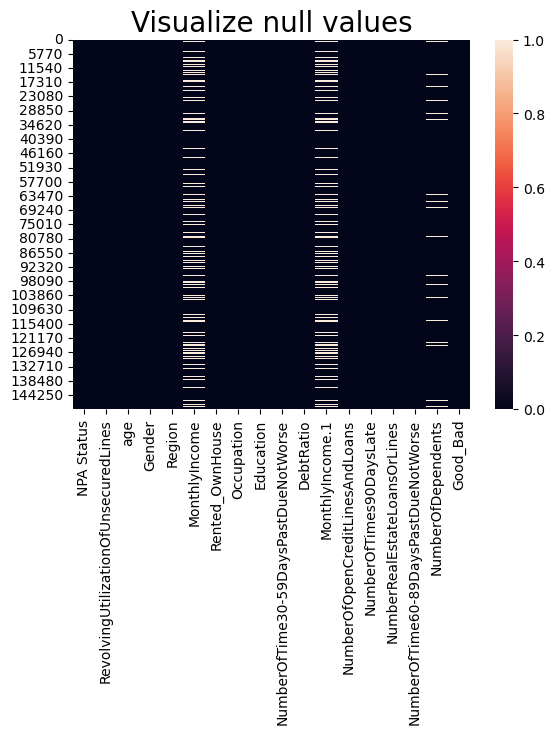

In [10]:
#let's visualize null values
#plt.figure(figsize=(8,6))
sns.heatmap(data=data.isnull())
plt.title("Visualize null values",fontsize=20)
plt.show()

In [11]:
#Here we see that in all rows 2null values but it doesn't show in the figure bcz the value is very small.so we check last 2rows
data.tail(2)

NPA Status  RevolvingUtilizationOfUnsecuredLines  age Gender Region  \
150000         NaN                                   NaN  NaN    NaN    NaN   
150001         NaN                                   NaN  NaN    NaN    NaN   

        MonthlyIncome Rented_OwnHouse Occupation Education  \
150000            NaN             NaN        NaN       NaN   
150001            NaN             NaN        NaN       NaN   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome.1  \
150000                                   NaN        NaN              NaN   
150001                                   NaN        NaN              NaN   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
150000                              NaN                      NaN   
150001                              NaN                      NaN   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
150000                           NaN                                   NaN   
150001                           NaN                                   NaN   

       NumberOfDependents Good_Bad  
150000               Good      NaN  
150001                Bad      NaN

In [12]:
#we drop last two rows bcz it was completely null,first find index
data[data['RevolvingUtilizationOfUnsecuredLines'].isnull()].index

Int64Index([150000, 150001], dtype='int64')

In [13]:
data[data['Good_Bad'].isnull()].index

Int64Index([150000, 150001], dtype='int64')

In [14]:
data.drop([150000,150001],axis=0,inplace=True)        #inplace make changes in original data

In [15]:
data.shape               #after droping two rows, checking the shape of data

(150000, 18)

In [16]:
#checking null values again
data.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome.1                         29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Good_Bad                                    0
dtype: int64

In [17]:
#Here I see that montlyincome and monthlyincome1 column have same number of missing values
#checking its std, if std is same, that's data of both the column is same and I remove 1 column
data["MonthlyIncome"].std()      #standard deviation of montlyincome


14384.67421528196

In [18]:
data["MonthlyIncome.1"].std()      #standard deviation of montlyincome


14384.67421528196

Since,both the column have same data. we are removing montlyincome1 column

In [19]:
data.drop(["MonthlyIncome.1"],axis=1,inplace=True)          #removing MonthlyIncome.1

In [20]:
#after droping 1 column, cheking the shape of data
data.shape

(150000, 17)

In [21]:
#splitting the data into train test, then perform operations

# Train test split


In [22]:
#copying original data into another variable
data1=data.copy()

In [23]:
data1.head(2)       #checking first 2rows

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender Region  \
0         1.0                              0.766127  45.0    Male  South   
1         0.0                              0.957151  40.0  Female  South   

   MonthlyIncome Rented_OwnHouse Occupation Education  \
0         9120.0        Ownhouse   Self_Emp    Matric   
1         2600.0        Ownhouse   Self_Emp  Graduate   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  \
0                                   2.0   0.802982   
1                                   0.0   0.121876   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                             13.0                      0.0   
1                              4.0                      0.0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                           6.0                                   0.0   
1                           0.0                                   0.0   

  NumberOfDependents Good_Bad  
0                2.0      Bad  
1                1.0     Good

In [24]:
x=data.iloc[0:,:-1]      #extract independent varialbe and store in a variable x
y=data.iloc[0:,-1]         #extract dependent variable and store in a variable y


In [25]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.33, random_state=42)      #splitting the data, test size means how much I keep for testing, useing random state so that data did not change when I run code many times 

In [26]:
#checking the length
len(x_train)  , len(y_train),len(x_test)  , len(y_test)

(100500, 100500, 49500, 49500)

### After train test split, concanate the data and perform data cleaning in both train & test

In [27]:
training_data= pd.concat([x_train, y_train],axis=1)      #concat x trainand y train and adding to a new variable
training_data.head(2)                              #checking first 2 rows

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender  \
87935         0.0                              0.889997  60.0    Male   
3892          0.0                              1.000000  34.0  Female   

        Region  MonthlyIncome Rented_OwnHouse   Occupation Education  \
87935  Central            NaN          Rented  Non-officer  Graduate   
3892     South         4325.0        Ownhouse     Self_Emp    Matric   

       NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  \
87935                                   0.0  2252.000000   
3892                                    0.0     0.058946   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
87935                              5.0                      0.0   
3892                               2.0                      0.0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
87935                           0.0                                   0.0   
3892                            0.0                                   0.0   

      NumberOfDependents Good_Bad  
87935                0.0     Good  
3892                 0.0     Good

In [28]:
testing_data= pd.concat([x_test, y_test],axis=1)          #concat x test and y teest and add to a new variable
testing_data.head(2)                                            #checking first 2 rows

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender  \
59770         0.0                                   1.0  30.0    Male   
21362         0.0                                   0.0  57.0  Female   

        Region  MonthlyIncome Rented_OwnHouse Occupation     Education  \
59770  Central            NaN          Rented   Self_Emp  Professional   
21362    North         7750.0          Rented   Officer3     Post-Grad   

       NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  \
59770                                   0.0  44.000000   
21362                                   0.0   0.142562   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
59770                              0.0                      0.0   
21362                              9.0                      0.0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
59770                           0.0                                   0.0   
21362                           1.0                                   0.0   

      NumberOfDependents Good_Bad  
59770                0.0     Good  
21362                0.0     Good

# Removing null values for training & test data

In [29]:
training_data.isnull().sum()        #checking null values in training data

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           19866
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2689
Good_Bad                                    0
dtype: int64

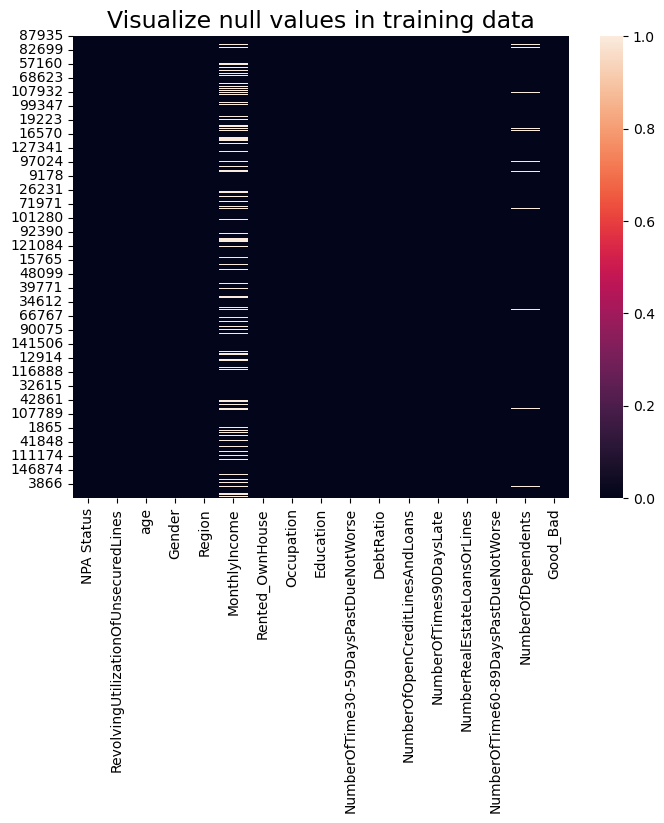

In [30]:
#let's visualize null values
plt.figure(figsize=(8,6))
sns.heatmap(data=training_data.isnull())
plt.title("Visualize null values in training data",fontsize=17)
plt.show()

In [31]:

testing_data.isnull().sum()          #checking test data null values

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                           9865
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1235
Good_Bad                                   0
dtype: int64

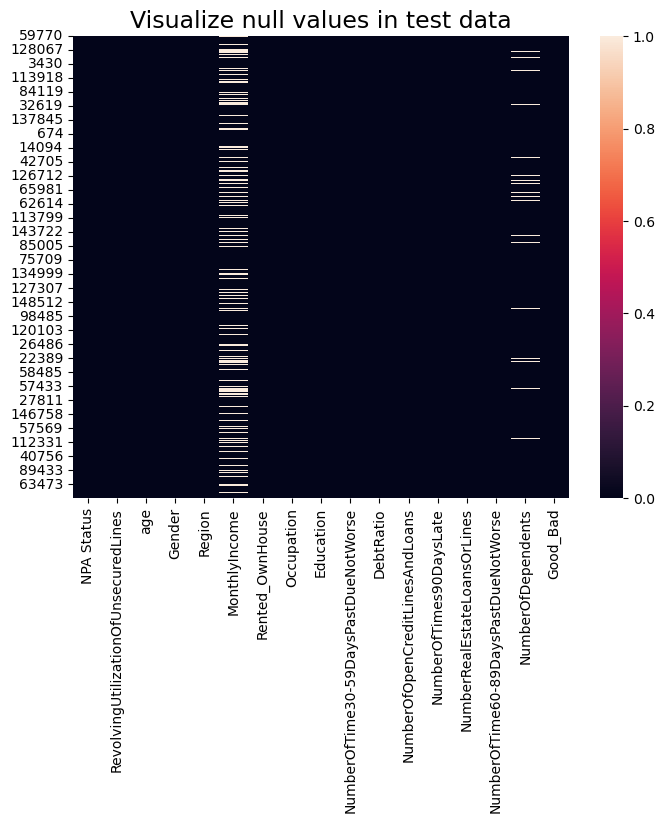

In [32]:
#let's visualize null values
plt.figure(figsize=(8,6))
sns.heatmap(data=testing_data.isnull())
plt.title("Visualize null values in test data",fontsize=17)
plt.show()


#### first we find mean, median, mode and random sample Inmputation value for training data, after that find standard deviation 

### Working with Monthly Income column in training data

In [33]:
#checking data type of monthly income
training_data["MonthlyIncome"].dtype

dtype('float64')

---Mean of Monthly Income

In [34]:
mean_value_mi= training_data["MonthlyIncome"].mean()
mean_value_mi

6659.227410273582

In [35]:
#create a function
def replacement(training_data,col,value,tec_name):
    training_data[col+tec_name+'_replaced'] = training_data[col].fillna(value)   #here we write a code, that will fill all the null values to which value we pass in object (mean,median or mode)
    

    
here we create a function, So we can use it whenever we want

we create a function name replacement in this we pass 4 argument

1. df is the variable i which we store our dataset
2. col, in col we pass our column name as a string. 
3. value, in value we pass our value like which operation we want mean, median or mode
4. tec_name, in this we pass our operation name as a string

In [36]:
replacement(training_data,"MonthlyIncome", mean_value_mi, "_mean" )    #call the function

In [37]:
median_value_mi= training_data["MonthlyIncome"].median()
median_value_mi

5400.0

In [38]:
replacement(training_data,"MonthlyIncome", median_value_mi, "_median" )    #call the function

In [39]:
mode_value_mi= training_data["MonthlyIncome"].mode()[0]
mode_value_mi

5000.0

In [40]:
replacement(training_data,"MonthlyIncome", mode_value_mi, "_mode" )    #call the function

---Random Sample Imputation

In [41]:
training_data["MonthlyIncome_Random_Sample"]=training_data['MonthlyIncome'].copy()        #create a new column and copy the data of Product_Category_2 in it
new = training_data['MonthlyIncome'].dropna().sample(training_data['MonthlyIncome'].isnull().sum(),random_state=11)  #select random values and stored in a variable
new.index = training_data[training_data['MonthlyIncome'].isnull()].index  #  new index will be replaced with null value index
training_data.loc[training_data['MonthlyIncome'].isnull(),'MonthlyIncome_Random_Sample'] = new
training_data.head(2)

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender  \
87935         0.0                              0.889997  60.0    Male   
3892          0.0                              1.000000  34.0  Female   

        Region  MonthlyIncome Rented_OwnHouse   Occupation Education  \
87935  Central            NaN          Rented  Non-officer  Graduate   
3892     South         4325.0        Ownhouse     Self_Emp    Matric   

       NumberOfTime30-59DaysPastDueNotWorse  ...  \
87935                                   0.0  ...   
3892                                    0.0  ...   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
87935                              5.0                      0.0   
3892                               2.0                      0.0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
87935                           0.0                                   0.0   
3892                            0.0                                   0.0   

       NumberOfDependents Good_Bad MonthlyIncome_mean_replaced  \
87935                 0.0     Good                  6659.22741   
3892                  0.0     Good                  4325.00000   

       MonthlyIncome_median_replaced  MonthlyIncome_mode_replaced  \
87935                         5400.0                       5000.0   
3892                          4325.0                       4325.0   

       MonthlyIncome_Random_Sample  
87935                       5988.0  
3892                        4325.0  

[2 rows x 21 columns]

#### Visualize Mean, median,Mode and Random Sample

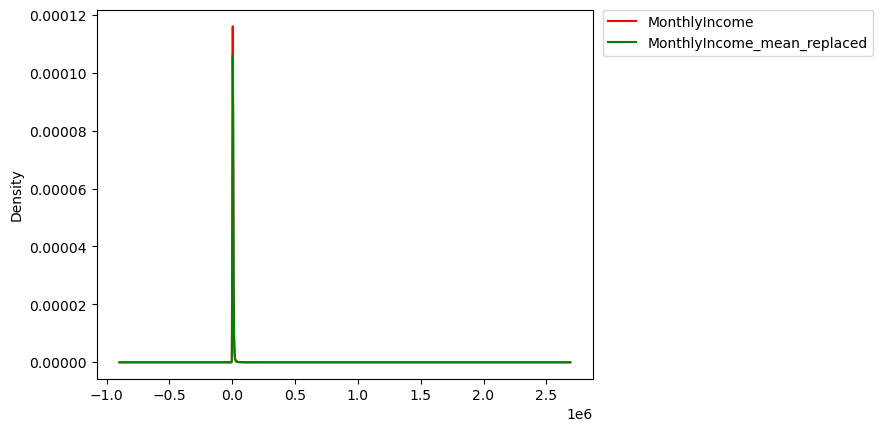

In [42]:
#let's visualize mean

fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and 1 plot.

training_data['MonthlyIncome'].plot(kind='kde',ax=ax,color='r',legend='MonthlyIncome') # before filling null values
training_data['MonthlyIncome_mean_replaced'].plot(kind='kde',ax=ax,color='g',legend='mean')# after filling null values with mean value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()



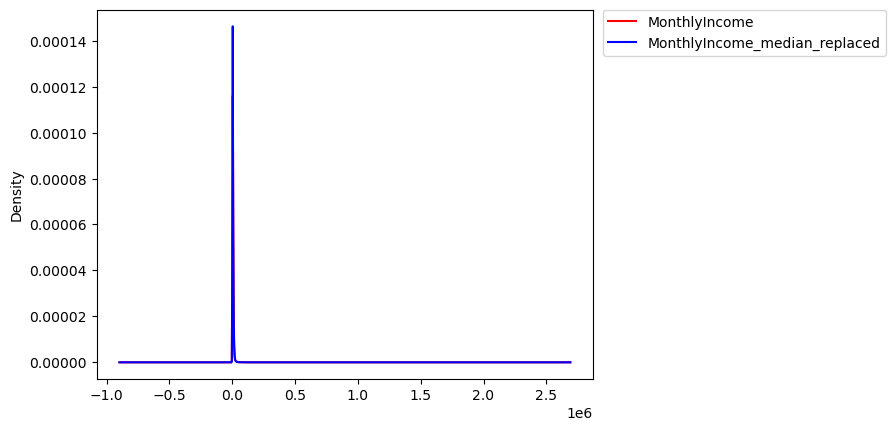

In [43]:
#let's visualize median

fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and 1 plot.

training_data['MonthlyIncome'].plot(kind='kde',ax=ax,color='r',legend='MonthlyIncome') # before filling null values
training_data['MonthlyIncome_median_replaced'].plot(kind='kde',ax=ax,color='b',legend='median')# after filling null values with mean value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

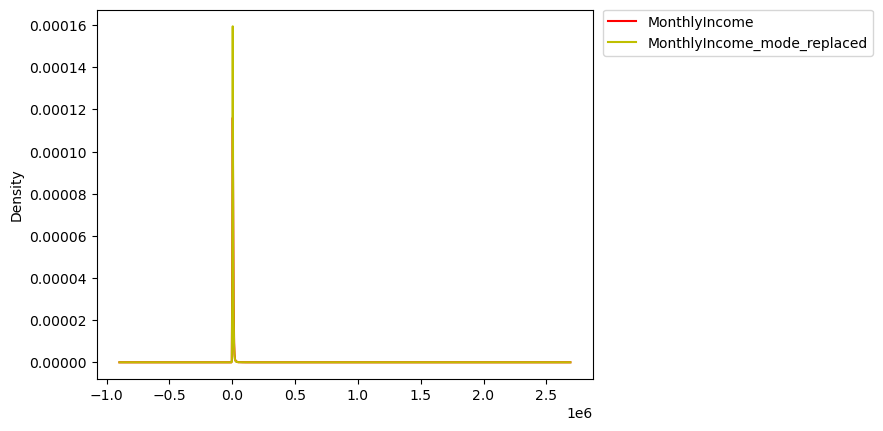

In [44]:
#let's visualize mode

fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and 1 plot.

training_data['MonthlyIncome'].plot(kind='kde',ax=ax,color='r',legend='MonthlyIncome') # before filling null values
training_data['MonthlyIncome_mode_replaced'].plot(kind='kde',ax=ax,color='y',legend='mode')# after filling null values with mean value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

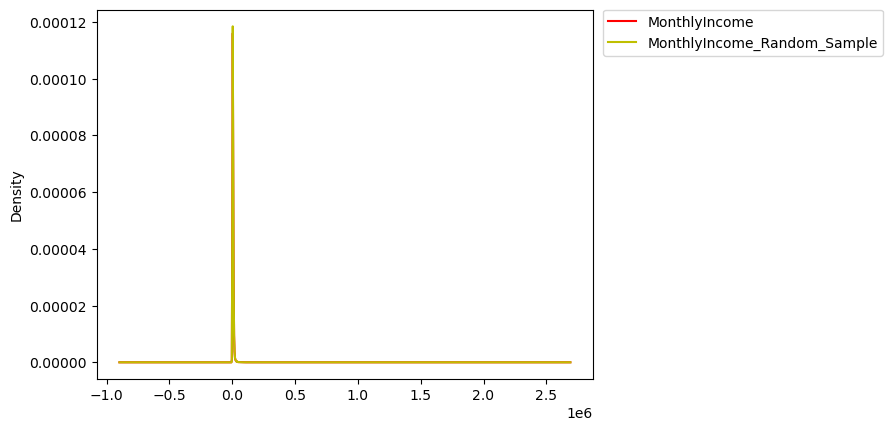

In [45]:
#let's visualize random sample

fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and 1 plot.

training_data['MonthlyIncome'].plot(kind='kde',ax=ax,color='r',legend='MonthlyIncome') # before filling null values
training_data['MonthlyIncome_Random_Sample'].plot(kind='kde',ax=ax,color='y',legend='MonthlyIncome_Random_Sample')# after filling null values with random value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

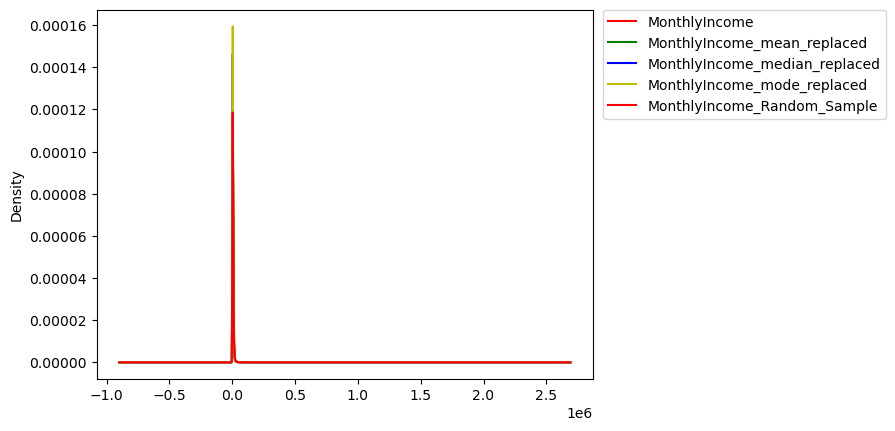

In [46]:
#let's visualize all together

fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and 1 plot.

training_data['MonthlyIncome'].plot(kind='kde',ax=ax,color='r',legend='MonthlyIncome') # before filling null values
training_data['MonthlyIncome_mean_replaced'].plot(kind='kde',ax=ax,color='g',legend='mean')# after filling null values with mean value
training_data['MonthlyIncome_median_replaced'].plot(kind='kde',ax=ax,color='b',legend='median')# after filling null values with mean value
training_data['MonthlyIncome_mode_replaced'].plot(kind='kde',ax=ax,color='y',legend='mode')# after filling null values with mean value
training_data['MonthlyIncome_Random_Sample'].plot(kind='kde',ax=ax,color='r',legend='MonthlyIncome_Random_Sample')# after filling null values with random value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()


In [47]:
# know, finding the std for all the techniques along with original column 


print('original column std = ',training_data['MonthlyIncome'].std())
print('mean std = ',training_data['MonthlyIncome_mean_replaced'].std())
print('median std = ',training_data['MonthlyIncome_median_replaced'].std())
print('mode std = ',training_data['MonthlyIncome_mode_replaced'].std())
print('random sample std = ',training_data['MonthlyIncome_Random_Sample'].std())

original column std =  12382.00036449975
mean std =  11090.888811194223
median std =  11102.22040556871
mode std =  11110.55550843074
random sample std =  11419.875202957845


Since, the std of random sample is close to the std of original column, so we replace all the null values of MonthlyIncome
with random sample and dropping remaining column

In [48]:
training_data.drop(["MonthlyIncome","MonthlyIncome_mean_replaced","MonthlyIncome_median_replaced","MonthlyIncome_mode_replaced"],axis=1,inplace=True)
training_data.head()

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender  \
87935         0.0                              0.889997  60.0    Male   
3892          0.0                              1.000000  34.0  Female   
41404         0.0                              1.000000  25.0    Male   
91124         0.0                              0.320767  59.0    Male   
67372         1.0                              1.000000  54.0    Male   

        Region Rented_OwnHouse   Occupation  Education  \
87935  Central          Rented  Non-officer   Graduate   
3892     South        Ownhouse     Self_Emp     Matric   
41404    North        Ownhouse     Officer1  Post-Grad   
91124  Central          Rented  Non-officer   Graduate   
67372     West        Ownhouse     Self_Emp   Graduate   

       NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  \
87935                                   0.0  2252.000000   
3892                                    0.0     0.058946   
41404                                   0.0     0.153581   
91124                                   0.0     0.401757   
67372                                   3.0   779.000000   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
87935                              5.0                      0.0   
3892                               2.0                      0.0   
41404                              2.0                      0.0   
91124                              7.0                      0.0   
67372                              5.0                      2.0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
87935                           0.0                                   0.0   
3892                            0.0                                   0.0   
41404                           0.0                                   0.0   
91124                           2.0                                   0.0   
67372                           1.0                                   2.0   

      NumberOfDependents Good_Bad  MonthlyIncome_Random_Sample  
87935                0.0     Good                       5988.0  
3892                 0.0     Good                       4325.0  
41404                0.0     Good                       2317.0  
91124                0.0     Good                       4666.0  
67372                NaN      Bad                       2450.0

Replacing monthly Income data with the value of random sample in test data, because we do the same in training data

### working with monthly income column in test data

In [49]:
#checking datatype
testing_data["MonthlyIncome"].dtypes

dtype('float64')

In [50]:
#use random sample imputation

In [51]:
testing_data["MonthlyIncome_Random_Sample"]=testing_data['MonthlyIncome'].copy()  #create a new column and copy the data of Product_Category_2 in it
new = testing_data['MonthlyIncome'].dropna().sample(testing_data['MonthlyIncome'].isnull().sum(),random_state=11)  # step 2 select random values and stored in a variable
new.index = testing_data[testing_data['MonthlyIncome'].isnull()].index  #  new index will be replaced with null value index
testing_data.loc[testing_data['MonthlyIncome'].isnull(),'MonthlyIncome_Random_Sample'] = new
testing_data.head(2)

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender  \
59770         0.0                                   1.0  30.0    Male   
21362         0.0                                   0.0  57.0  Female   

        Region  MonthlyIncome Rented_OwnHouse Occupation     Education  \
59770  Central            NaN          Rented   Self_Emp  Professional   
21362    North         7750.0          Rented   Officer3     Post-Grad   

       NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  \
59770                                   0.0  44.000000   
21362                                   0.0   0.142562   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
59770                              0.0                      0.0   
21362                              9.0                      0.0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
59770                           0.0                                   0.0   
21362                           1.0                                   0.0   

      NumberOfDependents Good_Bad  MonthlyIncome_Random_Sample  
59770                0.0     Good                       5962.0  
21362                0.0     Good                       7750.0

In [52]:
#dropping monthly income column from testdata
testing_data.drop(["MonthlyIncome"],axis=1,inplace=True)
testing_data.head(2)

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender  \
59770         0.0                                   1.0  30.0    Male   
21362         0.0                                   0.0  57.0  Female   

        Region Rented_OwnHouse Occupation     Education  \
59770  Central          Rented   Self_Emp  Professional   
21362    North          Rented   Officer3     Post-Grad   

       NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  \
59770                                   0.0  44.000000   
21362                                   0.0   0.142562   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
59770                              0.0                      0.0   
21362                              9.0                      0.0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
59770                           0.0                                   0.0   
21362                           1.0                                   0.0   

      NumberOfDependents Good_Bad  MonthlyIncome_Random_Sample  
59770                0.0     Good                       5962.0  
21362                0.0     Good                       7750.0

In [53]:
#checking null values of both training and test data
training_data.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      2689
Good_Bad                                   0
MonthlyIncome_Random_Sample                0
dtype: int64

In [54]:
testing_data.isnull().sum()


NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1235
Good_Bad                                   0
MonthlyIncome_Random_Sample                0
dtype: int64

Conclusion

Try Mean, Median, Mode and Random sample Imputation to fill null values in Monthly income

but the standard deviation of random sample is close to the random sample of Monthly income, So fill null values with random values in both train amd test data.


### Working with NumberOfDependents columns  in train data

In [55]:
#checking the data type 
training_data["NumberOfDependents"].dtype

dtype('O')

In [56]:
#checking value
training_data["NumberOfDependents"].unique()

array([0.0, nan, 1.0, '2', 3.0, 4.0, 2.0, '0', '1', 5.0, '4', '3', 6.0,
       '5', 7.0, 8.0, '6', '7', 10.0, '9', 9.0, '8', 13.0], dtype=object)

In [57]:
#data type of NumberOfDependents column is object, first we have to change it
training_data["NumberOfDependents"]= pd.to_numeric(training_data["NumberOfDependents"])
training_data["NumberOfDependents"].dtype

dtype('float64')

---finding mean value

In [58]:
mean_value_NumberOfDependents= training_data["NumberOfDependents"].mean()
mean_value_NumberOfDependents

0.7641574056087761

In [59]:
replacement(training_data,"NumberOfDependents", mean_value_NumberOfDependents, "_mean" )    #call the function

---finding median

In [60]:
median_value_NumberOfDependents= training_data["NumberOfDependents"].median()
median_value_NumberOfDependents

0.0

In [61]:
replacement(training_data,"NumberOfDependents", median_value_NumberOfDependents, "_median" )    #call the function


---finding mode

In [62]:
mode_value_NumberOfDependents= training_data["NumberOfDependents"].mode()[0]
mode_value_NumberOfDependents

0.0

In [63]:
replacement(training_data,"NumberOfDependents", mode_value_NumberOfDependents, "_mode" )    #call the function

---Random Sample Imputation

In [64]:
training_data["NumberOfDependents_Random_Sample"]=training_data['NumberOfDependents'].copy()
new = training_data['NumberOfDependents'].dropna().sample(training_data['NumberOfDependents'].isnull().sum(),random_state=11)
new.index = training_data[training_data['NumberOfDependents'].isnull()].index  #  new index will be replaced with null value index
training_data.loc[training_data['NumberOfDependents'].isnull(),'NumberOfDependents_Random_Sample'] = new
training_data.head()

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender  \
87935         0.0                              0.889997  60.0    Male   
3892          0.0                              1.000000  34.0  Female   
41404         0.0                              1.000000  25.0    Male   
91124         0.0                              0.320767  59.0    Male   
67372         1.0                              1.000000  54.0    Male   

        Region Rented_OwnHouse   Occupation  Education  \
87935  Central          Rented  Non-officer   Graduate   
3892     South        Ownhouse     Self_Emp     Matric   
41404    North        Ownhouse     Officer1  Post-Grad   
91124  Central          Rented  Non-officer   Graduate   
67372     West        Ownhouse     Self_Emp   Graduate   

       NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  ...  \
87935                                   0.0  2252.000000  ...   
3892                                    0.0     0.058946  ...   
41404                                   0.0     0.153581  ...   
91124                                   0.0     0.401757  ...   
67372                                   3.0   779.000000  ...   

       NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
87935                      0.0                           0.0   
3892                       0.0                           0.0   
41404                      0.0                           0.0   
91124                      0.0                           2.0   
67372                      2.0                           1.0   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  Good_Bad  \
87935                                   0.0                 0.0      Good   
3892                                    0.0                 0.0      Good   
41404                                   0.0                 0.0      Good   
91124                                   0.0                 0.0      Good   
67372                                   2.0                 NaN       Bad   

      MonthlyIncome_Random_Sample  NumberOfDependents_mean_replaced  \
87935                      5988.0                          0.000000   
3892                       4325.0                          0.000000   
41404                      2317.0                          0.000000   
91124                      4666.0                          0.000000   
67372                      2450.0                          0.764157   

       NumberOfDependents_median_replaced  NumberOfDependents_mode_replaced  \
87935                                 0.0                               0.0   
3892                                  0.0                               0.0   
41404                                 0.0                               0.0   
91124                                 0.0                               0.0   
67372                                 0.0                               0.0   

       NumberOfDependents_Random_Sample  
87935                               0.0  
3892                                0.0  
41404                               0.0  
91124                               0.0  
67372                               2.0  

[5 rows x 21 columns]

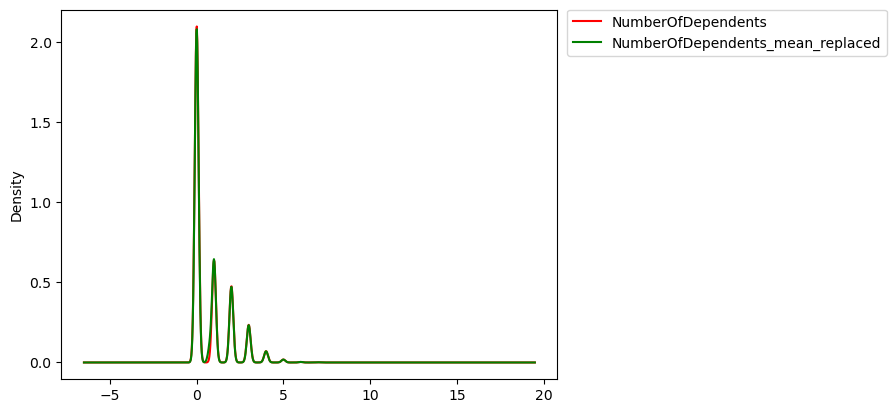

In [65]:
#lets visualize

fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and 1 plot.

training_data['NumberOfDependents'].plot(kind='kde',ax=ax,color='r',legend='NumberOfDependents') # before filling null values
training_data['NumberOfDependents_mean_replaced'].plot(kind='kde',ax=ax,color='g',legend='mean')# after filling null values with mean value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()


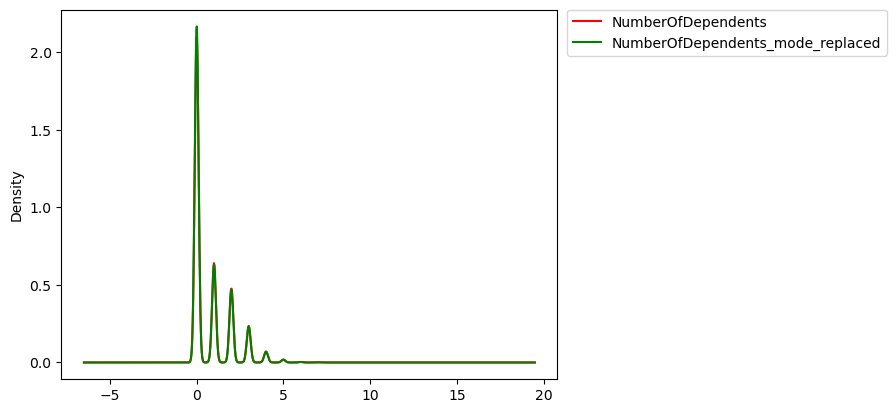

In [66]:

fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and 1 plot.

training_data['NumberOfDependents'].plot(kind='kde',ax=ax,color='r',legend='NumberOfDependents') # before filling null values
training_data['NumberOfDependents_mode_replaced'].plot(kind='kde',ax=ax,color='g',legend='mode')# after filling null values with mode value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

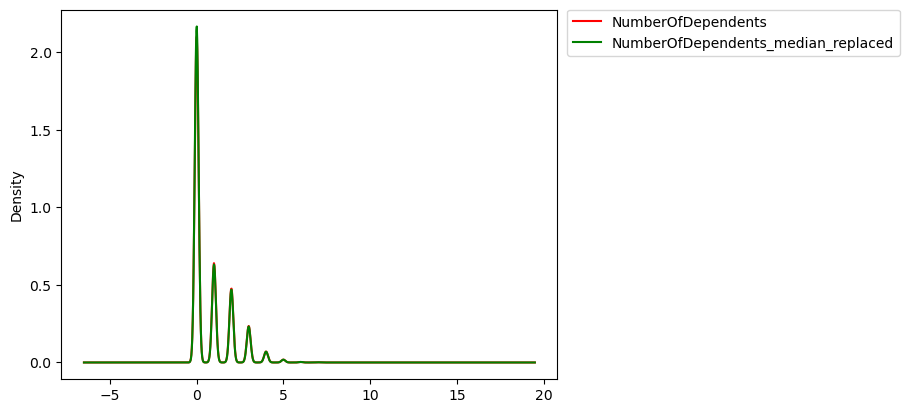

In [67]:
fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and 1 plot.

training_data['NumberOfDependents'].plot(kind='kde',ax=ax,color='r',legend='NumberOfDependents') # before filling null values
training_data['NumberOfDependents_median_replaced'].plot(kind='kde',ax=ax,color='g',legend='median')# after filling null values with median value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

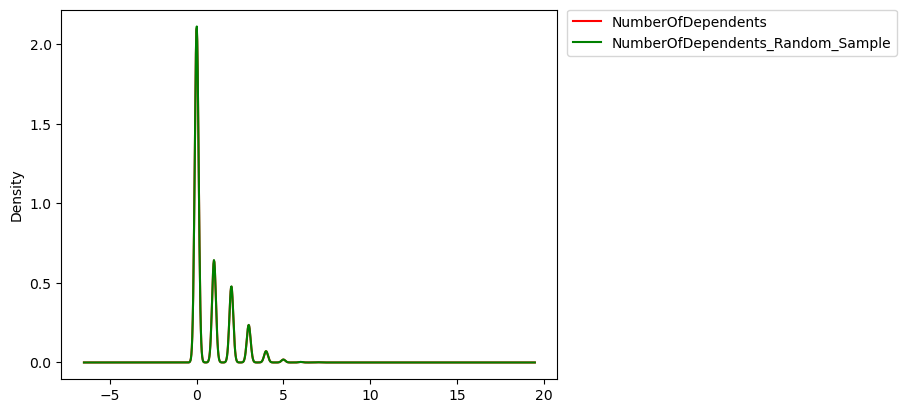

In [68]:
fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and 1 plot.

training_data['NumberOfDependents'].plot(kind='kde',ax=ax,color='r',legend='NumberOfDependents') # before filling null values
training_data['NumberOfDependents_Random_Sample'].plot(kind='kde',ax=ax,color='g',legend='NumberOfDependents_Random_Sample')# after filling null values with random sample value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

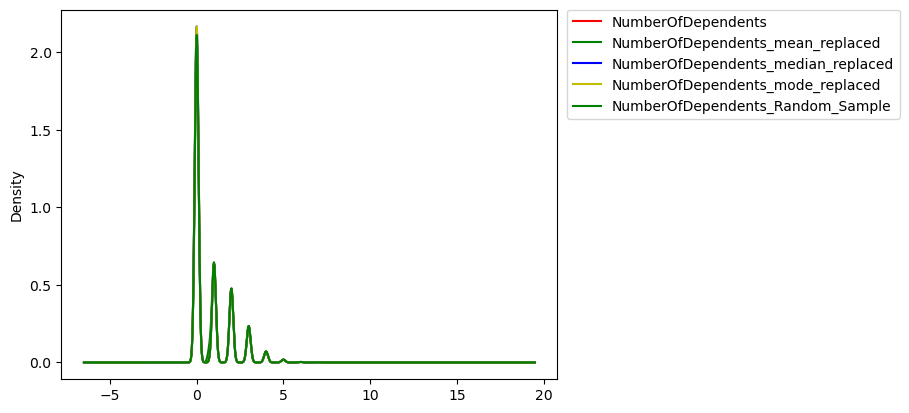

In [69]:
#visualize all together
fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and 1 plot.

training_data['NumberOfDependents'].plot(kind='kde',ax=ax,color='r',legend='NumberOfDependents') # before filling null values
training_data['NumberOfDependents_mean_replaced'].plot(kind='kde',ax=ax,color='g',legend='mean')# after filling null values with mean value
training_data['NumberOfDependents_median_replaced'].plot(kind='kde',ax=ax,color='b',legend='median') # filling null values with median value
training_data['NumberOfDependents_mode_replaced'].plot(kind='kde',ax=ax,color='y',legend='mode') # filling null values with mode value
training_data['NumberOfDependents_Random_Sample'].plot(kind='kde',ax=ax,color='g',legend='NumberOfDependents_Random_Sample')# after filling null values with random sample value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

In [70]:
# know we find the std for all the techniques along with original column 


print('original column std = ',training_data['NumberOfDependents'].std())
print('mean std = ',training_data['NumberOfDependents_mean_replaced'].std())
print('median std = ',training_data['NumberOfDependents_median_replaced'].std())
print('mode std = ',training_data['NumberOfDependents_mode_replaced'].std())
print('random sample std = ',training_data['NumberOfDependents_Random_Sample'].std())


original column std =  1.118102950299523
mean std =  1.1030432788402802
median std =  1.1099146466320464
mode std =  1.1099146466320464
random sample std =  1.11840153176268


Since the std value of random sample is close to the std of original column , so I am taking random sample values to replace the null values and drop the remaining column

In [71]:
training_data.drop(["NumberOfDependents","NumberOfDependents_median_replaced","NumberOfDependents_mean_replaced","NumberOfDependents_mode_replaced"],axis=1,inplace=True)
training_data.head()

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender  \
87935         0.0                              0.889997  60.0    Male   
3892          0.0                              1.000000  34.0  Female   
41404         0.0                              1.000000  25.0    Male   
91124         0.0                              0.320767  59.0    Male   
67372         1.0                              1.000000  54.0    Male   

        Region Rented_OwnHouse   Occupation  Education  \
87935  Central          Rented  Non-officer   Graduate   
3892     South        Ownhouse     Self_Emp     Matric   
41404    North        Ownhouse     Officer1  Post-Grad   
91124  Central          Rented  Non-officer   Graduate   
67372     West        Ownhouse     Self_Emp   Graduate   

       NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  \
87935                                   0.0  2252.000000   
3892                                    0.0     0.058946   
41404                                   0.0     0.153581   
91124                                   0.0     0.401757   
67372                                   3.0   779.000000   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
87935                              5.0                      0.0   
3892                               2.0                      0.0   
41404                              2.0                      0.0   
91124                              7.0                      0.0   
67372                              5.0                      2.0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
87935                           0.0                                   0.0   
3892                            0.0                                   0.0   
41404                           0.0                                   0.0   
91124                           2.0                                   0.0   
67372                           1.0                                   2.0   

      Good_Bad  MonthlyIncome_Random_Sample  NumberOfDependents_Random_Sample  
87935     Good                       5988.0                               0.0  
3892      Good                       4325.0                               0.0  
41404     Good                       2317.0                               0.0  
91124     Good                       4666.0                               0.0  
67372      Bad                       2450.0                               2.0

### working in NumberOfDependents value in test data

In [72]:
#checking the dtype of test data
testing_data['NumberOfDependents'].dtype


dtype('O')

In [73]:
#converting the data type
testing_data['NumberOfDependents']=pd.to_numeric(testing_data['NumberOfDependents'])
testing_data['NumberOfDependents'].dtype


dtype('float64')

In [74]:
#use random sample to fill null values
testing_data["NumberOfDependents_random_replaced"]=testing_data['NumberOfDependents'].copy()
new =testing_data['NumberOfDependents'].dropna().sample(testing_data['NumberOfDependents'].isnull().sum(),random_state=11)
new.index = testing_data[testing_data['NumberOfDependents'].isnull()].index  #  new index will be replaced with null values
testing_data.loc[testing_data['NumberOfDependents'].isnull(),'NumberOfDependents_random_replaced'] = new
testing_data.head()

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender  \
59770          0.0                              1.000000  30.0    Male   
21362          0.0                              0.000000  57.0  Female   
127324         0.0                              0.036569  48.0  Female   
140509         0.0                              1.018331  41.0    Male   
144297         0.0                              1.008799  49.0    Male   

         Region Rented_OwnHouse   Occupation     Education  \
59770   Central          Rented     Self_Emp  Professional   
21362     North          Rented     Officer3     Post-Grad   
127324     East          Rented     Officer1     Post-Grad   
140509     West          Rented  Non-officer  Professional   
144297     West          Rented     Officer2  Professional   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  \
59770                                    0.0    44.000000   
21362                                    0.0     0.142562   
127324                                   0.0     0.236294   
140509                                   0.0     0.163138   
144297                                   0.0  3942.000000   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
59770                               0.0                      0.0   
21362                               9.0                      0.0   
127324                              6.0                      0.0   
140509                              4.0                      0.0   
144297                             10.0                      0.0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
59770                            0.0                                   0.0   
21362                            1.0                                   0.0   
127324                           2.0                                   0.0   
140509                           0.0                                   0.0   
144297                           1.0                                   0.0   

        NumberOfDependents Good_Bad  MonthlyIncome_Random_Sample  \
59770                  0.0     Good                       5962.0   
21362                  0.0     Good                       7750.0   
127324                 3.0     Good                       6000.0   
140509                 0.0     Good                       4958.0   
144297                 0.0     Good                       5650.0   

        NumberOfDependents_random_replaced  
59770                                  0.0  
21362                                  0.0  
127324                                 3.0  
140509                                 0.0  
144297                                 0.0

In [75]:
#remove NumberOfDependents columns from data
testing_data.drop(["NumberOfDependents"],axis=1,inplace=True)

In [76]:
testing_data.head(2)

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender  \
59770         0.0                                   1.0  30.0    Male   
21362         0.0                                   0.0  57.0  Female   

        Region Rented_OwnHouse Occupation     Education  \
59770  Central          Rented   Self_Emp  Professional   
21362    North          Rented   Officer3     Post-Grad   

       NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  \
59770                                   0.0  44.000000   
21362                                   0.0   0.142562   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
59770                              0.0                      0.0   
21362                              9.0                      0.0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
59770                           0.0                                   0.0   
21362                           1.0                                   0.0   

      Good_Bad  MonthlyIncome_Random_Sample  \
59770     Good                       5962.0   
21362     Good                       7750.0   

       NumberOfDependents_random_replaced  
59770                                 0.0  
21362                                 0.0

### after removing all the null values, checking null values of both training and test data

In [77]:
training_data.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
Good_Bad                                0
MonthlyIncome_Random_Sample             0
NumberOfDependents_Random_Sample        0
dtype: int64

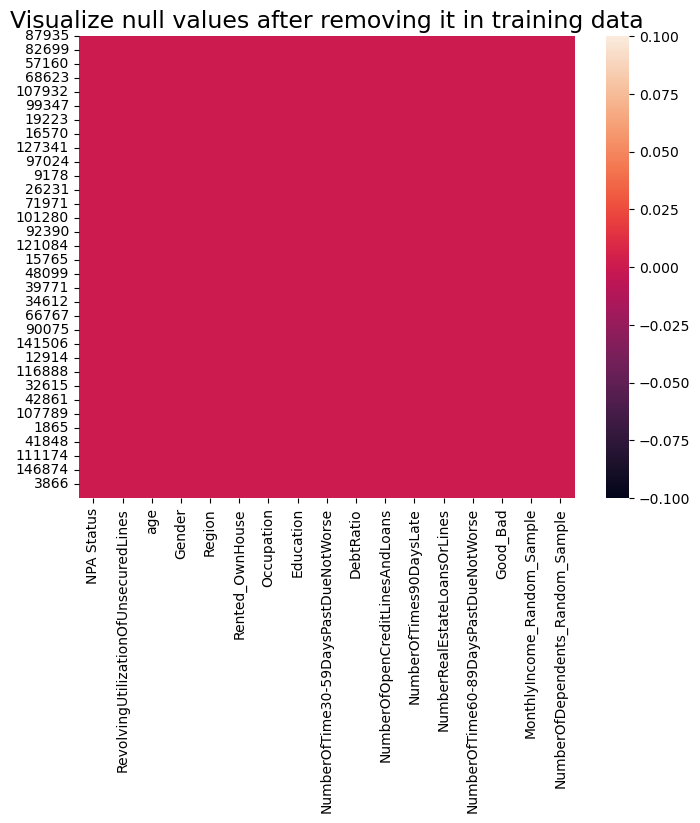

In [78]:
#let's visualize null values
plt.figure(figsize=(8,6))
sns.heatmap(data=training_data.isnull())
plt.title("Visualize null values after removing it in training data",fontsize=17)
plt.show()

In [79]:
testing_data.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
Good_Bad                                0
MonthlyIncome_Random_Sample             0
NumberOfDependents_random_replaced      0
dtype: int64

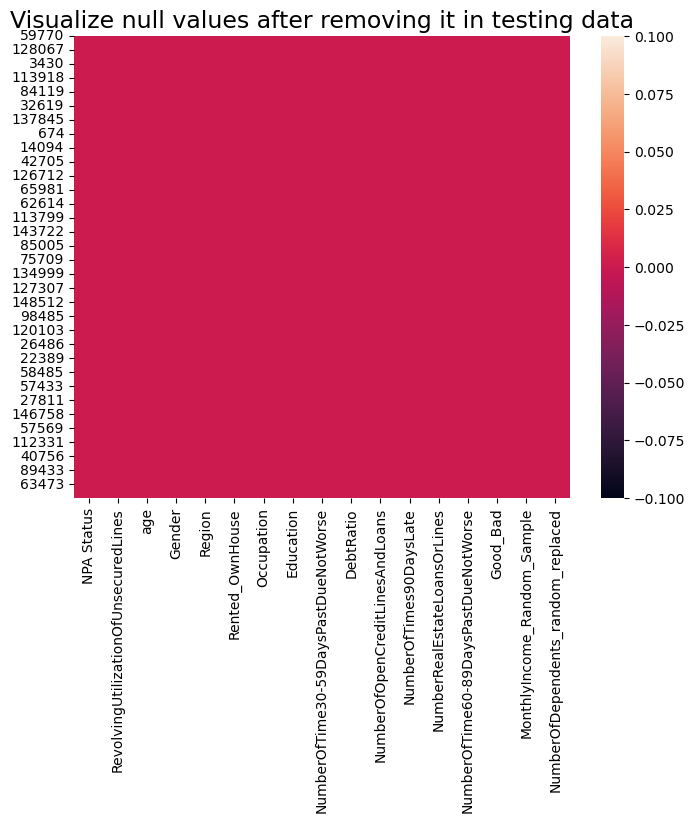

In [80]:
#let's visualize null values
plt.figure(figsize=(8,6))
sns.heatmap(data=testing_data.isnull())
plt.title("Visualize null values after removing it in testing data",fontsize=17)
plt.show()

In [81]:
#Removed all the null values from the training and test data

In [82]:
training_data.shape,testing_data.shape

((100500, 17), (49500, 17))

# Perfoming EDA in training data

In [83]:
data.head(2)

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender Region  \
0         1.0                              0.766127  45.0    Male  South   
1         0.0                              0.957151  40.0  Female  South   

   MonthlyIncome Rented_OwnHouse Occupation Education  \
0         9120.0        Ownhouse   Self_Emp    Matric   
1         2600.0        Ownhouse   Self_Emp  Graduate   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  \
0                                   2.0   0.802982   
1                                   0.0   0.121876   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                             13.0                      0.0   
1                              4.0                      0.0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                           6.0                                   0.0   
1                           0.0                                   0.0   

  NumberOfDependents Good_Bad  
0                2.0      Bad  
1                1.0     Good

## -----Univariate Analysis

### Analysing categorical data

In [84]:
num= training_data.select_dtypes(include='object')     #select categorical data and stored in a variable num
num.head(2)                                          #checking first two rows

Gender   Region Rented_OwnHouse   Occupation Education Good_Bad
87935    Male  Central          Rented  Non-officer  Graduate     Good
3892   Female    South        Ownhouse     Self_Emp    Matric     Good

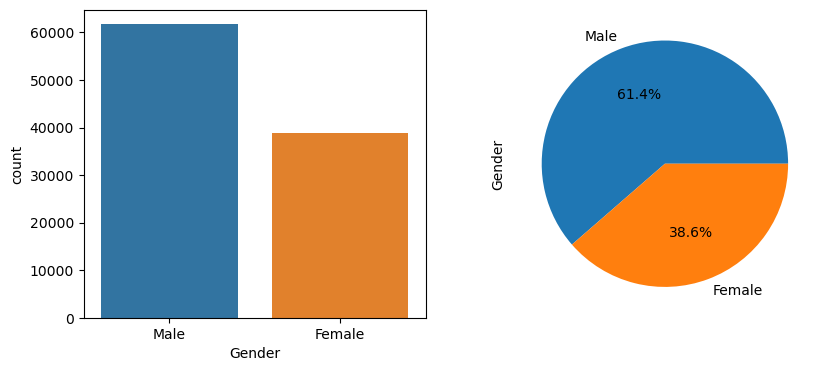

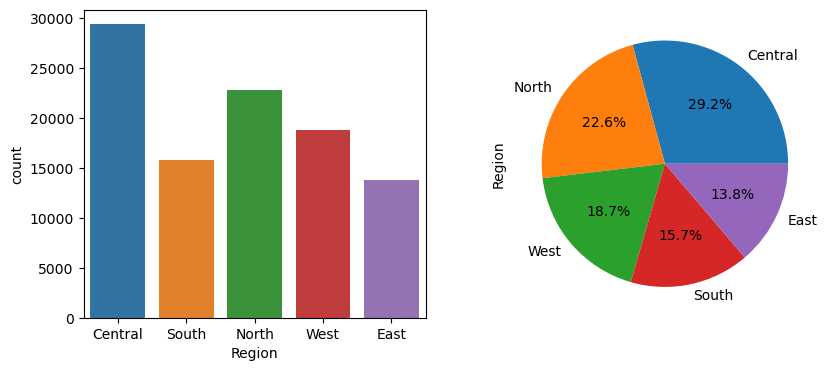

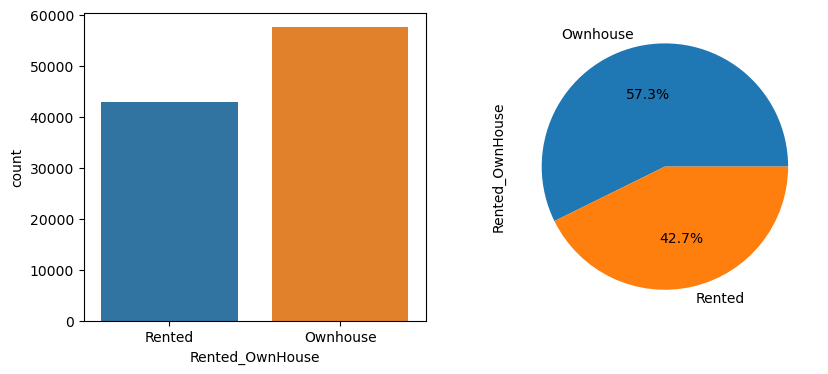

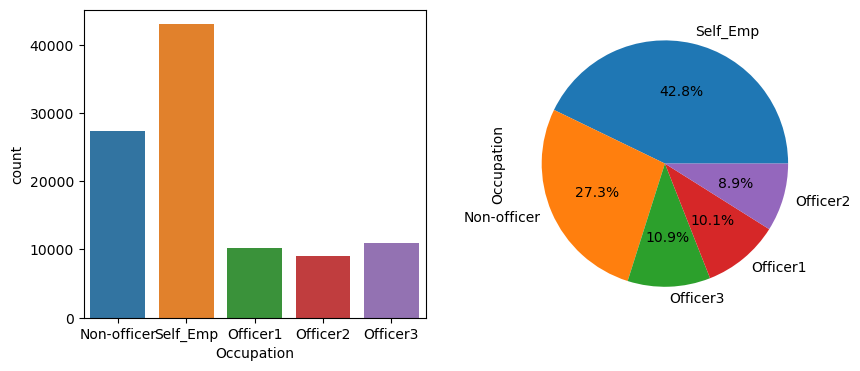

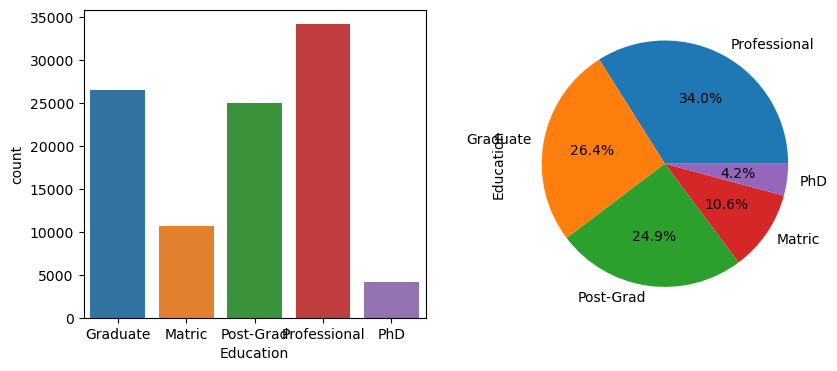

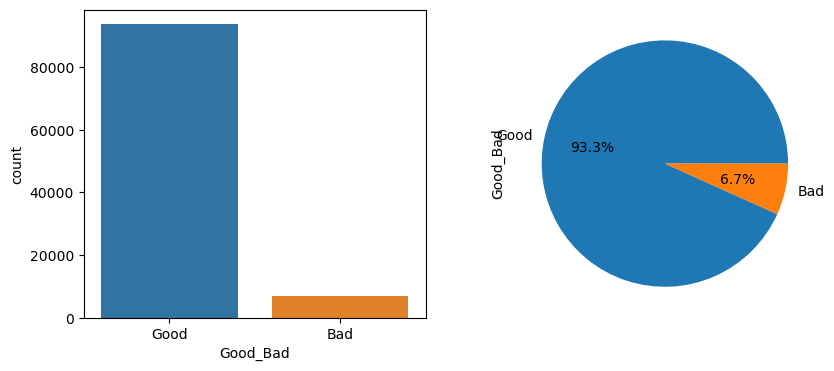

In [85]:
#creating a for loop for pie and count graph for each categorical column in num
for i in num:        #i iterate every column one by one
    plt.figure(figsize=(15,4))    #set a figure size
    
    plt.subplot(131)          
    sns.countplot(x=num[i]) #lotting count plot in bracket pass the data in x axis 
    
    plt.subplot(132)
    num[i].value_counts().plot(kind='pie',autopct='%1.1f%%')   #count the total value in column and plot a pie chart, autopct use to show percentage
    
    plt.show()
    

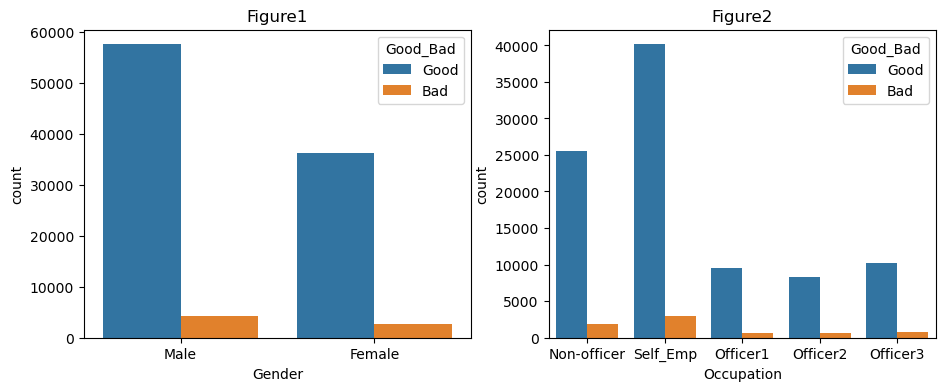

In [86]:
plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
sns.countplot(x='Gender',hue='Good_Bad',data=num)
plt.title("Figure1")

plt.subplot(1,3,2)
sns.countplot(x='Occupation',hue='Good_Bad',data=num)
plt.title("Figure2")

plt.show()

According to fig 1, the num of male is more than female, and in terms of good bad number of male is more

According to fig 2, the number of selfemployed people is more followed by non- officers, in terms of good the num of self employee is more followed by non-officers, and in terms of bad the num of self employee is more followed by non-officers

In [87]:
#using group by function, differentiate gender in terms of Good Bad
num.groupby(['Gender'])['Good_Bad'].value_counts().sort_values(ascending=False) 

Gender  Good_Bad
Male    Good        57505
Female  Good        36222
Male    Bad          4194
Female  Bad          2579
Name: Good_Bad, dtype: int64

In [88]:
#using group by function, differentiate occupations in terms of Good Bad
num.groupby(['Occupation'])['Good_Bad'].value_counts().sort_values(ascending=False)

Occupation   Good_Bad
Self_Emp     Good        40148
Non-officer  Good        25568
Officer3     Good        10181
Officer1     Good         9499
Officer2     Good         8331
Self_Emp     Bad          2894
Non-officer  Bad          1853
Officer3     Bad           734
Officer2     Bad           649
Officer1     Bad           643
Name: Good_Bad, dtype: int64

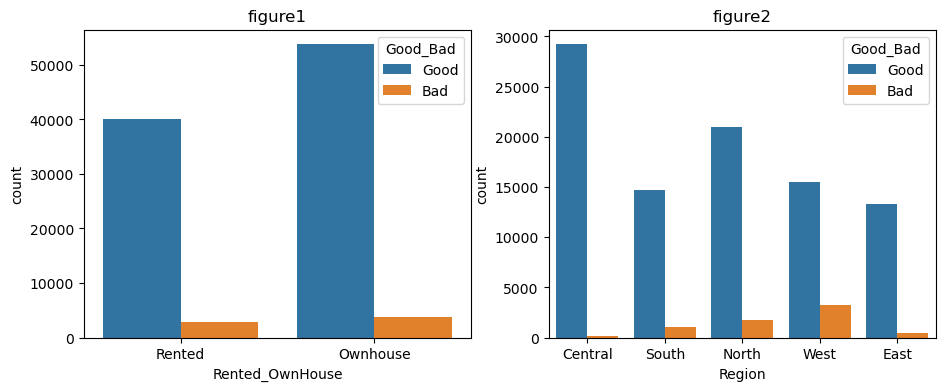

In [89]:
plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
sns.countplot(x='Rented_OwnHouse',hue='Good_Bad',data=num)
plt.title("figure1")

plt.subplot(1,3,2)
sns.countplot(x='Region',hue='Good_Bad',data=num)
plt.title("figure2")

plt.show()

According to figure 1, people who have their ownhouse is good as compared to who have rented house and same goes with bad

According to figure2, Good people is more in cental region followed by north region
In terms of bad, west people is more followed by north region

In [90]:
#using group by function, differentiate rented Ownhouse in terms of Good Bad
num.groupby(['Rented_OwnHouse'])['Good_Bad'].value_counts().sort_values(ascending=False)

Rented_OwnHouse  Good_Bad
Ownhouse         Good        53751
Rented           Good        39976
Ownhouse         Bad          3829
Rented           Bad          2944
Name: Good_Bad, dtype: int64

In [91]:
#using group by function, differentiate Region in terms of Good Bad
num.groupby(['Region'])['Good_Bad'].value_counts().sort_values(ascending=False)

Region   Good_Bad
Central  Good        29218
North    Good        20991
West     Good        15485
South    Good        14702
East     Good        13331
West     Bad          3266
North    Bad          1768
South    Bad          1074
East     Bad           505
Central  Bad           160
Name: Good_Bad, dtype: int64

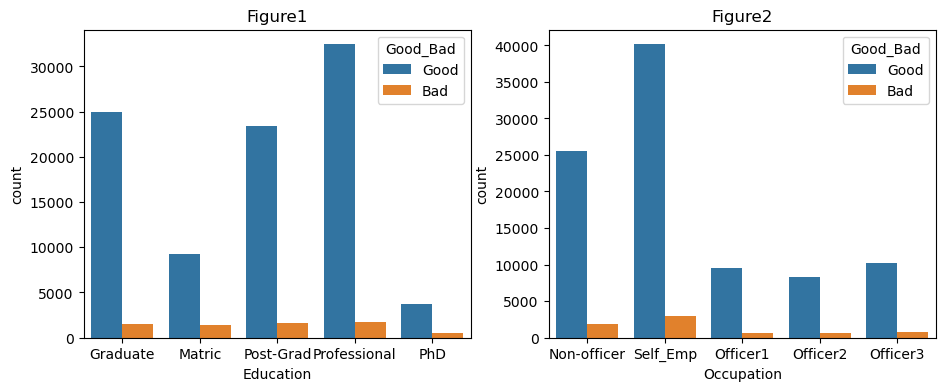

In [92]:
plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
sns.countplot(x='Education',hue='Good_Bad',data=num)
plt.title("Figure1")

plt.subplot(1,3,2)
sns.countplot(x='Occupation',hue='Good_Bad',data=num)
plt.title("Figure2")

plt.show()

In [93]:
#using group by function, differentiate Education in terms of Good Bad
num.groupby(['Education'])['Good_Bad'].value_counts().sort_values(ascending=False)


Education     Good_Bad
Professional  Good        32447
Graduate      Good        24934
Post-Grad     Good        23375
Matric        Good         9283
PhD           Good         3688
Professional  Bad          1678
Post-Grad     Bad          1649
Graduate      Bad          1552
Matric        Bad          1388
PhD           Bad           506
Name: Good_Bad, dtype: int64

In [94]:
#using group by function, differentiate Occupation in terms of Good Bad
num.groupby(['Occupation'])['Good_Bad'].value_counts().sort_values(ascending=False)

Occupation   Good_Bad
Self_Emp     Good        40148
Non-officer  Good        25568
Officer3     Good        10181
Officer1     Good         9499
Officer2     Good         8331
Self_Emp     Bad          2894
Non-officer  Bad          1853
Officer3     Bad           734
Officer2     Bad           649
Officer1     Bad           643
Name: Good_Bad, dtype: int64

Analysing Numerical data

In [95]:
num1=training_data.select_dtypes(exclude='object')       #selecting numerical data from training data and save in a variable num1
num1.head(2)                                   #see two rows

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  \
87935         0.0                              0.889997  60.0   
3892          0.0                              1.000000  34.0   

       NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  \
87935                                   0.0  2252.000000   
3892                                    0.0     0.058946   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
87935                              5.0                      0.0   
3892                               2.0                      0.0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
87935                           0.0                                   0.0   
3892                            0.0                                   0.0   

       MonthlyIncome_Random_Sample  NumberOfDependents_Random_Sample  
87935                       5988.0                               0.0  
3892                        4325.0                               0.0

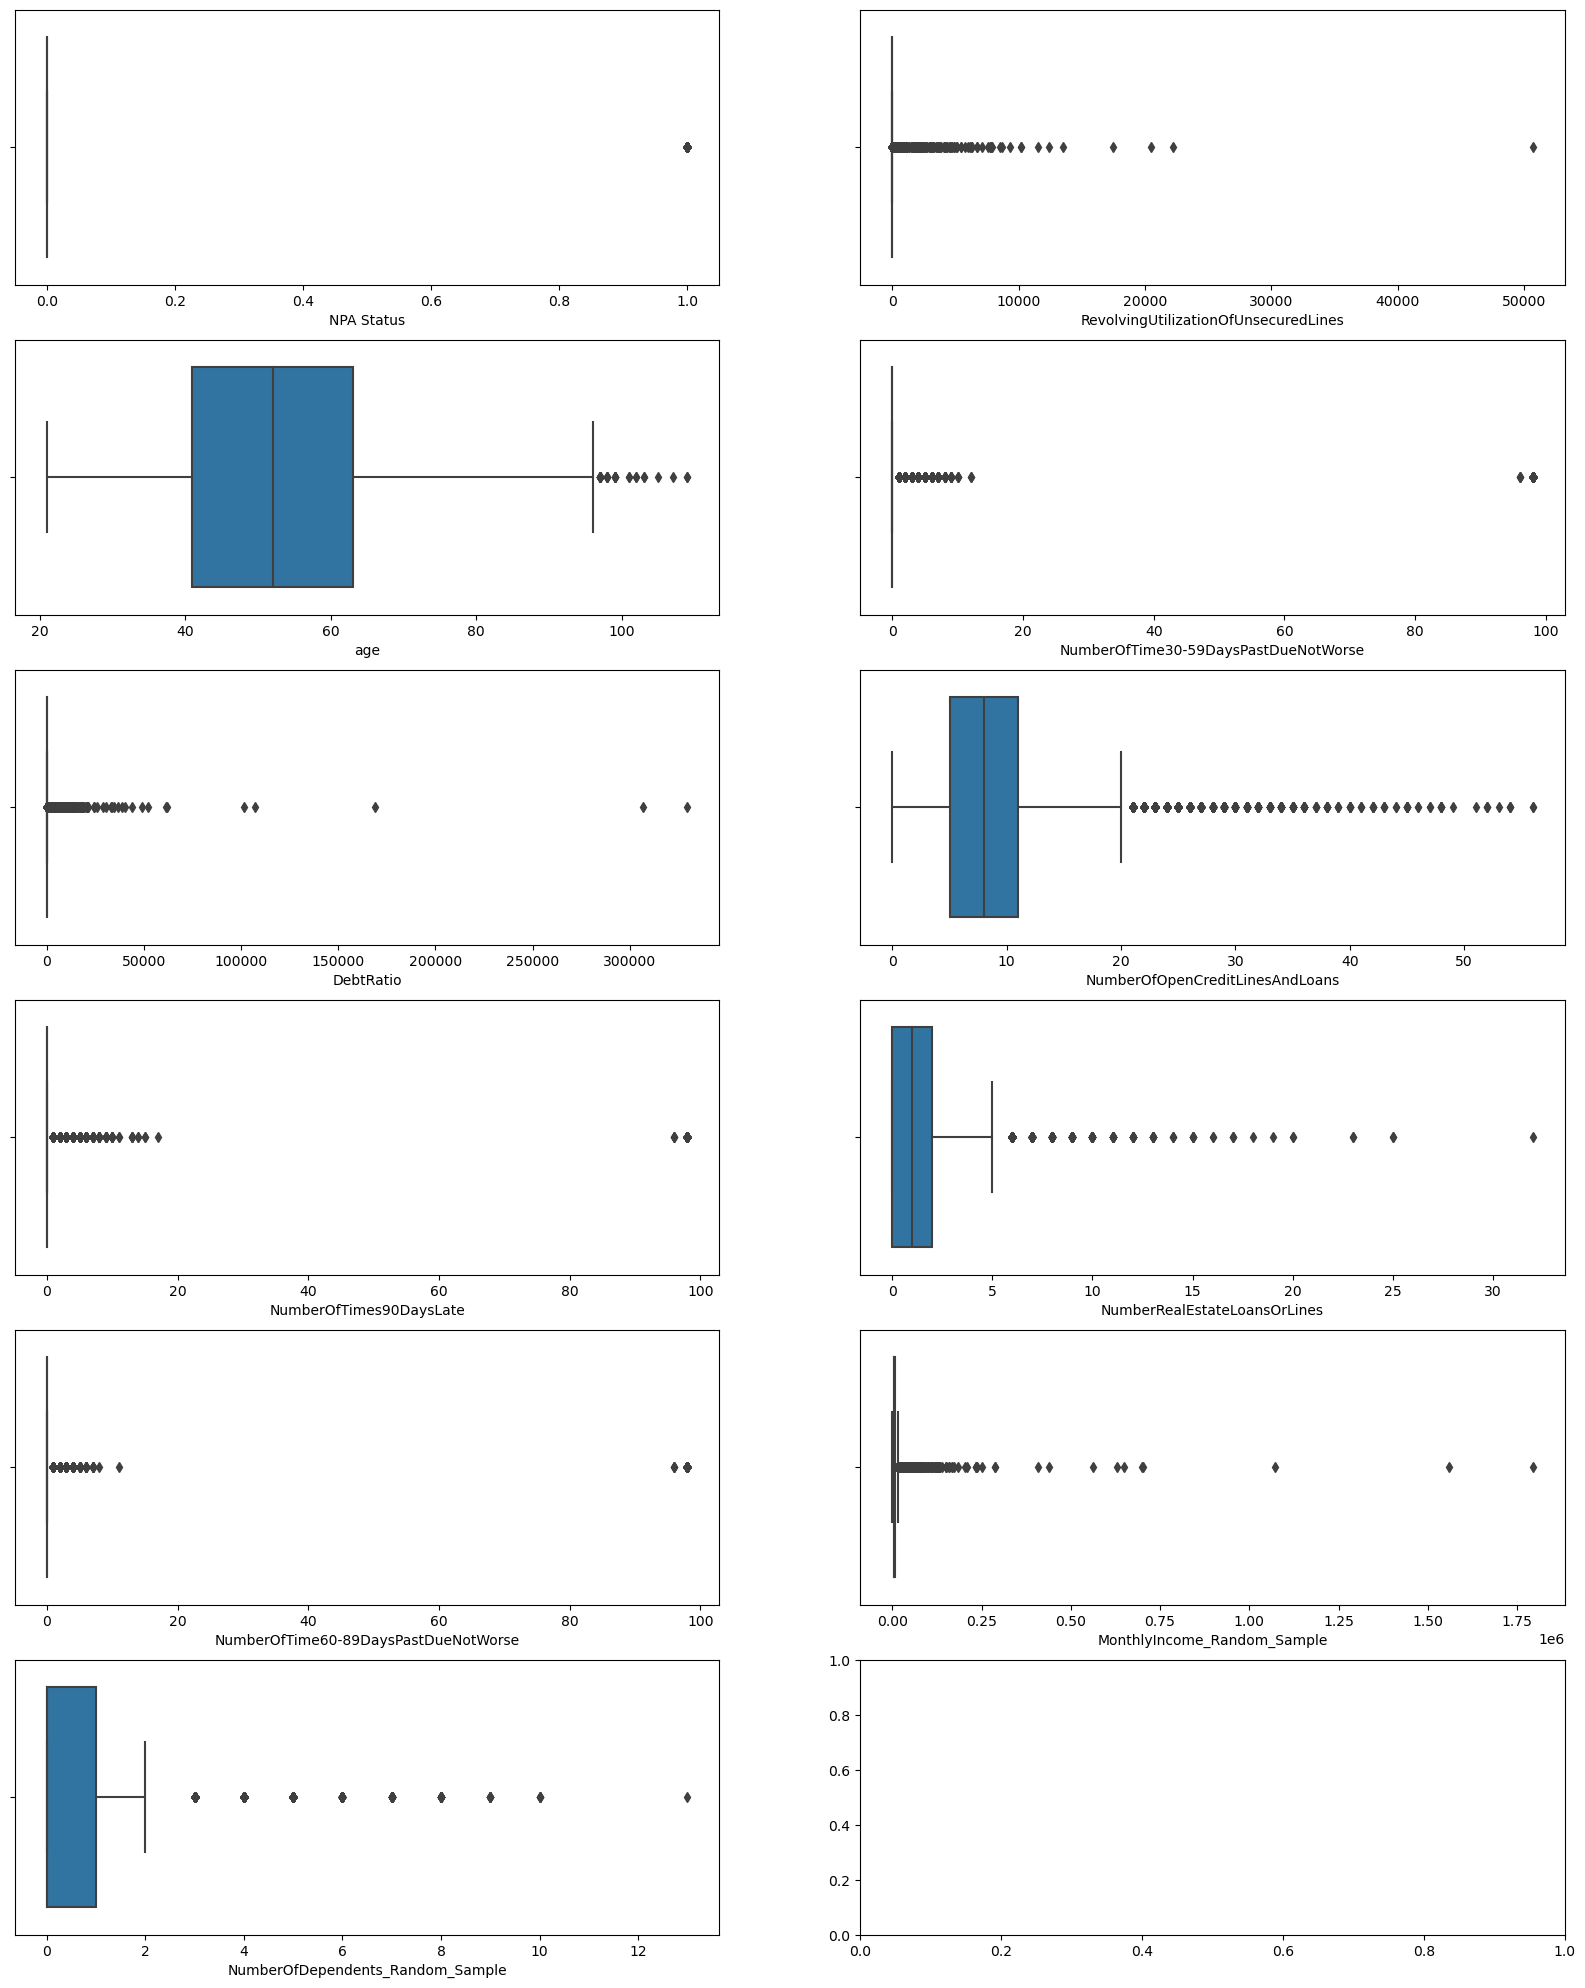

In [96]:
fig, ax=plt.subplots(6,2,figsize=(20,25))     #creating 6*2=12 grid of subplots, and give figuresize width20,height 15
for i, subplot in zip(num1, ax.flatten()):   #ax.flatten() function is used to iterate over each subplot, zip function is used to take 2 column at a time
    sns.boxplot(x=num1[i], ax=subplot)

According to box plot, there are outlier present in each column



### Bivariate Analysis

In [97]:
training_data.columns           #see all column in training data

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'Good_Bad', 'MonthlyIncome_Random_Sample',
       'NumberOfDependents_Random_Sample'],
      dtype='object')

---------visualize categorical to Numerical

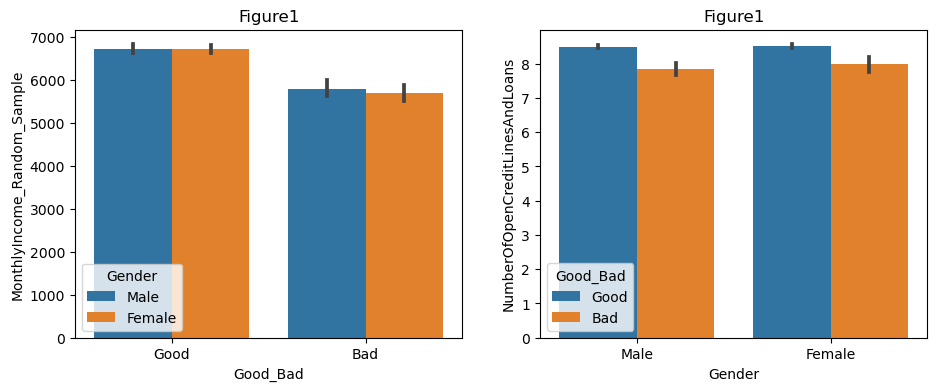

In [98]:

plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
sns.barplot(x="Good_Bad",y= "MonthlyIncome_Random_Sample",hue="Gender",data=training_data)
plt.title("Figure1")

plt.subplot(1,3,2)
sns.barplot(x="Gender",y= "NumberOfOpenCreditLinesAndLoans",hue="Good_Bad",data=training_data)
plt.title("Figure1")

plt.show()

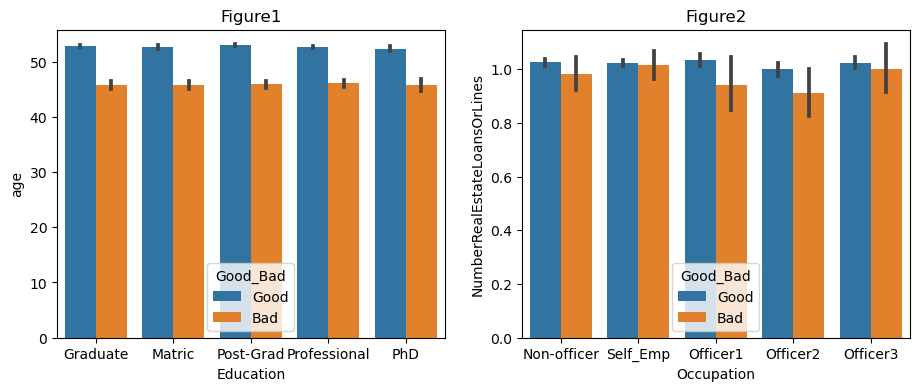

In [99]:
plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
sns.barplot(x="Education",y= "age",hue="Good_Bad",data=training_data)
plt.title("Figure1")

plt.subplot(1,3,2)
sns.barplot(x="Occupation",y= "NumberRealEstateLoansOrLines",hue="Good_Bad",data=training_data)
plt.title("Figure2")
plt.show()

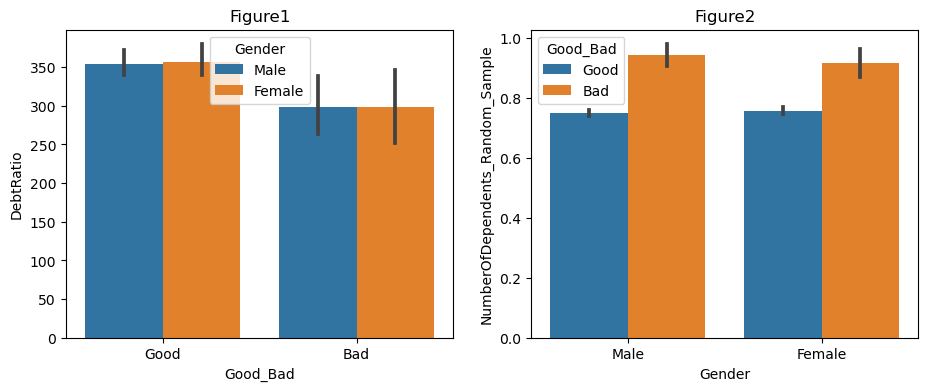

In [100]:
plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
sns.barplot(x="Good_Bad",y= "DebtRatio",hue="Gender",data=training_data)
plt.title("Figure1")

plt.subplot(1,3,2)
sns.barplot(x="Gender",y= "NumberOfDependents_Random_Sample",hue="Good_Bad",data=training_data)
plt.title("Figure2")
plt.show()

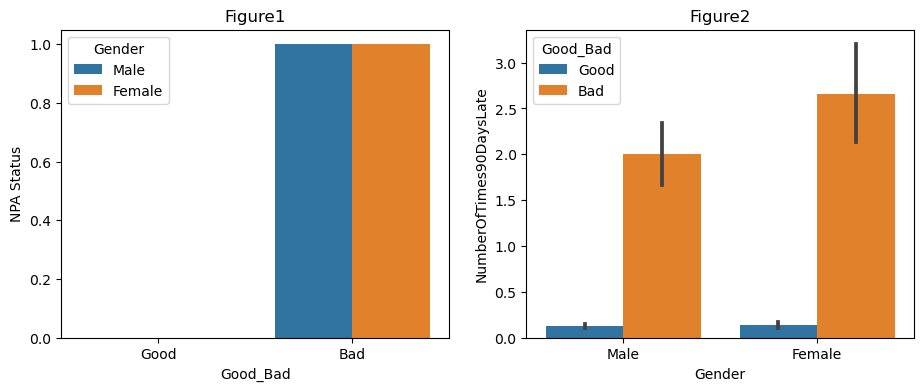

In [101]:
plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
sns.barplot(x="Good_Bad",y= "NPA Status",hue="Gender",data=training_data)
plt.title("Figure1")

plt.subplot(1,3,2)
sns.barplot(x="Gender",y= "NumberOfTimes90DaysLate",hue="Good_Bad",data=training_data)
plt.title("Figure2")
plt.show()

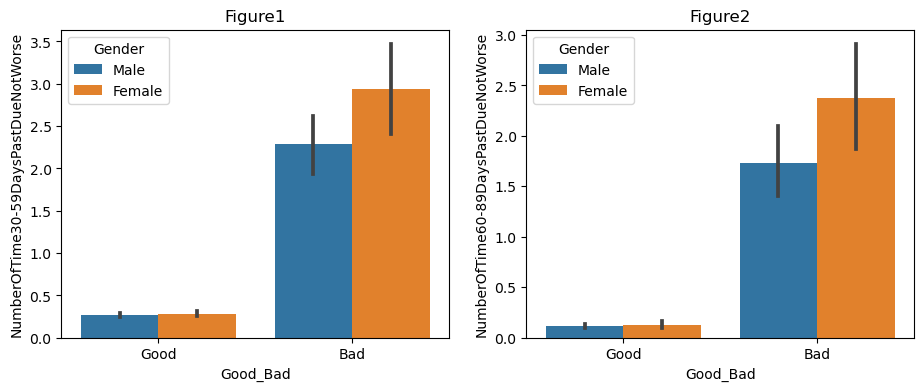

In [102]:
plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
sns.barplot(x="Good_Bad",y= "NumberOfTime30-59DaysPastDueNotWorse",hue="Gender",data=training_data)
plt.title("Figure1")

plt.subplot(1,3,2)
sns.barplot(x="Good_Bad",y= "NumberOfTime60-89DaysPastDueNotWorse",hue="Gender",data=training_data)
plt.title("Figure2")
plt.show()

-----numerical to numerical analysis

In [103]:
num1.head(2)      

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  \
87935         0.0                              0.889997  60.0   
3892          0.0                              1.000000  34.0   

       NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  \
87935                                   0.0  2252.000000   
3892                                    0.0     0.058946   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
87935                              5.0                      0.0   
3892                               2.0                      0.0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
87935                           0.0                                   0.0   
3892                            0.0                                   0.0   

       MonthlyIncome_Random_Sample  NumberOfDependents_Random_Sample  
87935                       5988.0                               0.0  
3892                        4325.0                               0.0

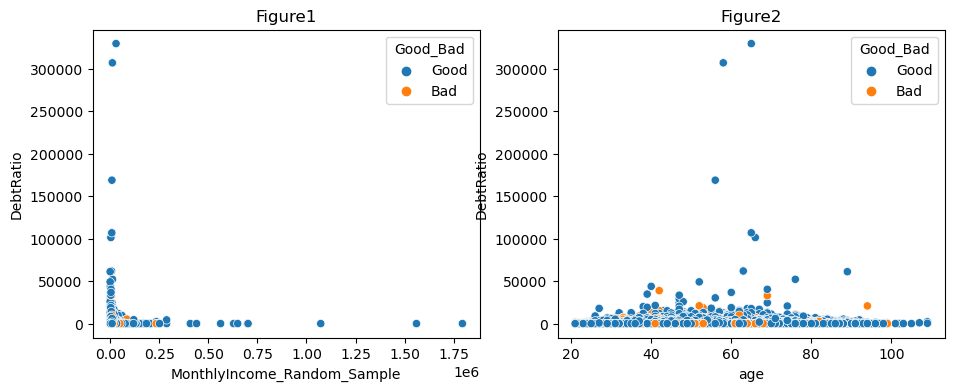

In [104]:
plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
sns.scatterplot(x='MonthlyIncome_Random_Sample',y="DebtRatio",hue="Good_Bad",data=training_data)
plt.title("Figure1")

plt.subplot(1,3,2)
sns.scatterplot(x='age',y="DebtRatio",hue="Good_Bad",data=training_data)
plt.title("Figure2")
plt.show()



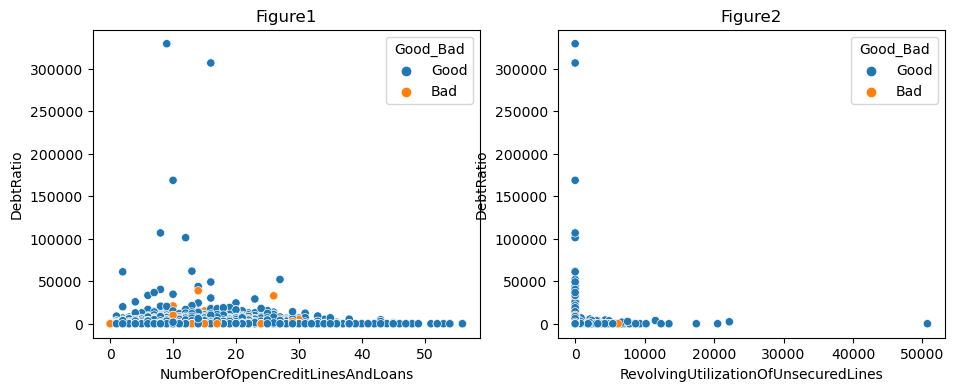

In [105]:
plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
sns.scatterplot(x='NumberOfOpenCreditLinesAndLoans',y="DebtRatio",hue="Good_Bad",data=training_data)
plt.title("Figure1")

plt.subplot(1,3,2)
sns.scatterplot(x='RevolvingUtilizationOfUnsecuredLines',y="DebtRatio",hue="Good_Bad",data=training_data)
plt.title("Figure2")
plt.show()


### Multivariate Analysis

In [106]:
#multivariate analysis on numeric columns
training_data.head(2)

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender  \
87935         0.0                              0.889997  60.0    Male   
3892          0.0                              1.000000  34.0  Female   

        Region Rented_OwnHouse   Occupation Education  \
87935  Central          Rented  Non-officer  Graduate   
3892     South        Ownhouse     Self_Emp    Matric   

       NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  \
87935                                   0.0  2252.000000   
3892                                    0.0     0.058946   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
87935                              5.0                      0.0   
3892                               2.0                      0.0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
87935                           0.0                                   0.0   
3892                            0.0                                   0.0   

      Good_Bad  MonthlyIncome_Random_Sample  NumberOfDependents_Random_Sample  
87935     Good                       5988.0                               0.0  
3892      Good                       4325.0                               0.0

C:\Users\DELL\AppData\Local\Temp\ipykernel_240\3234238709.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = training_data.corr()


<Axes: >

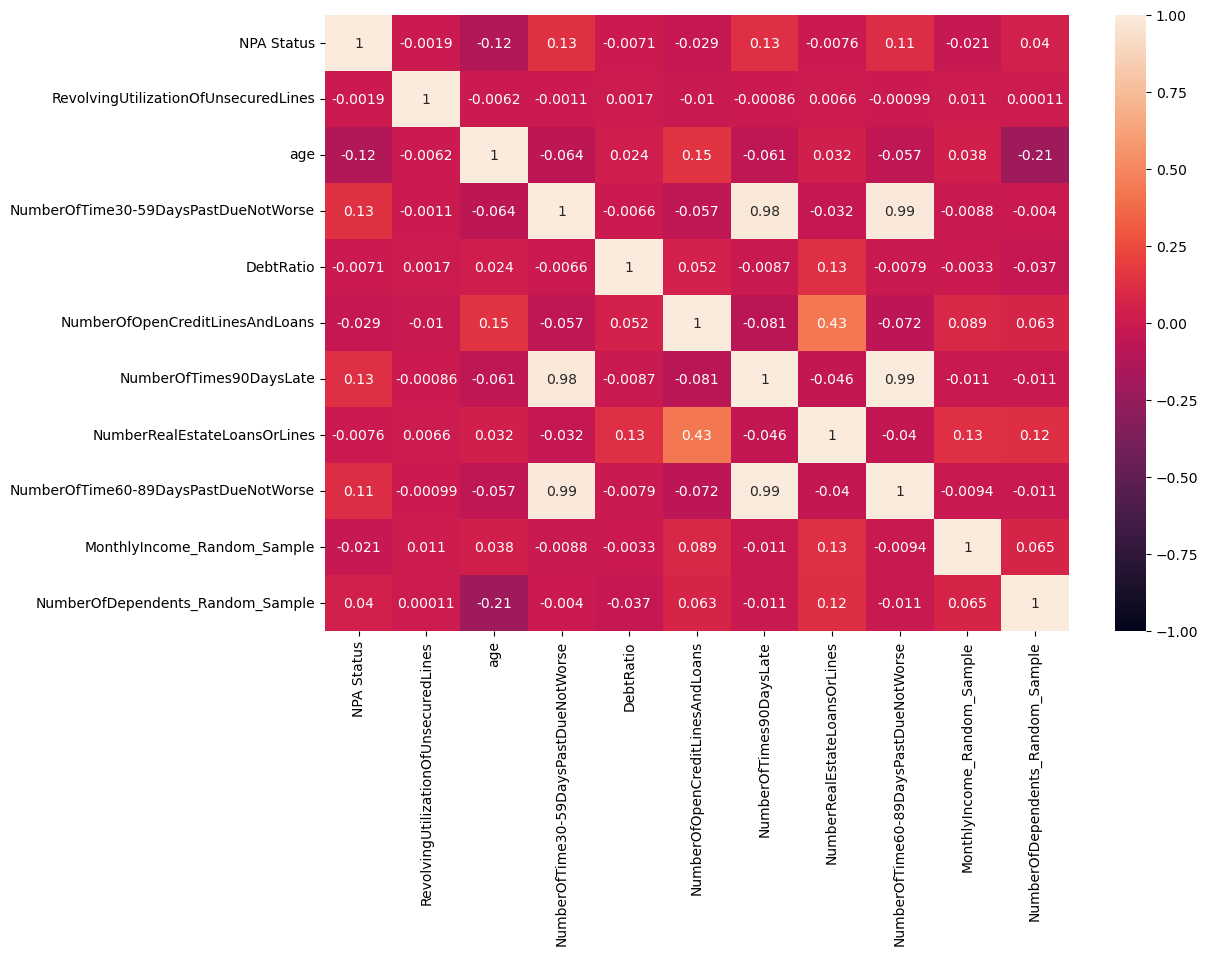

In [107]:
## Co-relation matrix using training data
fig,ax = plt.subplots(figsize = (12,8))
corr = training_data.corr()
sns.heatmap(corr,annot=True,vmax=1,vmin=-1)

From heat map

column NumberOfTime30-59DaysPastDueNotWorse and NumberOfTime60-89DaysPastDueNotWorse are strong positive co related.

column NumberOfTime30-59DaysPastDueNotWorse and NumberOfTimed90DaysLate are strong positive co related.

column NumberOfDependents_Random_Sample and age are strong negative corelated.

column NPA Status and age are strong negative corelated.



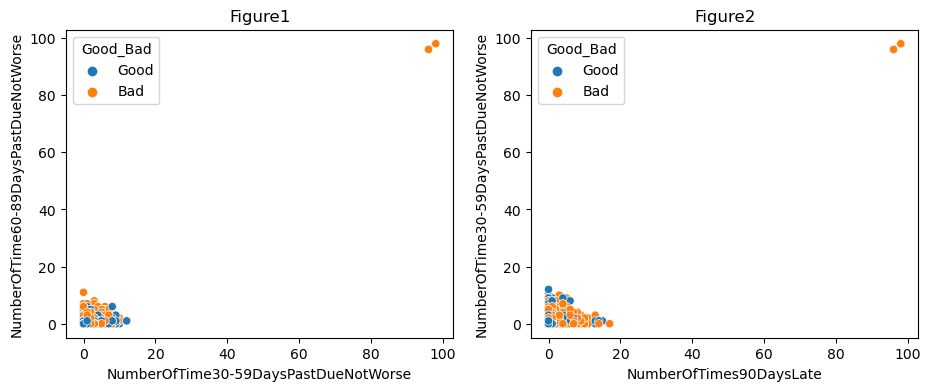

In [108]:
#let's visualize using scatter plot

plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
sns.scatterplot(x='NumberOfTime30-59DaysPastDueNotWorse',y="NumberOfTime60-89DaysPastDueNotWorse",hue="Good_Bad",data=training_data)
plt.title("Figure1")

plt.subplot(1,3,2)
sns.scatterplot(x='NumberOfTimes90DaysLate',y="NumberOfTime30-59DaysPastDueNotWorse",hue="Good_Bad",data=training_data)
plt.title("Figure2")
plt.show()


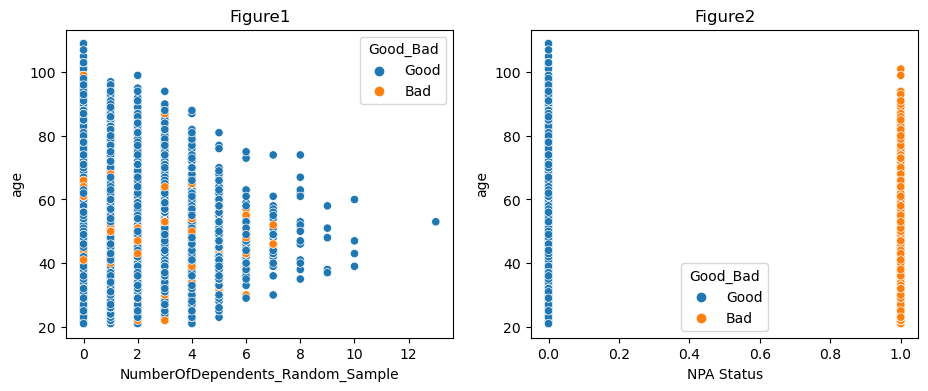

In [109]:
#let's visualize using scatter plot

plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
sns.scatterplot(x='NumberOfDependents_Random_Sample',y="age",hue="Good_Bad",data=training_data)
plt.title("Figure1")

plt.subplot(1,3,2)
sns.scatterplot(x='NPA Status',y="age",hue="Good_Bad",data=training_data)
plt.title("Figure2")
plt.show()


In [110]:
#EDA completed in training data

# Checking Normal Distribution in train & test data

#### ----working with training data but Numerical columns

In [111]:
training_data.head(2)       

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender  \
87935         0.0                              0.889997  60.0    Male   
3892          0.0                              1.000000  34.0  Female   

        Region Rented_OwnHouse   Occupation Education  \
87935  Central          Rented  Non-officer  Graduate   
3892     South        Ownhouse     Self_Emp    Matric   

       NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  \
87935                                   0.0  2252.000000   
3892                                    0.0     0.058946   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
87935                              5.0                      0.0   
3892                               2.0                      0.0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
87935                           0.0                                   0.0   
3892                            0.0                                   0.0   

      Good_Bad  MonthlyIncome_Random_Sample  NumberOfDependents_Random_Sample  
87935     Good                       5988.0                               0.0  
3892      Good                       4325.0                               0.0

here we see that there are some column, name NPA Status, NumberOfTime30-59DaysPastDueNotWorse ,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse and NumberOfDependents have value in the form of 0 1 so we are checking it

In [112]:
training_data["NPA Status"].unique()    

array([0., 1.])

In [113]:
training_data["NumberOfTime30-59DaysPastDueNotWorse"].unique()

array([ 0.,  3.,  1.,  2.,  4.,  8.,  5., 98.,  7.,  6., 96., 10.,  9.,
       12.])

In [114]:
training_data["NumberOfTimes90DaysLate"].unique()

array([ 0.,  2.,  1.,  5.,  4.,  3.,  6., 98., 96.,  7.,  9.,  8., 15.,
       10., 11., 13., 14., 17.])

In [115]:
training_data["NumberOfTime60-89DaysPastDueNotWorse"].unique()

array([ 0.,  2.,  1.,  3.,  7., 98., 96.,  4.,  5.,  8.,  6., 11.])

In [116]:
Numeric_training_data=training_data.select_dtypes(exclude='object')    #extract numeric column from training data and store in a variable
Numeric_training_data.columns          #checking column in numeric training data

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_Random_Sample', 'NumberOfDependents_Random_Sample'],
      dtype='object')

In [117]:
#create a function of graph

def plotting_graph(Numeric_training_data,var) :
    plt.figure(figsize=(15,3))  #set figure size
    
    plt.subplot(1,3,1)    # it has 1 row, 3 figure, this is 1st figure
    sns.boxplot(x=Numeric_training_data[var])
    
    plt.subplot(1,3,2)    # it has 1 row, 3 figure, this is 2nd figure
    (Numeric_training_data[var]).plot(kind='kde',color='r')
    
    plt.subplot(1,3,3)     # it has 1 row, 3 figure, this is 3rd figure
    stats.probplot(Numeric_training_data[var],plot=plt)
    
    plt.show()

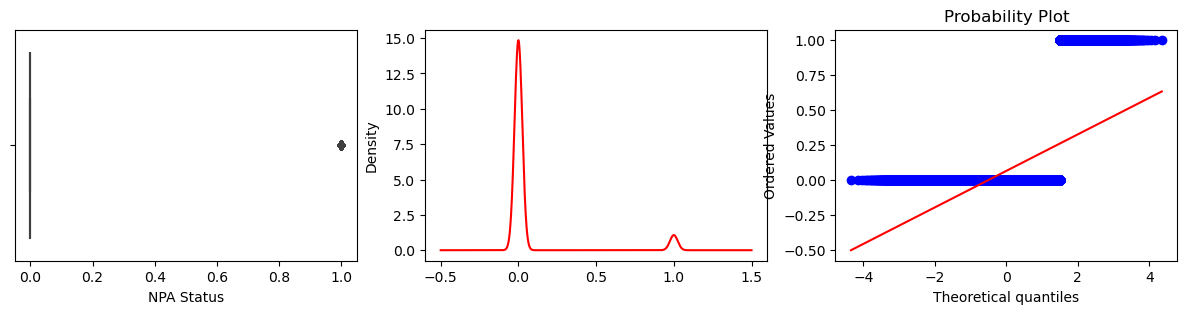

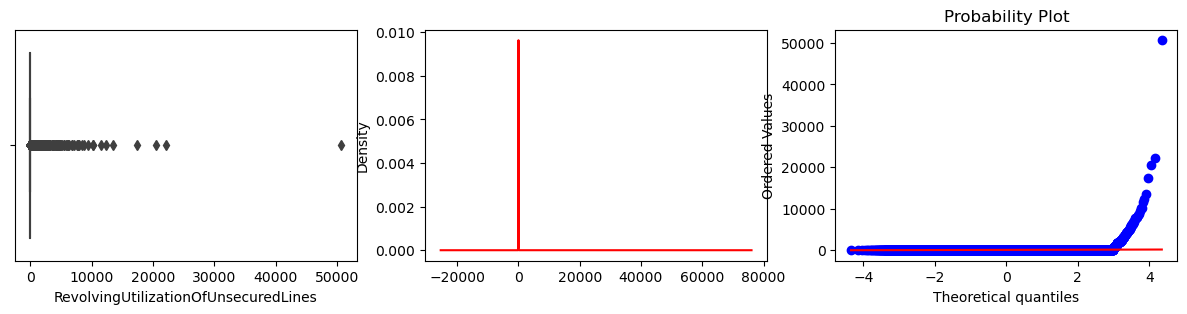

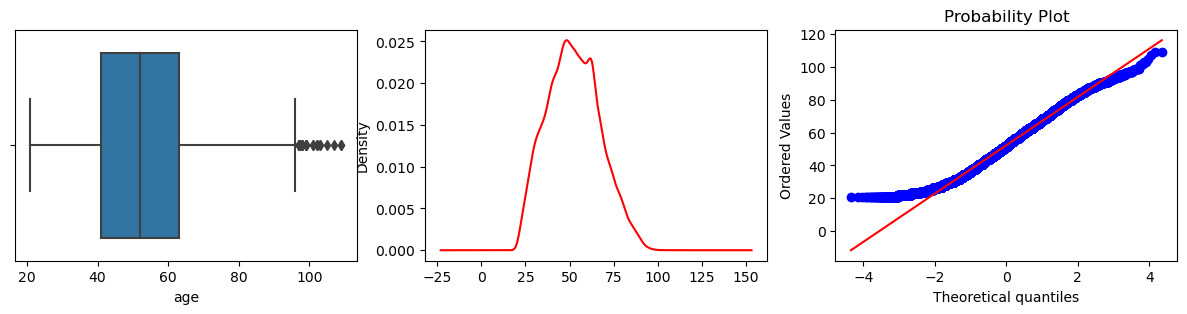

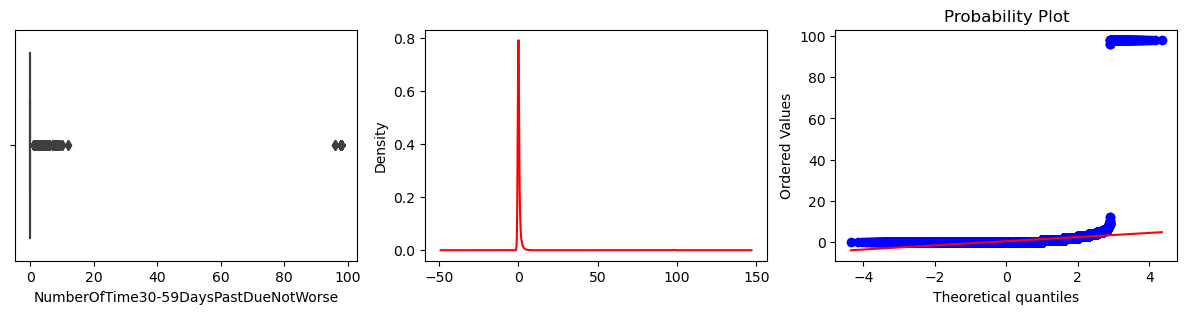

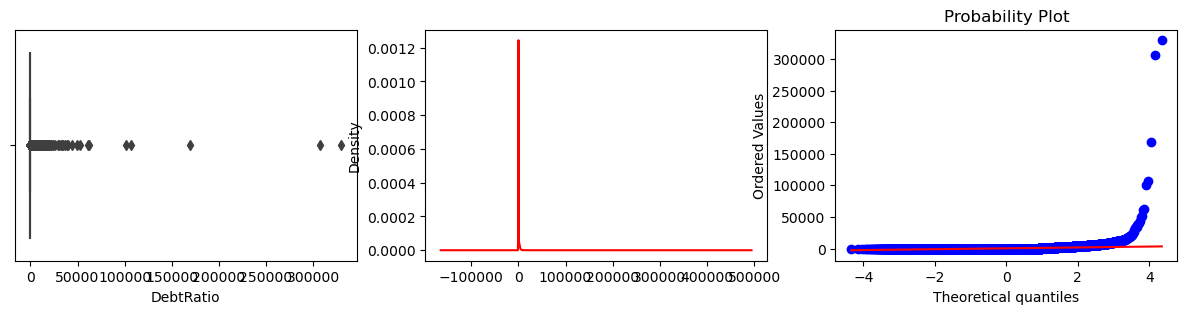

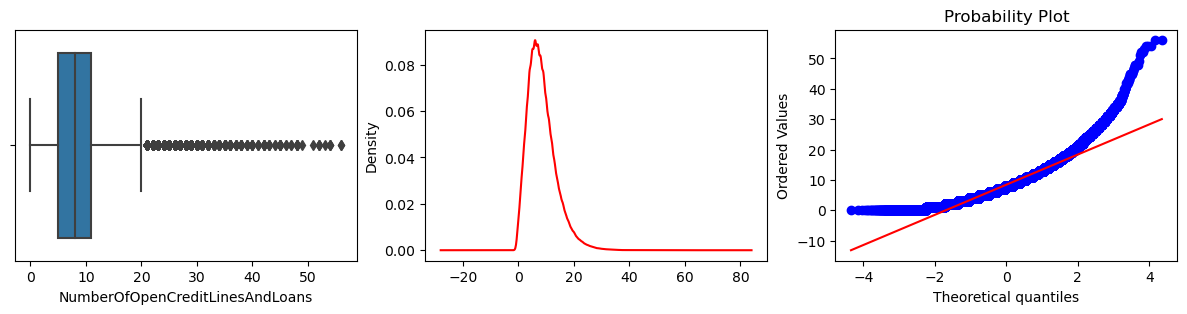

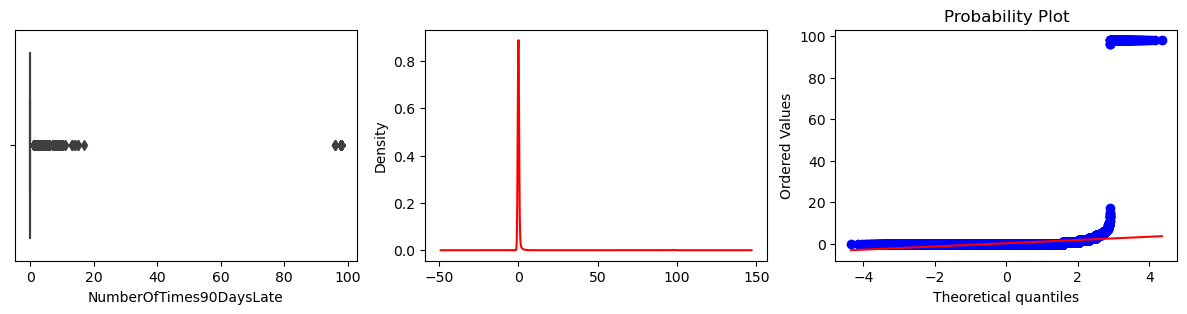

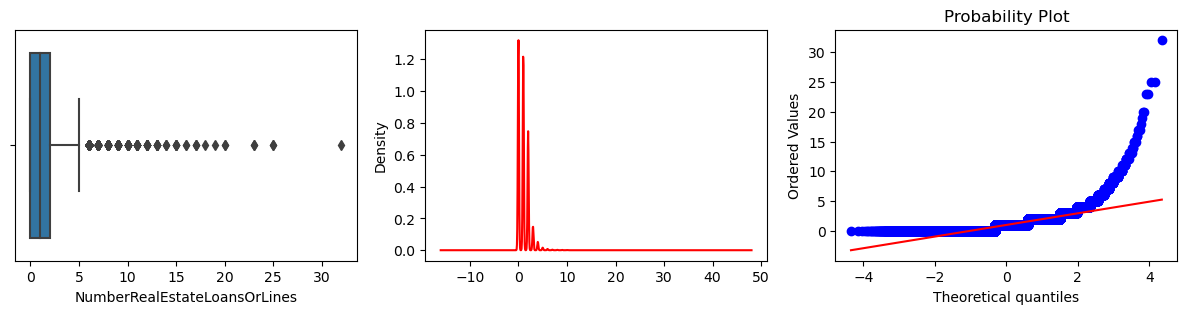

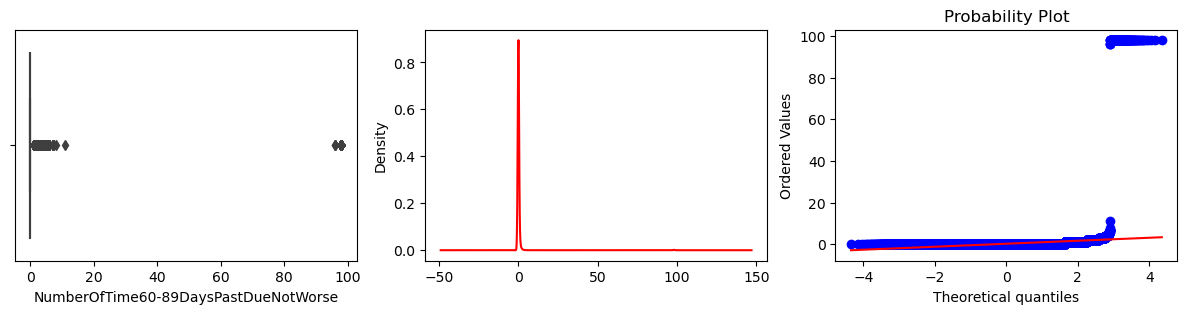

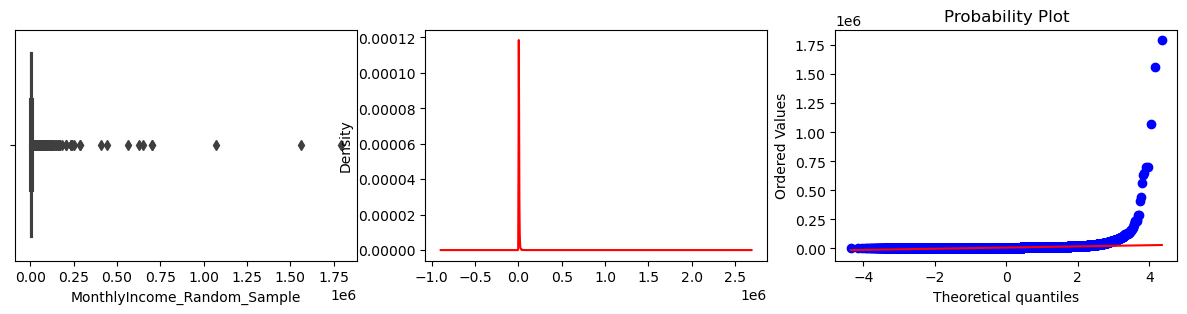

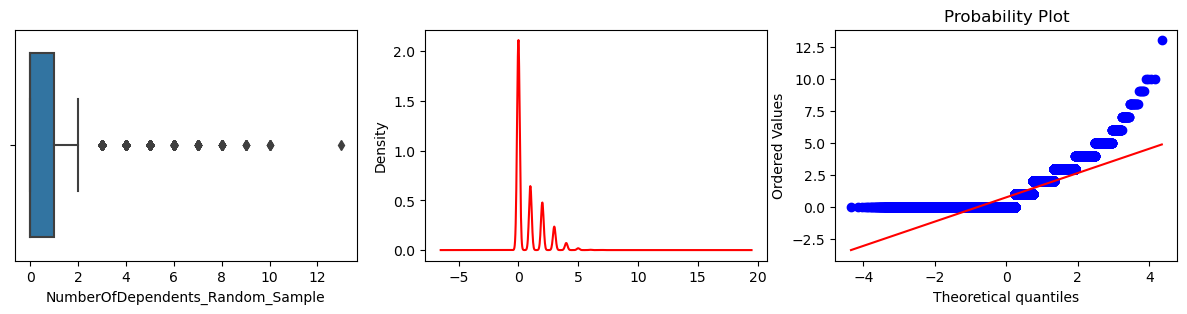

In [118]:
for i in Numeric_training_data.columns :          #i iterate each column 1 by one
    plotting_graph(Numeric_training_data,i)             #calling the function

### YEo-johnson Technique

In [119]:
#create a function of graph

def plotting_graph_yeo(Numeric_training_data,var) :
    plt.figure(figsize=(15,3))  #set figure size
    
    plt.subplot(1,3,1)    # it has 1 row, 3 figure, this is 1st figure
    sns.boxplot(x=Numeric_training_data[var+'_yeo_johnson'])
    
    plt.subplot(1,3,2)    # it has 1 row, 3 figure, this is 2nd figure
    (Numeric_training_data[var+'_yeo_johnson']).plot(kind='kde',color='r')
    
    plt.subplot(1,3,3)     # it has 1 row, 3 figure, this is 3rd figure
    stats.probplot(Numeric_training_data[var+'_yeo_johnson'],plot=plt)
    
    plt.show()

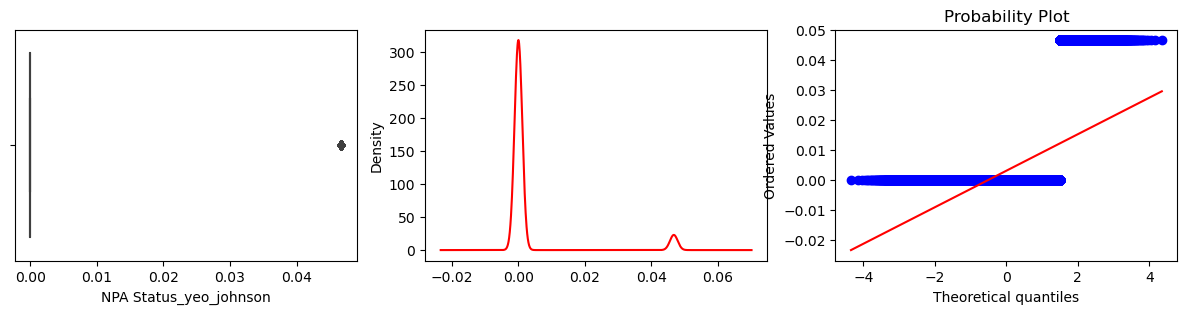

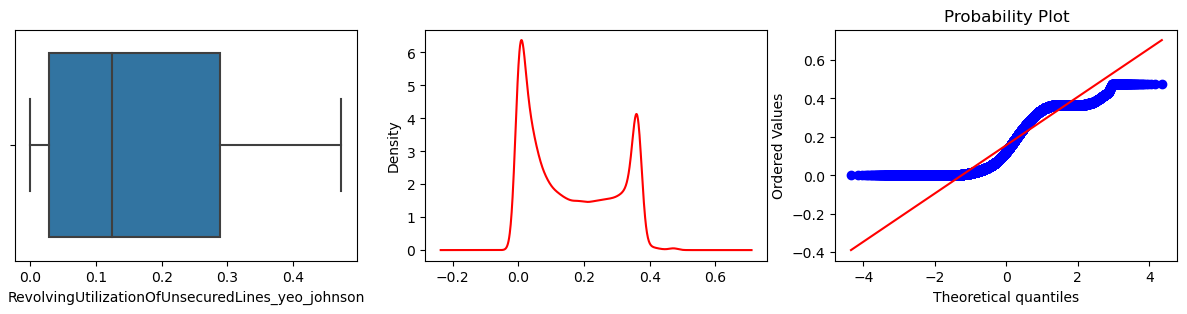

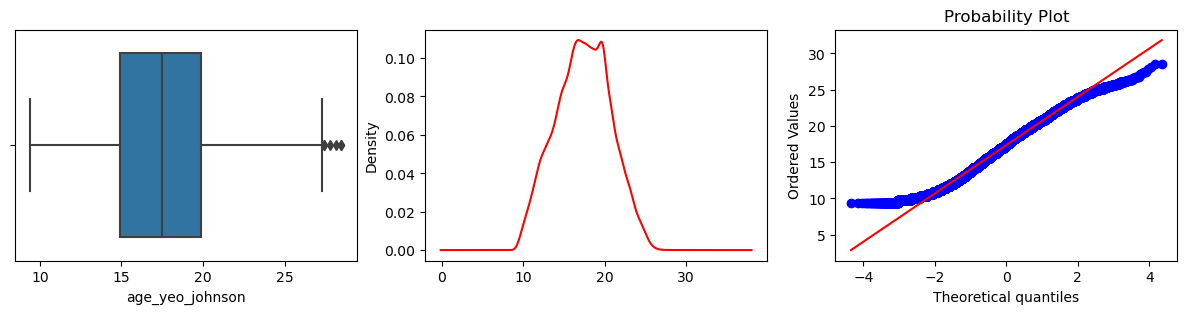

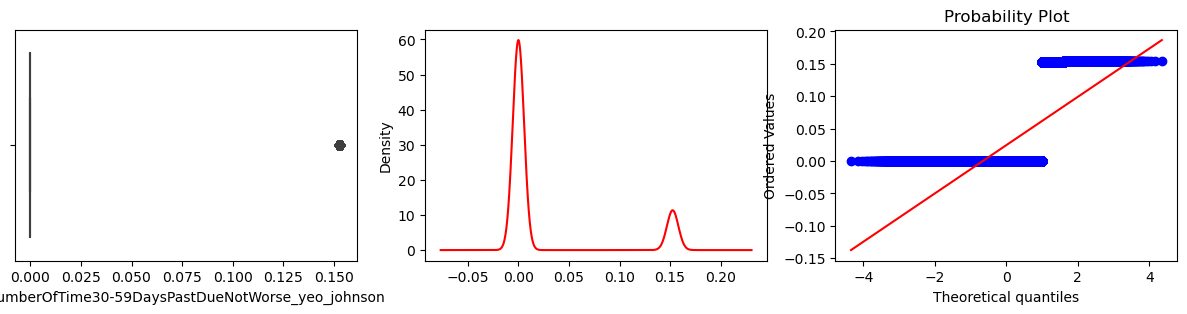

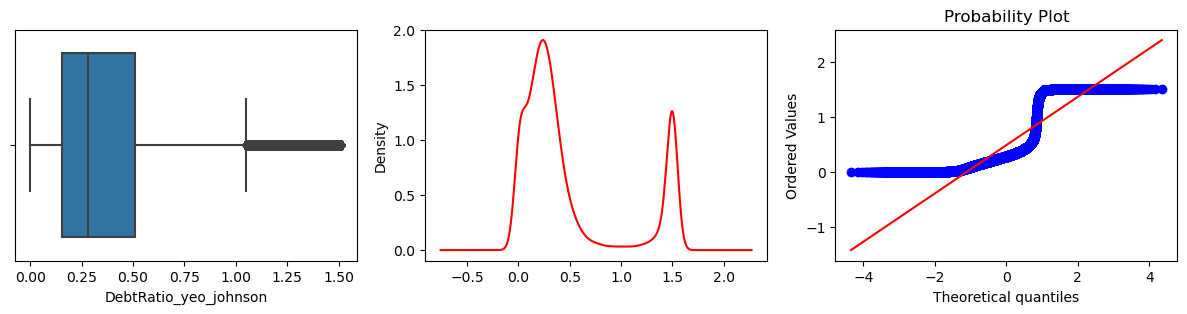

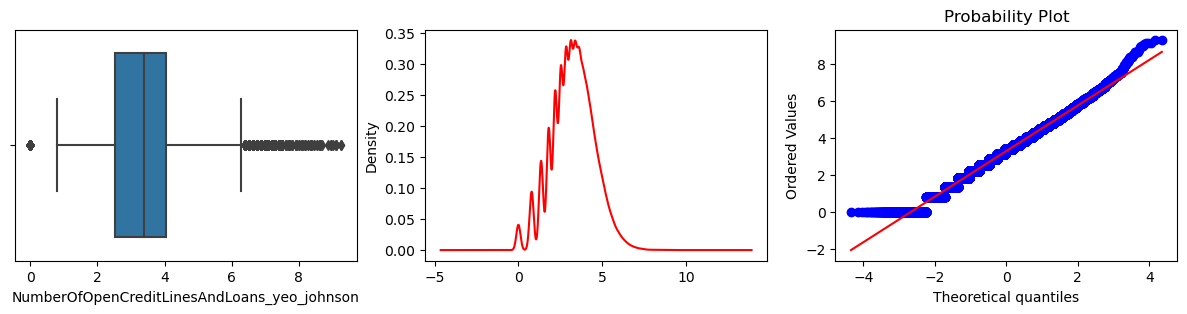

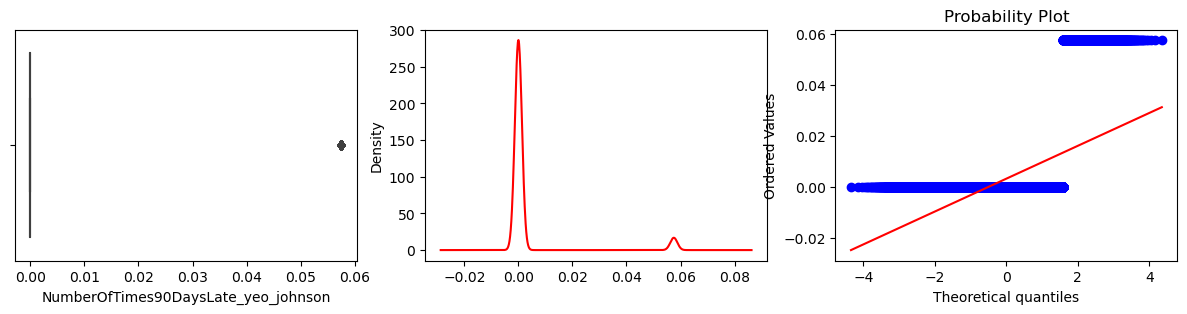

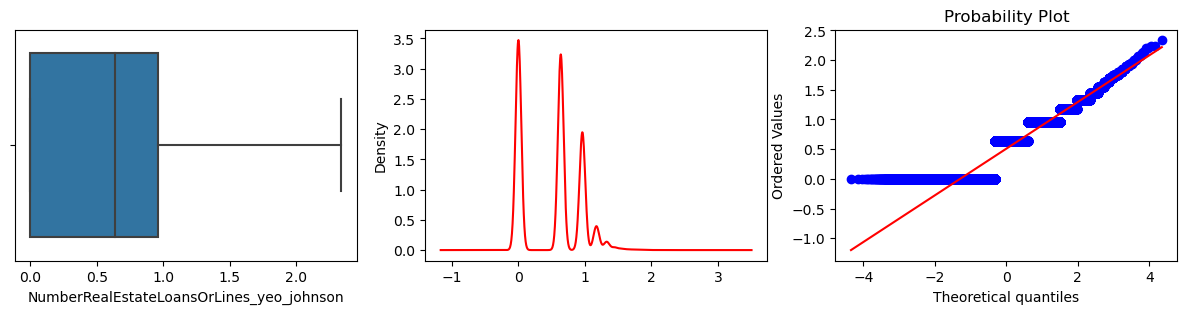

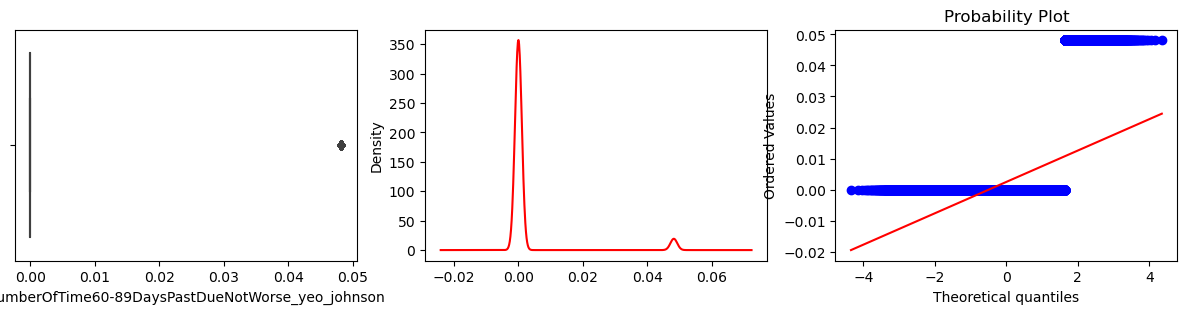

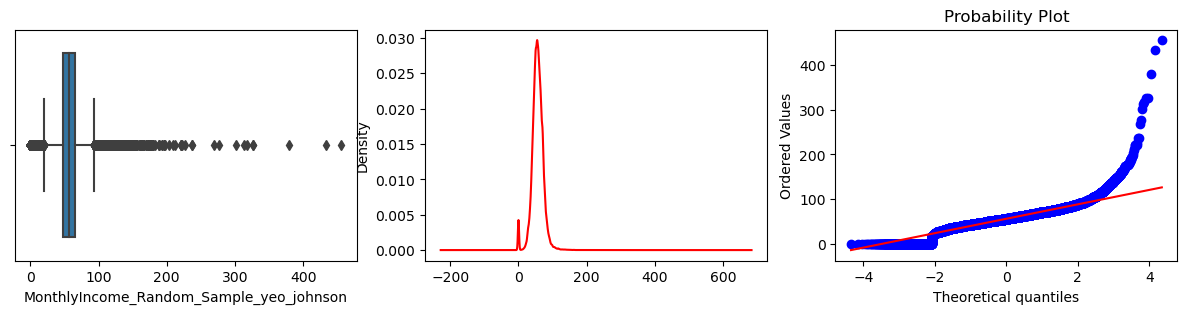

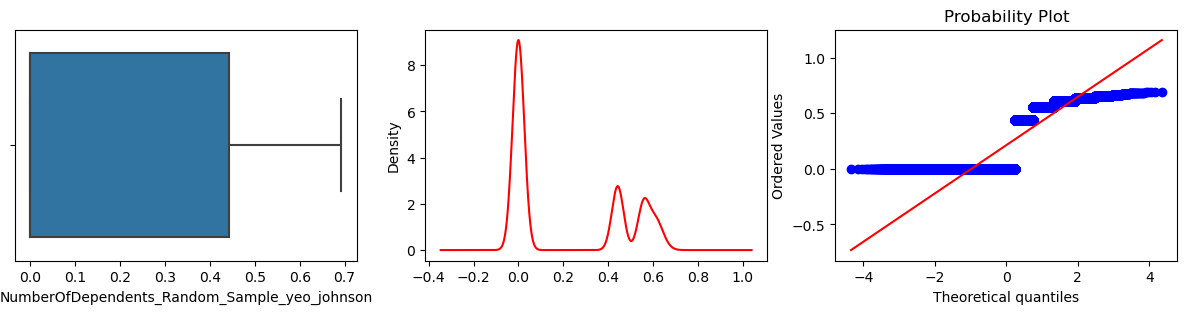

In [120]:
for i in Numeric_training_data.columns:
    Numeric_training_data[i+'_yeo_johnson'] , alpa = stats.yeojohnson(Numeric_training_data[i])
    plotting_graph_yeo(Numeric_training_data , i)   #calling the function
    

In [121]:
(Numeric_training_data.columns)       #checking column name in training data

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_Random_Sample', 'NumberOfDependents_Random_Sample',
       'NPA Status_yeo_johnson',
       'RevolvingUtilizationOfUnsecuredLines_yeo_johnson', 'age_yeo_johnson',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo_johnson',
       'DebtRatio_yeo_johnson', 'NumberOfOpenCreditLinesAndLoans_yeo_johnson',
       'NumberOfTimes90DaysLate_yeo_johnson',
       'NumberRealEstateLoansOrLines_yeo_johnson',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo_johnson',
       'MonthlyIncome_Random_Sample_yeo_johnson',
       'NumberOfDependents_Random_Sample_yeo_johnson'],
      dtype='object')

In [122]:
#finding the length of Numeric_training_data.columns
len((Numeric_training_data.columns))

22

In [123]:
#dropping the previous column 
Numeric_training_data.drop(['NPA Status','RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_Random_Sample', 'NumberOfDependents_Random_Sample'],axis=1,inplace=True)

In [124]:
Numeric_training_data.head()   #checking first 5rows

NPA Status_yeo_johnson  \
87935               -0.000000   
3892                -0.000000   
41404               -0.000000   
91124               -0.000000   
67372                0.046714   

       RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
87935                                          0.350057        19.218351   
3892                                           0.363958        13.121298   
41404                                          0.363958        10.629580   
91124                                          0.210385        19.004802   
67372                                          0.363958        17.916249   

       NumberOfTime30-59DaysPastDueNotWorse_yeo_johnson  \
87935                                         -0.000000   
3892                                          -0.000000   
41404                                         -0.000000   
91124                                         -0.000000   
67372                                          0.153688   

       DebtRatio_yeo_johnson  NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
87935               1.504149                                     2.531923   
3892                0.056204                                     1.352347   
41404               0.136334                                     1.352347   
91124               0.302696                                     3.116456   
67372               1.494790                                     2.531923   

       NumberOfTimes90DaysLate_yeo_johnson  \
87935                            -0.000000   
3892                             -0.000000   
41404                            -0.000000   
91124                            -0.000000   
67372                             0.057516   

       NumberRealEstateLoansOrLines_yeo_johnson  \
87935                                 -0.000000   
3892                                  -0.000000   
41404                                 -0.000000   
91124                                  0.961442   
67372                                  0.636748   

       NumberOfTime60-89DaysPastDueNotWorse_yeo_johnson  \
87935                                         -0.000000   
3892                                          -0.000000   
41404                                         -0.000000   
91124                                         -0.000000   
67372                                          0.048194   

       MonthlyIncome_Random_Sample_yeo_johnson  \
87935                                58.331105   
3892                                 51.690615   
41404                                40.903772   
91124                                53.171998   
67372                                41.774447   

       NumberOfDependents_Random_Sample_yeo_johnson  
87935                                      -0.00000  
3892                                       -0.00000  
41404                                      -0.00000  
91124                                      -0.00000  
67372                                       0.55879

In [125]:
Numeric_training_data.shape         #checking numeric training data shape

(100500, 11)

#### ----working with test data but Numerical columns

In [126]:
#doing same thing with the test data
testing_data.head()

NPA Status  RevolvingUtilizationOfUnsecuredLines   age  Gender  \
59770          0.0                              1.000000  30.0    Male   
21362          0.0                              0.000000  57.0  Female   
127324         0.0                              0.036569  48.0  Female   
140509         0.0                              1.018331  41.0    Male   
144297         0.0                              1.008799  49.0    Male   

         Region Rented_OwnHouse   Occupation     Education  \
59770   Central          Rented     Self_Emp  Professional   
21362     North          Rented     Officer3     Post-Grad   
127324     East          Rented     Officer1     Post-Grad   
140509     West          Rented  Non-officer  Professional   
144297     West          Rented     Officer2  Professional   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  \
59770                                    0.0    44.000000   
21362                                    0.0     0.142562   
127324                                   0.0     0.236294   
140509                                   0.0     0.163138   
144297                                   0.0  3942.000000   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
59770                               0.0                      0.0   
21362                               9.0                      0.0   
127324                              6.0                      0.0   
140509                              4.0                      0.0   
144297                             10.0                      0.0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
59770                            0.0                                   0.0   
21362                            1.0                                   0.0   
127324                           2.0                                   0.0   
140509                           0.0                                   0.0   
144297                           1.0                                   0.0   

       Good_Bad  MonthlyIncome_Random_Sample  \
59770      Good                       5962.0   
21362      Good                       7750.0   
127324     Good                       6000.0   
140509     Good                       4958.0   
144297     Good                       5650.0   

        NumberOfDependents_random_replaced  
59770                                  0.0  
21362                                  0.0  
127324                                 3.0  
140509                                 0.0  
144297                                 0.0

In [127]:
testing_data.shape   #checking shape 

(49500, 17)

In [128]:
#create a new dataset with all numeric data
Numeric_test_data= testing_data.select_dtypes(exclude='object')         #extract categorical column
Numeric_test_data.columns   #checking column name

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_Random_Sample', 'NumberOfDependents_random_replaced'],
      dtype='object')

In [129]:
#visualize numeric test data

#create a function of graph

def plotting_graph(Numeric_test_data,var) :
    plt.figure(figsize=(15,3))  #set figure size
    
    plt.subplot(1,3,1)    # it has 1 row, 3 figure, this is 1st figure
    sns.boxplot(x=Numeric_test_data[var])
    
    plt.subplot(1,3,2)    # it has 1 row, 3 figure, this is 2nd figure
    (Numeric_test_data[var]).plot(kind='kde',color='r')
    
    plt.subplot(1,3,3)     # it has 1 row, 3 figure, this is 3rd figure
    stats.probplot(Numeric_test_data[var],plot=plt)
    
    plt.show()#create a function of graph



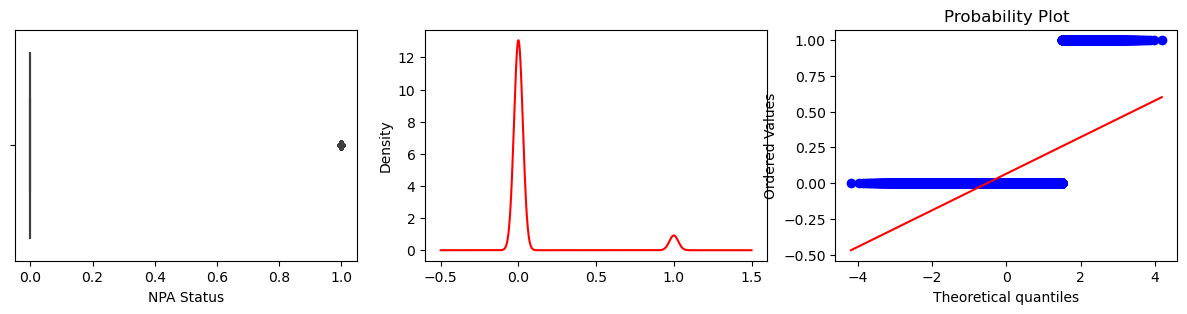

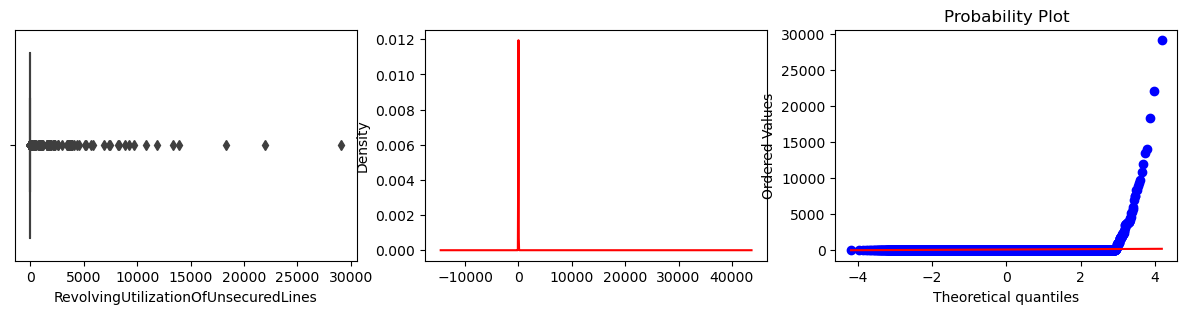

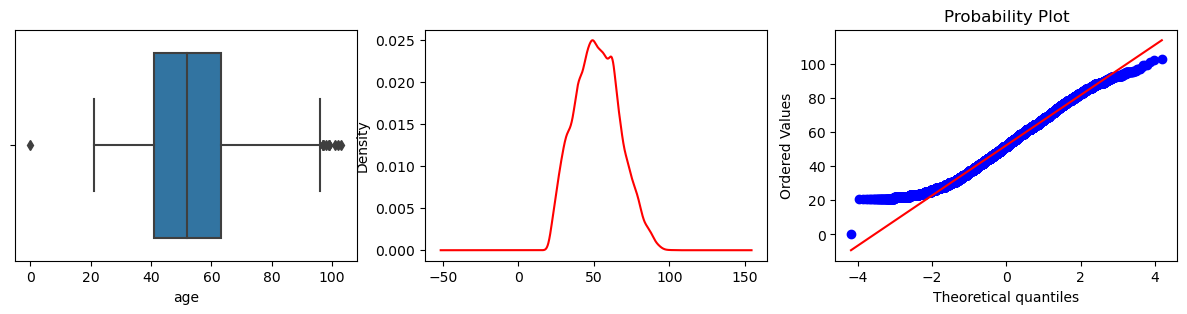

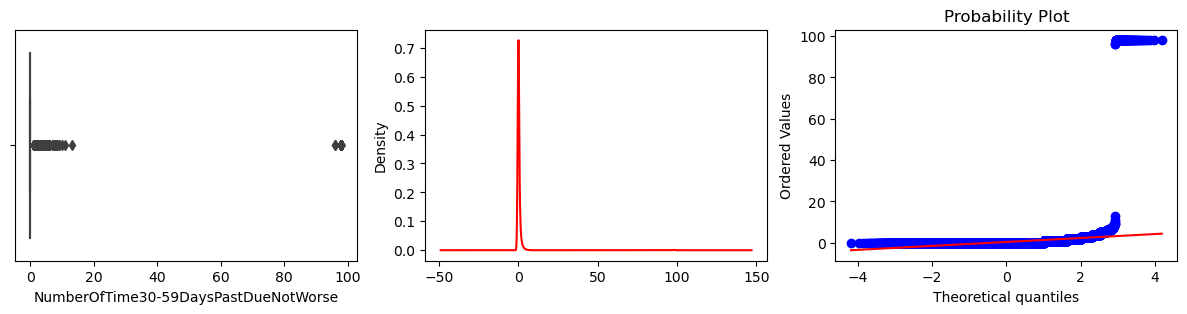

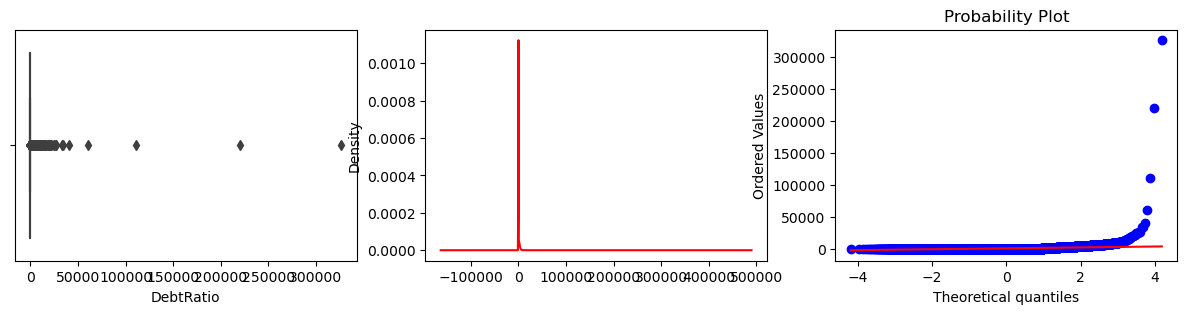

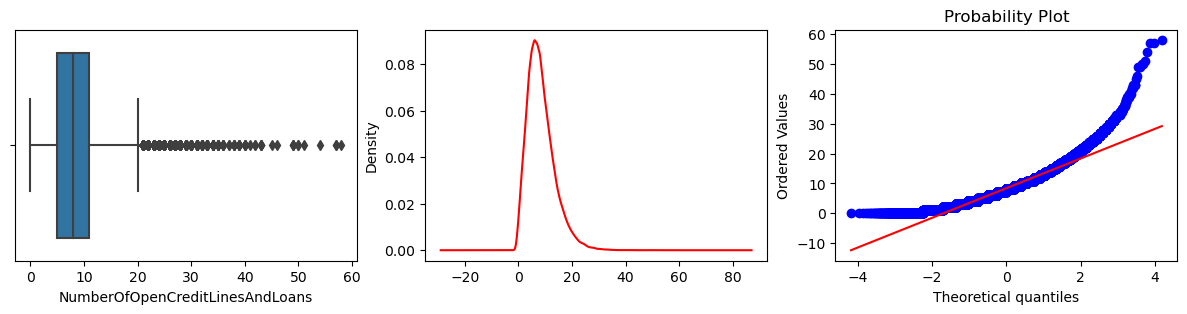

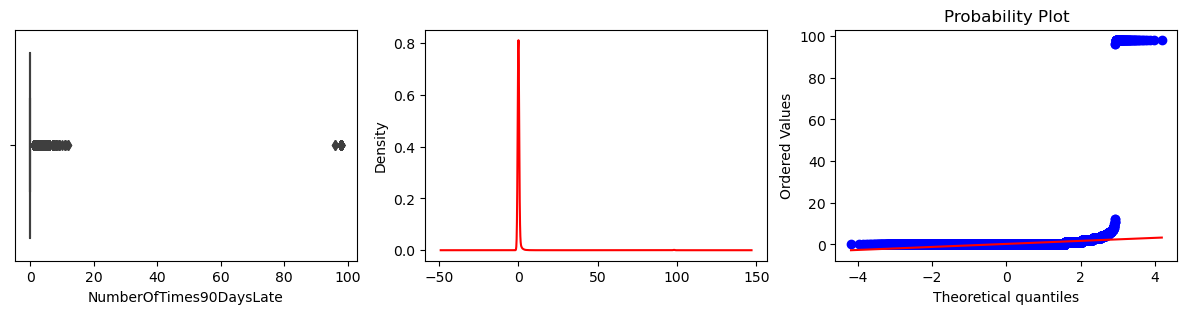

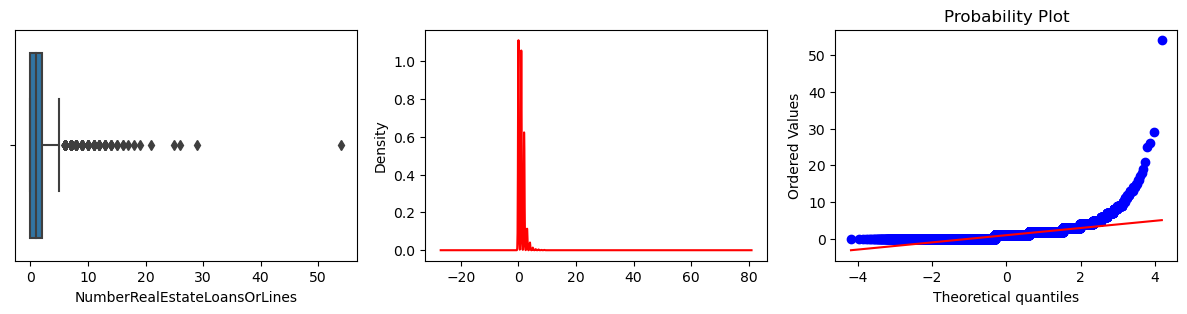

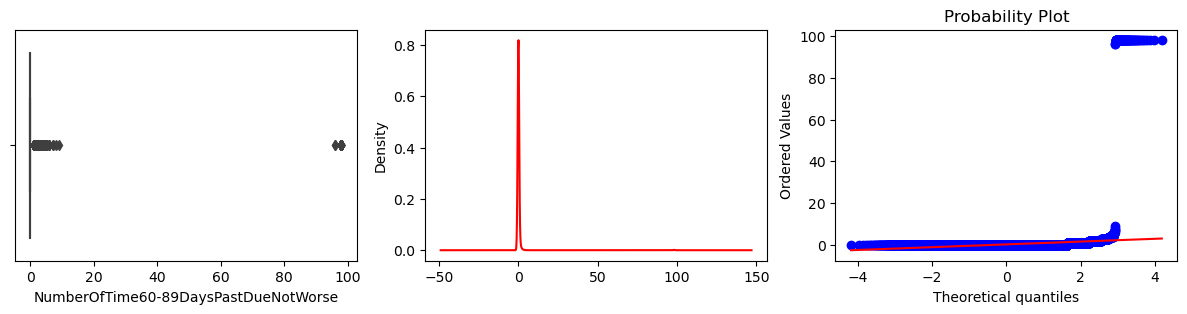

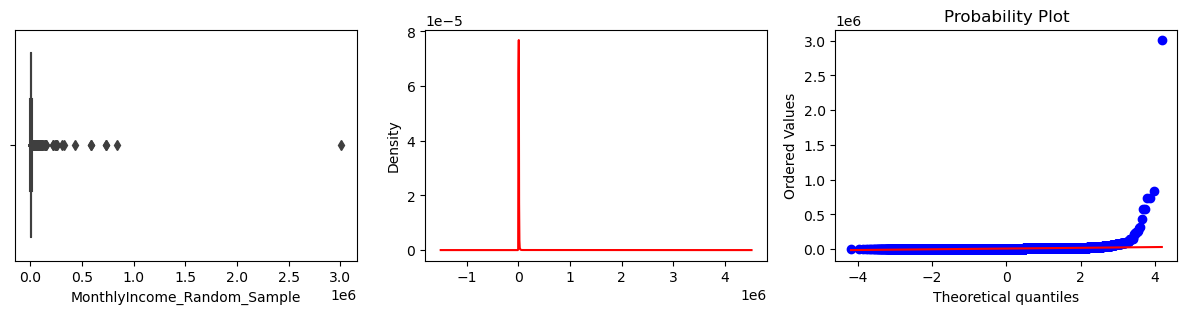

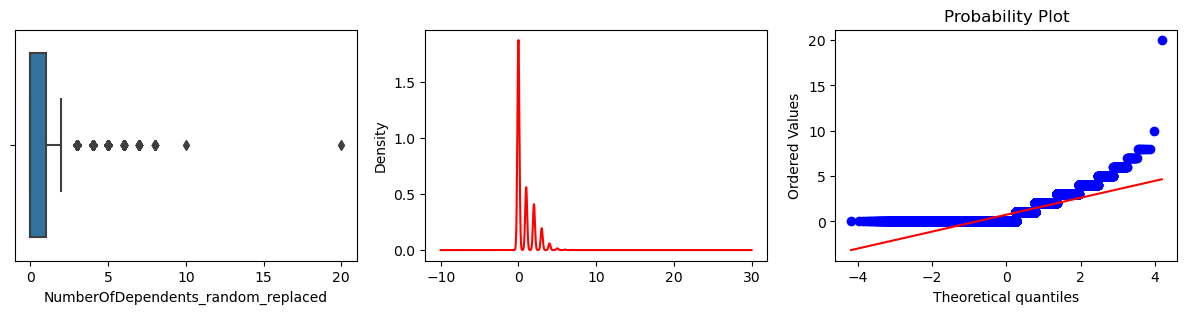

In [130]:
for i in Numeric_test_data.columns:
    plotting_graph(Numeric_test_data,i) #calling the function

#### Applying Yeo johnson tech

In [131]:
#create a function of graph

def plotting_graph_yeo4(Numeric_test_data,var) :
    plt.figure(figsize=(15,3))  #set figure size
    
    plt.subplot(1,3,1)    # it has 1 row, 3 figure, this is 1st figure
    sns.boxplot(x=Numeric_test_data[var+'_yeo_johnson'])
    
    plt.subplot(1,3,2)    # it has 1 row, 3 figure, this is 2nd figure
    (Numeric_test_data[var+'_yeo_johnson']).plot(kind='kde',color='r')
    
    plt.subplot(1,3,3)     # it has 1 row, 3 figure, this is 3rd figure
    stats.probplot(Numeric_test_data[var+'_yeo_johnson'],plot=plt)
    
    plt.show()

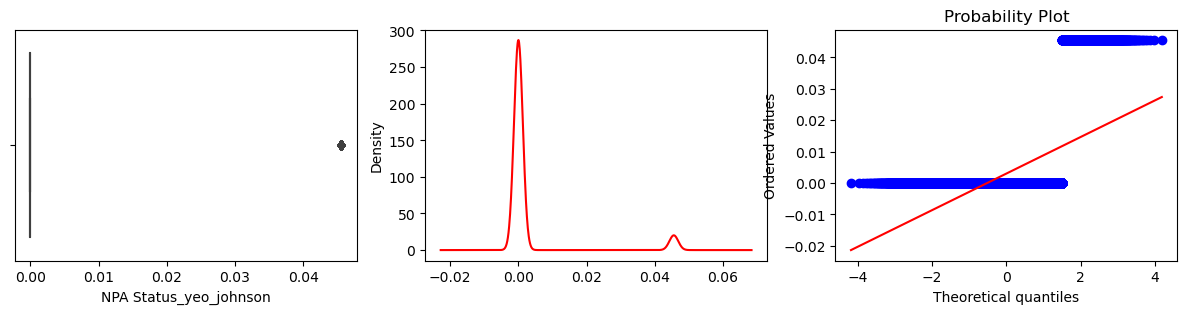

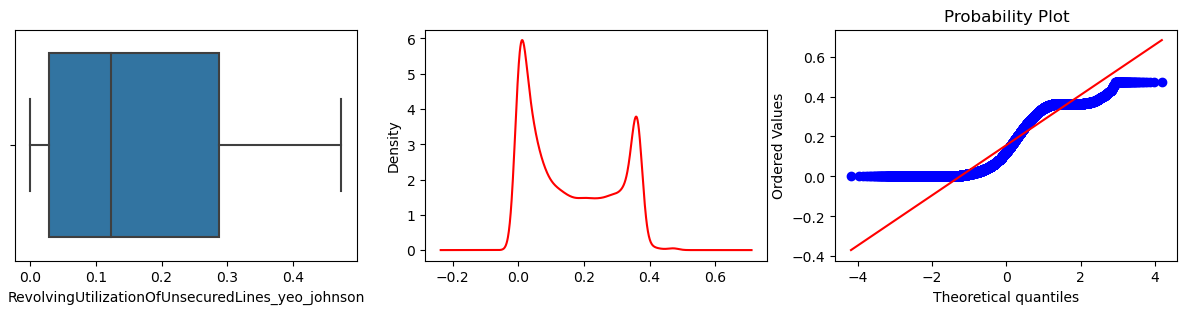

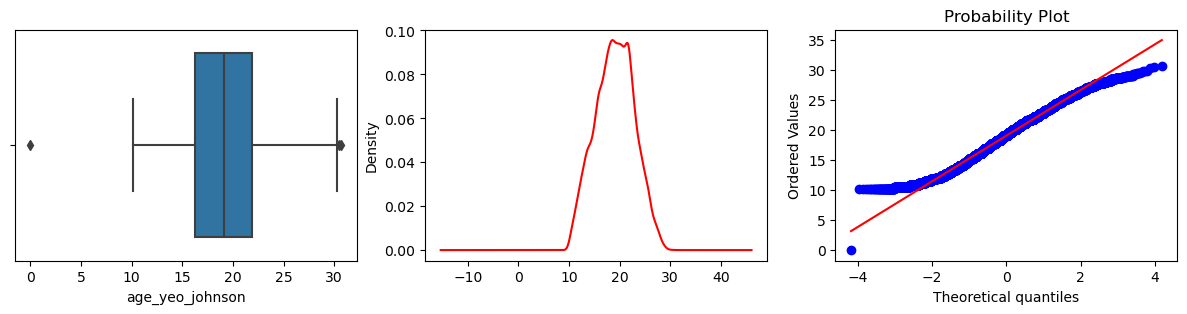

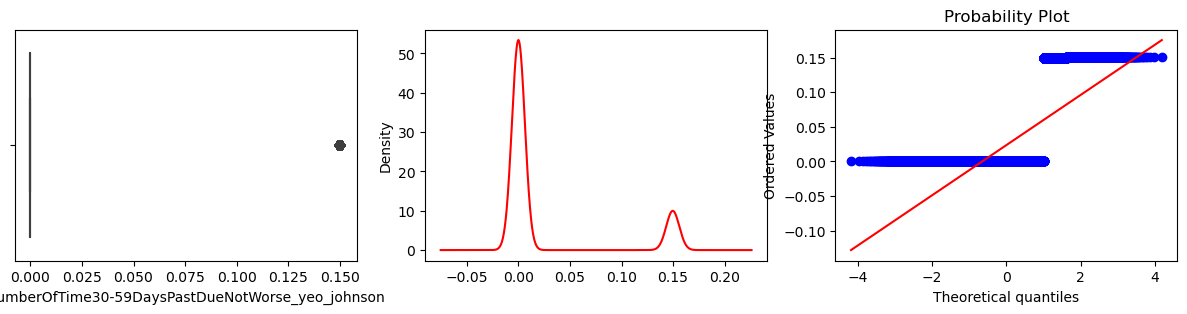

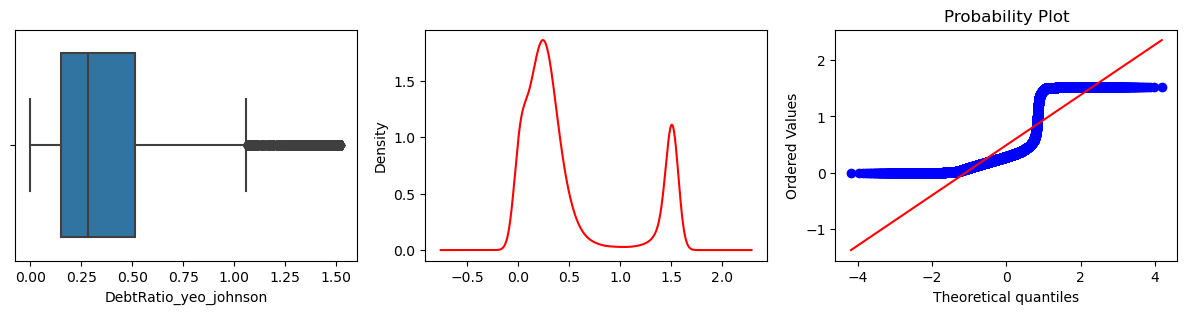

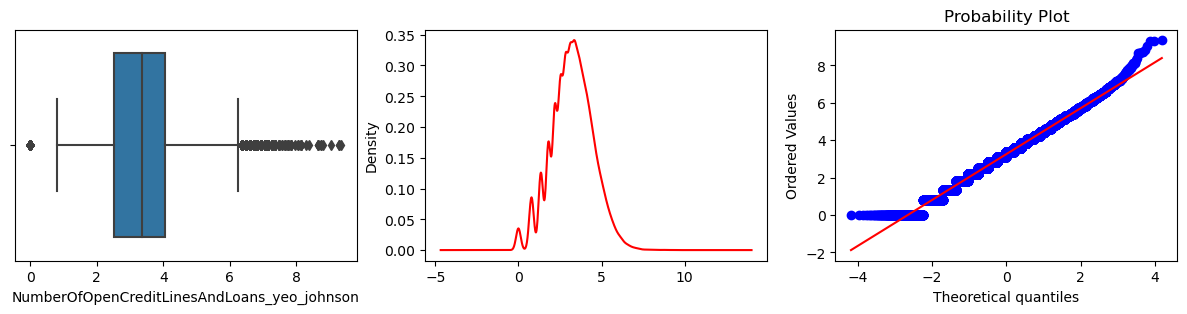

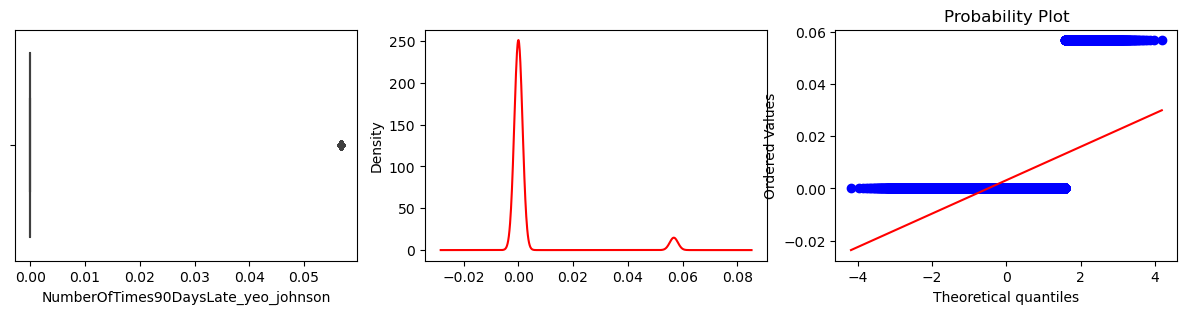

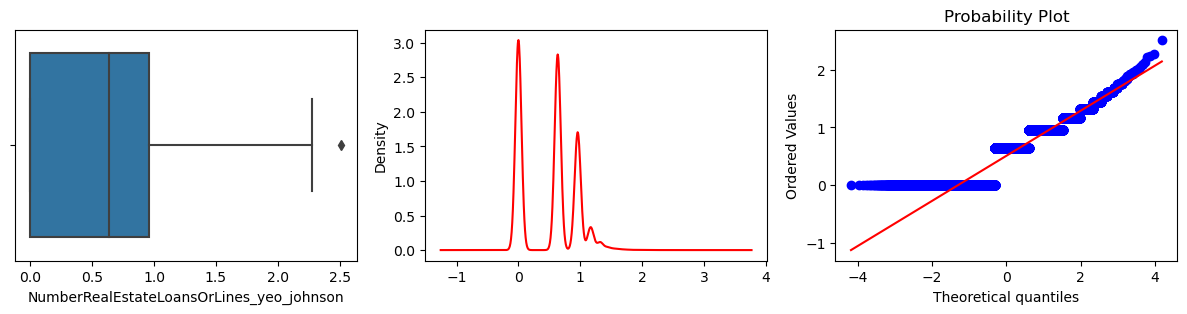

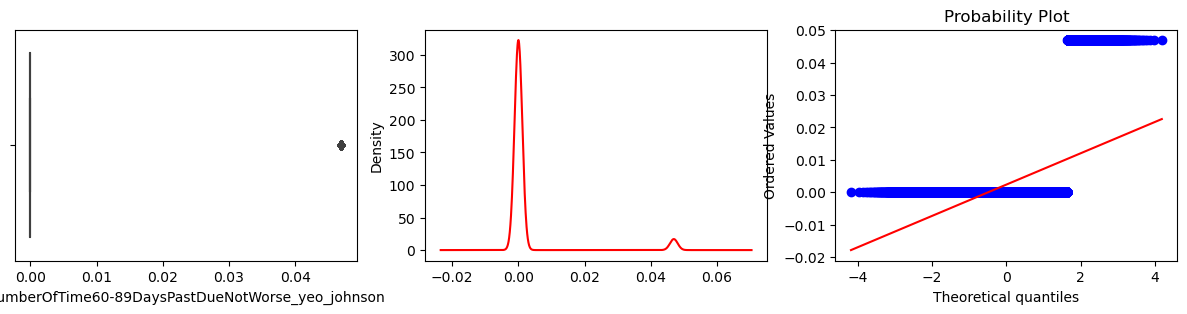

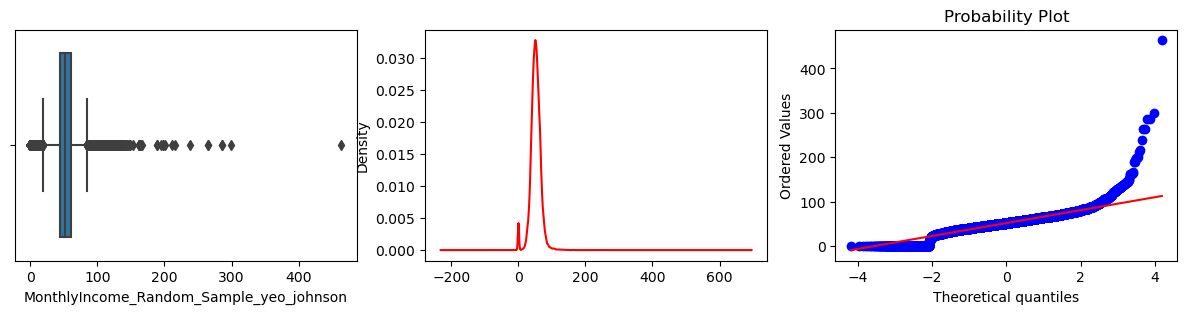

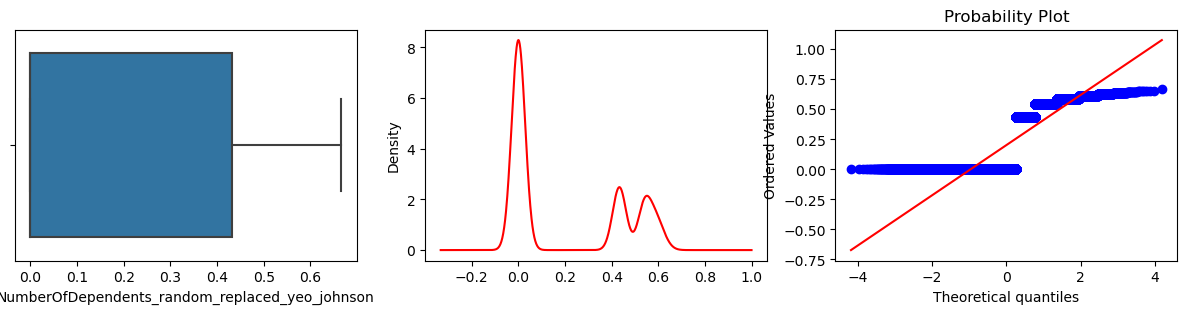

In [132]:
for i in Numeric_test_data.columns:
    Numeric_test_data[i+'_yeo_johnson'] , alpa = stats.yeojohnson(Numeric_test_data[i])
    
    plotting_graph_yeo4(Numeric_test_data , i)   #call the function
    

In [133]:
Numeric_test_data.columns     #checking column name

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_Random_Sample', 'NumberOfDependents_random_replaced',
       'NPA Status_yeo_johnson',
       'RevolvingUtilizationOfUnsecuredLines_yeo_johnson', 'age_yeo_johnson',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo_johnson',
       'DebtRatio_yeo_johnson', 'NumberOfOpenCreditLinesAndLoans_yeo_johnson',
       'NumberOfTimes90DaysLate_yeo_johnson',
       'NumberRealEstateLoansOrLines_yeo_johnson',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo_johnson',
       'MonthlyIncome_Random_Sample_yeo_johnson',
       'NumberOfDependents_random_replaced_yeo_johnson'],
      dtype='object')

In [134]:
#checking length
len(Numeric_test_data.columns)

22

In [135]:
#removing data columns and keep yeo johnson colmn
Numeric_test_data.drop(['NPA Status','RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_Random_Sample', 'NumberOfDependents_random_replaced'],axis=1,inplace=True)

In [136]:
Numeric_test_data.head() #checking first 5rows

NPA Status_yeo_johnson  \
59770                     -0.0   
21362                     -0.0   
127324                    -0.0   
140509                    -0.0   
144297                    -0.0   

        RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
59770                                           0.364014        13.018911   
21362                                          -0.000000        20.427890   
127324                                          0.034588        18.124880   
140509                                          0.366106        16.231604   
144297                                          0.365026        18.387534   

        NumberOfTime30-59DaysPastDueNotWorse_yeo_johnson  \
59770                                               -0.0   
21362                                               -0.0   
127324                                              -0.0   
140509                                              -0.0   
144297                                              -0.0   

        DebtRatio_yeo_johnson  NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
59770                1.398910                                     0.000000   
21362                0.127614                                     3.599695   
127324               0.198021                                     2.828028   
140509               0.143872                                     2.186167   
144297               1.517724                                     3.823382   

        NumberOfTimes90DaysLate_yeo_johnson  \
59770                                  -0.0   
21362                                  -0.0   
127324                                 -0.0   
140509                                 -0.0   
144297                                 -0.0   

        NumberRealEstateLoansOrLines_yeo_johnson  \
59770                                  -0.000000   
21362                                   0.635467   
127324                                  0.958430   
140509                                 -0.000000   
144297                                  0.635467   

        NumberOfTime60-89DaysPastDueNotWorse_yeo_johnson  \
59770                                               -0.0   
21362                                               -0.0   
127324                                              -0.0   
140509                                              -0.0   
144297                                              -0.0   

        MonthlyIncome_Random_Sample_yeo_johnson  \
59770                                 53.431457   
21362                                 58.682137   
127324                                53.553196   
140509                                50.010182   
144297                                52.411991   

        NumberOfDependents_random_replaced_yeo_johnson  
59770                                        -0.000000  
21362                                        -0.000000  
127324                                        0.587536  
140509                                       -0.000000  
144297                                       -0.000000

In [137]:
Numeric_test_data.shape   #checking the shape of data

(49500, 11)

# Removing outlier from Numeric train and test data

----working with Numeric_training_data

In [138]:
Numeric_training_data.columns

Index(['NPA Status_yeo_johnson',
       'RevolvingUtilizationOfUnsecuredLines_yeo_johnson', 'age_yeo_johnson',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo_johnson',
       'DebtRatio_yeo_johnson', 'NumberOfOpenCreditLinesAndLoans_yeo_johnson',
       'NumberOfTimes90DaysLate_yeo_johnson',
       'NumberRealEstateLoansOrLines_yeo_johnson',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo_johnson',
       'MonthlyIncome_Random_Sample_yeo_johnson',
       'NumberOfDependents_Random_Sample_yeo_johnson'],
      dtype='object')

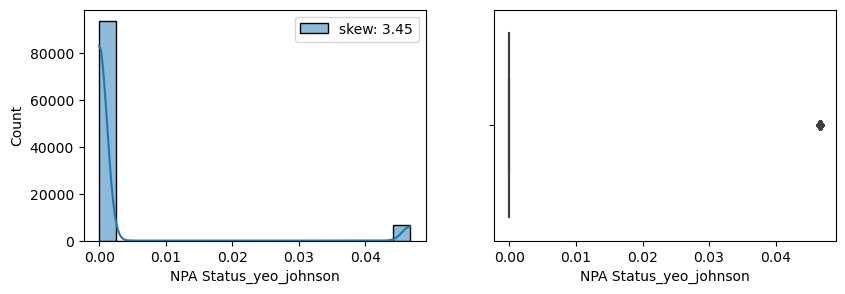

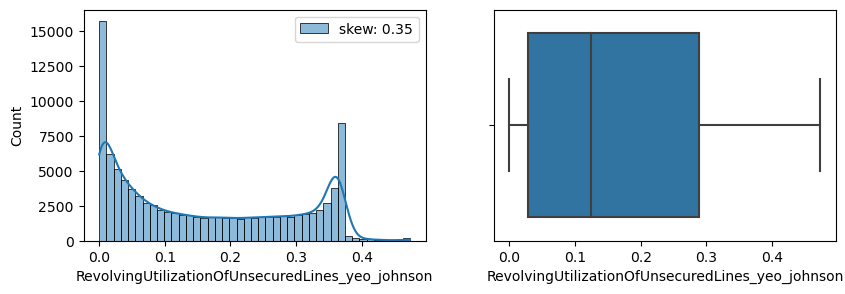

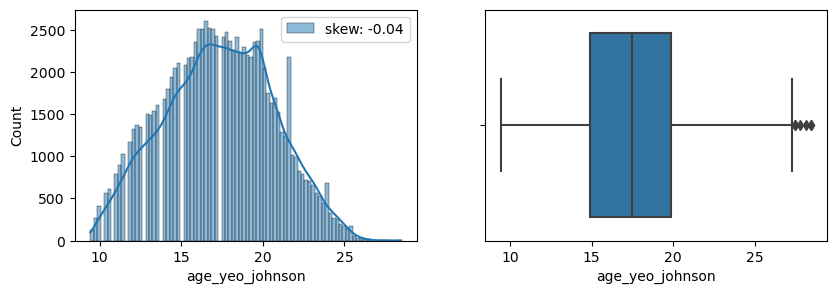

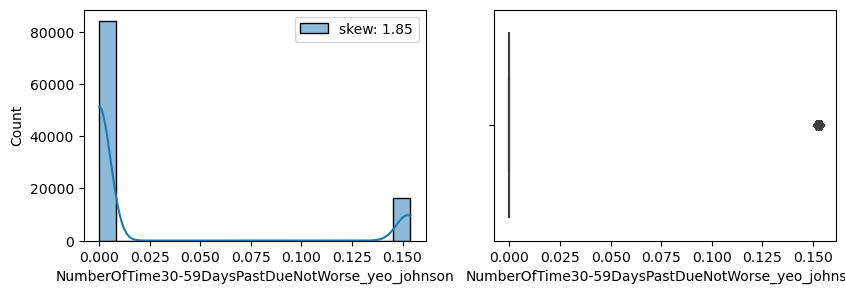

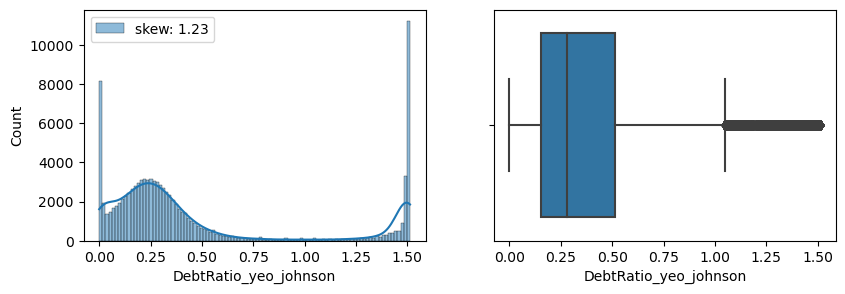

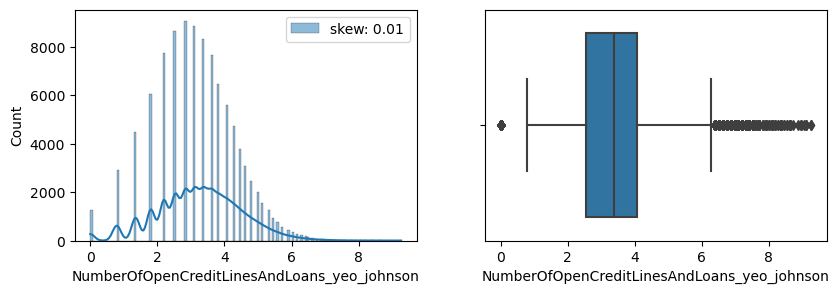

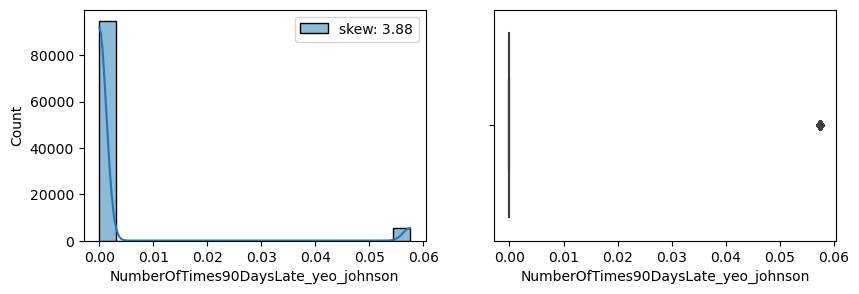

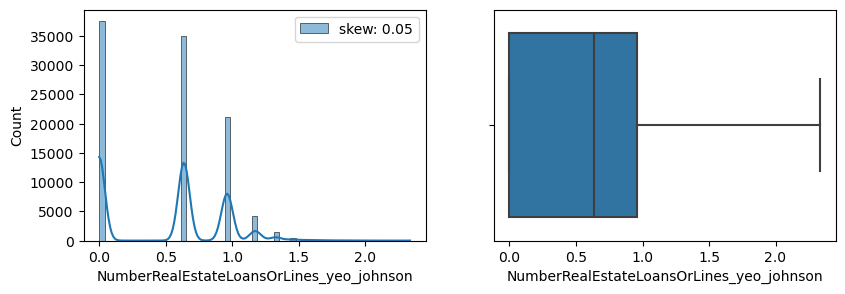

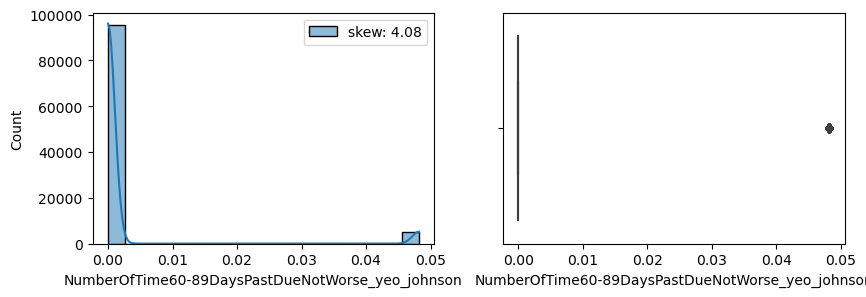

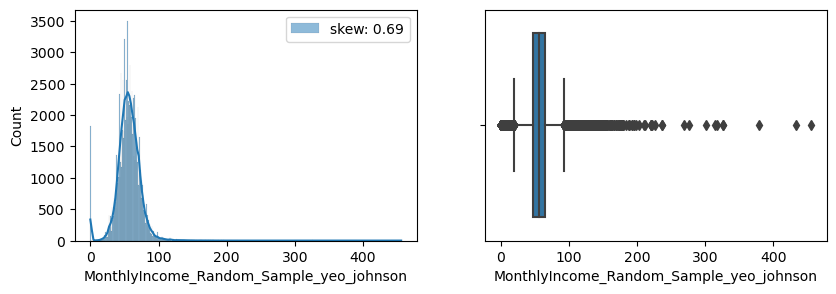

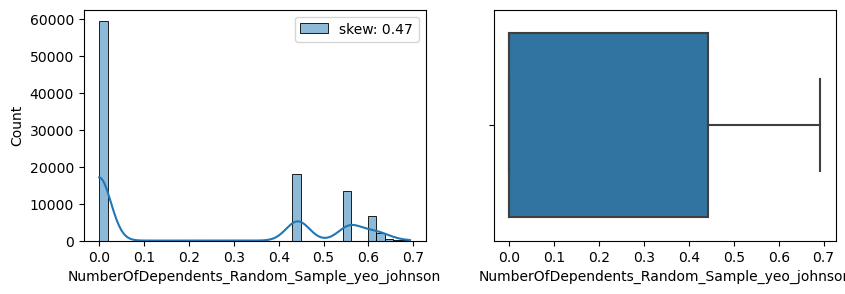

In [139]:
#creating hist plot and box plot to see skewness and outlier's for every column
for i in Numeric_training_data :
    
    plt.figure(figsize=(15,3))    #set figure size
    
    plt.subplot(131)
    sns.histplot(Numeric_training_data[i],kde=True, label="skew: " + str(np.round(Numeric_training_data[i].skew(),2)))
    plt.legend()
    
    plt.subplot(132)
    sns.boxplot(x=Numeric_training_data[i])
    plt.show
    

In [140]:
#copy data into another variable
Numeric_training_data_aro=Numeric_training_data.copy()

In [141]:
Numeric_training_data_aro.columns

Index(['NPA Status_yeo_johnson',
       'RevolvingUtilizationOfUnsecuredLines_yeo_johnson', 'age_yeo_johnson',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo_johnson',
       'DebtRatio_yeo_johnson', 'NumberOfOpenCreditLinesAndLoans_yeo_johnson',
       'NumberOfTimes90DaysLate_yeo_johnson',
       'NumberRealEstateLoansOrLines_yeo_johnson',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo_johnson',
       'MonthlyIncome_Random_Sample_yeo_johnson',
       'NumberOfDependents_Random_Sample_yeo_johnson'],
      dtype='object')

### ------- Using IQR and capping Method to remove outlier in train data

In [142]:
#creating a function for removing outlier
def iqr_capping(df,cols):
    
    for i in cols:
        q1 = Numeric_training_data[i].quantile(0.25)          #finding q1(25percentile) value by using its formula
        q3 = Numeric_training_data[i].quantile(0.75)           #finding q3(75th percentile) value by using its formula
    
        iqr = q3 - q1                     #finding iqr
        
        upper_whisker = q3 + (1.5*iqr)          
        lower_whisker = q1 - (1.5*iqr)
        
#after finding the value of upper nd lower whisher we use capping to detect outliers
        df[i] = np.where(Numeric_training_data[i]>upper_whisker, upper_whisker,
                 np.where(Numeric_training_data[i]<lower_whisker, lower_whisker, Numeric_training_data[i]))

In [143]:
iqr_capping(Numeric_training_data_aro,Numeric_training_data) #calling function
    

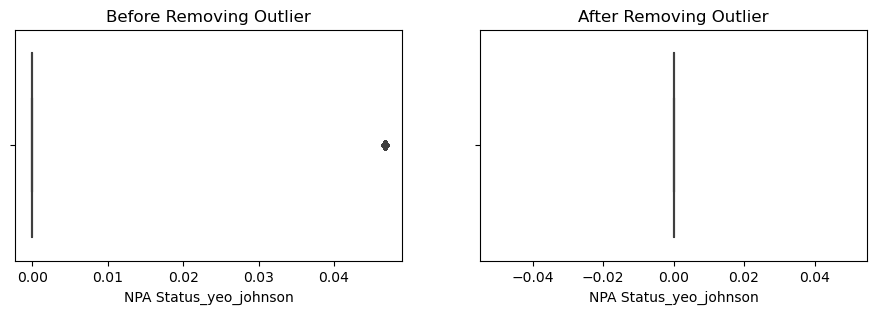

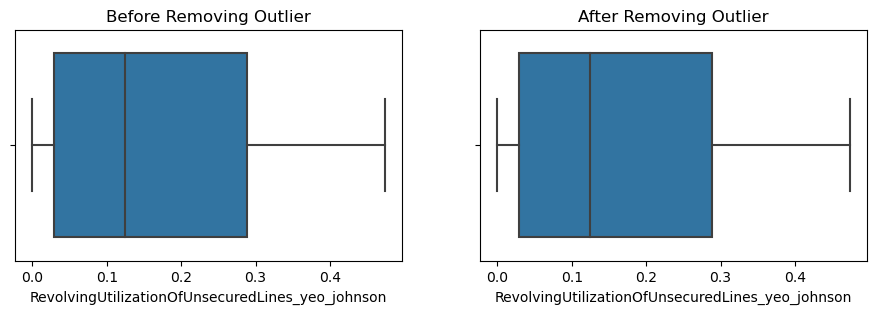

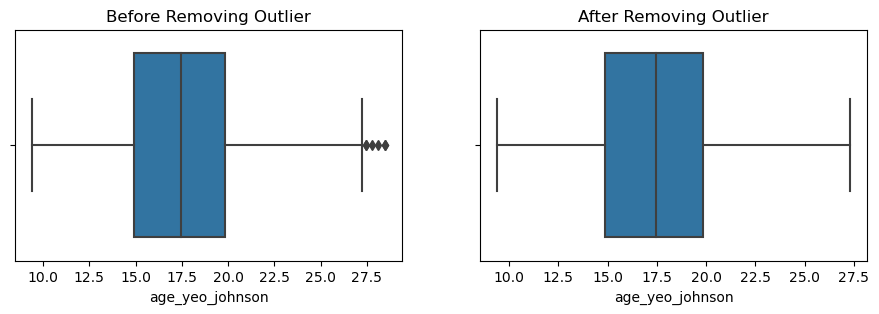

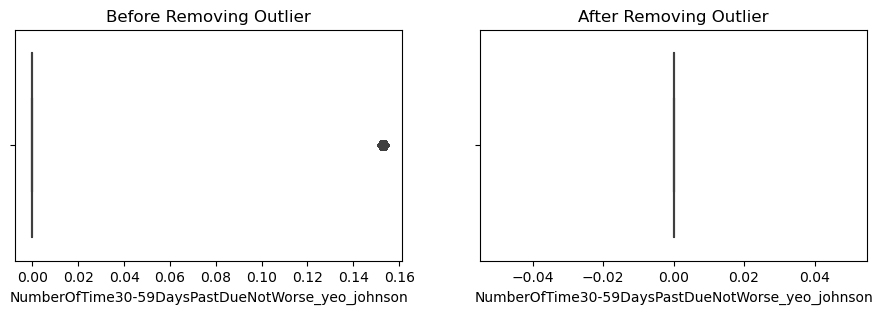

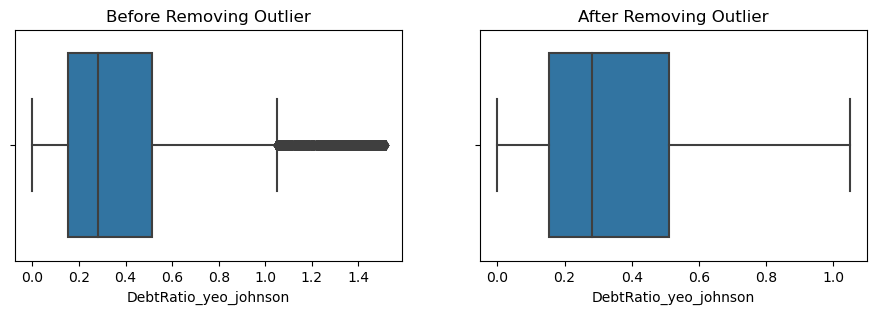

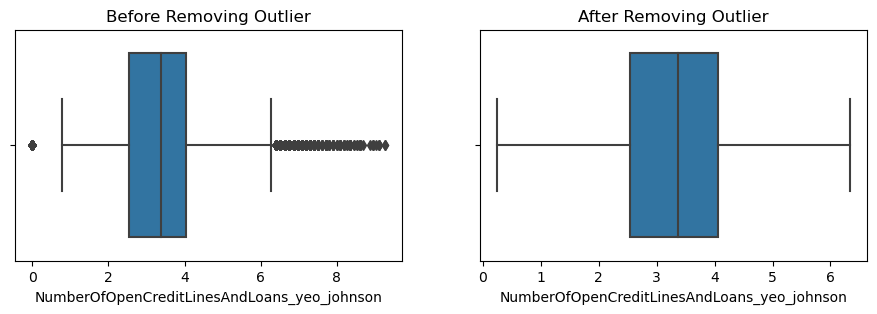

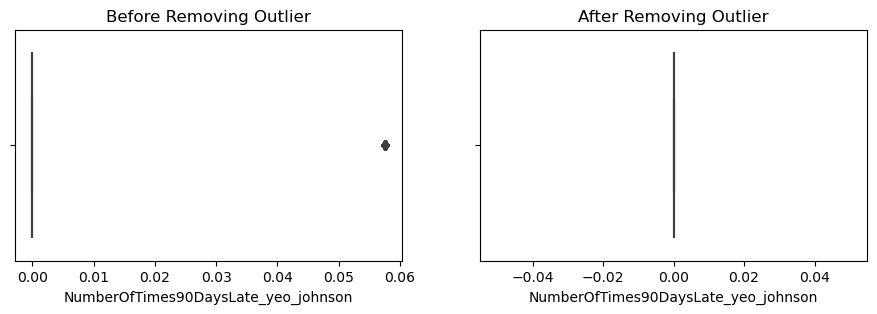

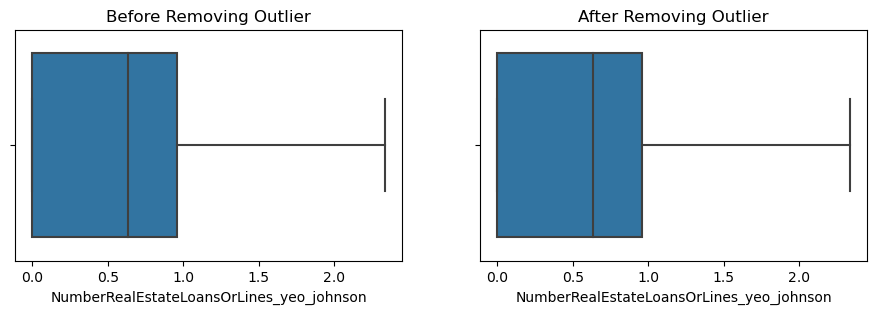

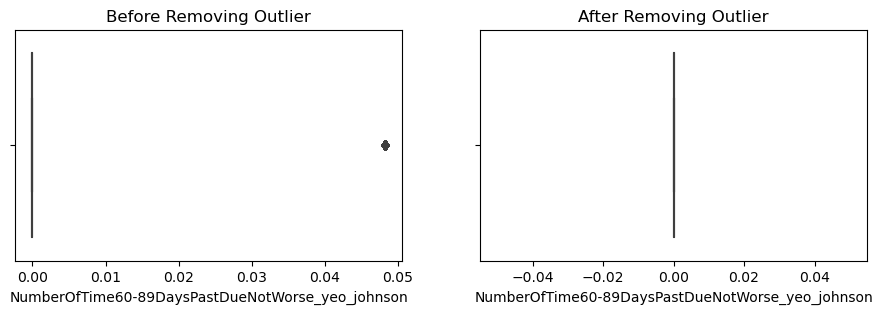

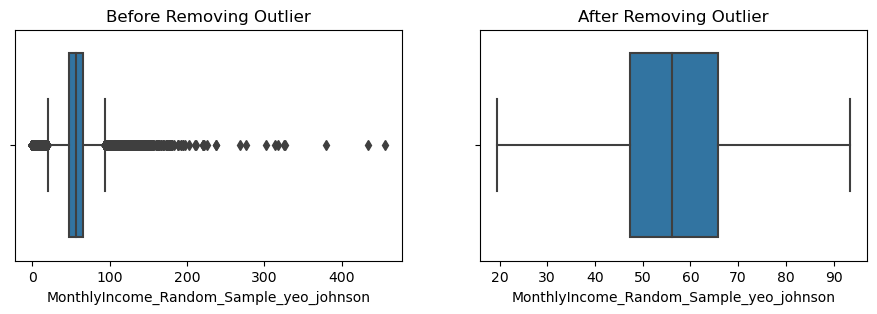

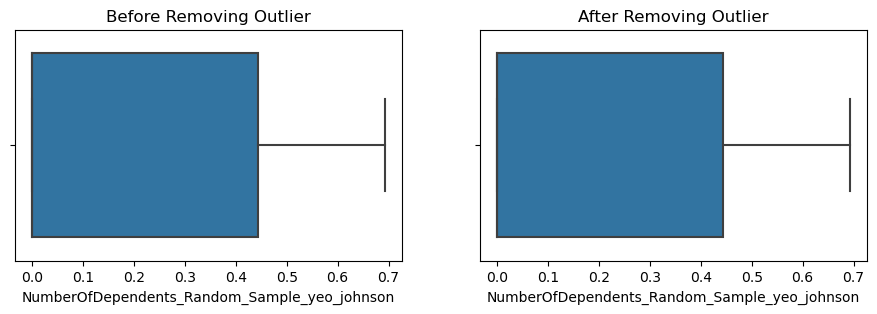

In [144]:
for i in Numeric_training_data :  #i iterate each column present in numeric training data
    
    plt.figure(figsize=(17,3))
    
    plt.subplot(131)
    sns.boxplot(x=Numeric_training_data[i])    #plotting boxplot before removing outlier
    plt.title("Before Removing Outlier")
               
    plt.subplot(132)
    sns.boxplot(x=Numeric_training_data_aro[i])    #plotting boxplot after removing outlier
    plt.title("After Removing Outlier")
    plt.show
    

In [145]:
#after removing outlier we see that in graph, there are some column whose features are unique

In [146]:
#save all unique feature in new variable
unique_feature= ['NPA Status_yeo_johnson','NumberOfTime30-59DaysPastDueNotWorse_yeo_johnson','NumberOfTimes90DaysLate_yeo_johnson',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo_johnson']

for i in unique_feature:         #i iterate feature name
    a=Numeric_training_data_aro[i].unique()    #find unique value and store in a variable
    print(a)    #print result

[-0.]
[-0.]
[-0.]
[-0.]


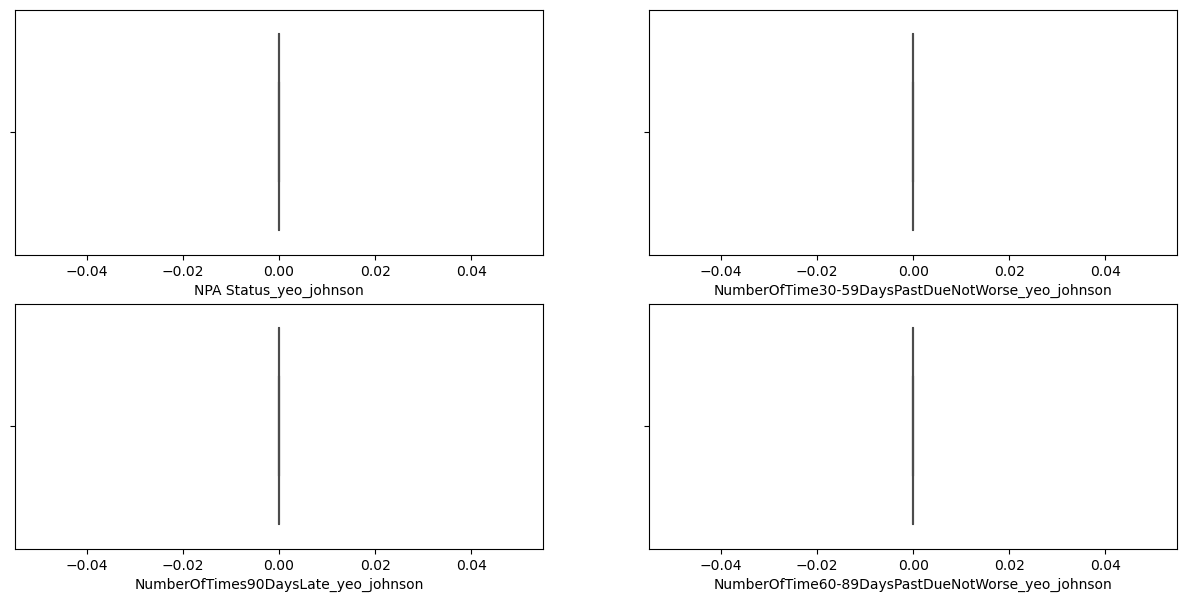

In [147]:
#visualize unique features
fig , ax = plt.subplots(2,2, figsize = (15,7))

for i , subplot in zip(unique_feature, ax.flatten()):
    sns.boxplot(x = Numeric_training_data_aro[i] , ax = subplot , color = 'r')


In [148]:
#removing these feature to data
Numeric_training_data_aro.drop(['NPA Status_yeo_johnson','NumberOfTime30-59DaysPastDueNotWorse_yeo_johnson','NumberOfTimes90DaysLate_yeo_johnson',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo_johnson'], axis=1, inplace=True)
Numeric_training_data_aro.head(2)

RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
87935                                          0.350057        19.218351   
3892                                           0.363958        13.121298   

       DebtRatio_yeo_johnson  NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
87935               1.048779                                     2.531923   
3892                0.056204                                     1.352347   

       NumberRealEstateLoansOrLines_yeo_johnson  \
87935                                      -0.0   
3892                                       -0.0   

       MonthlyIncome_Random_Sample_yeo_johnson  \
87935                                58.331105   
3892                                 51.690615   

       NumberOfDependents_Random_Sample_yeo_johnson  
87935                                          -0.0  
3892                                           -0.0

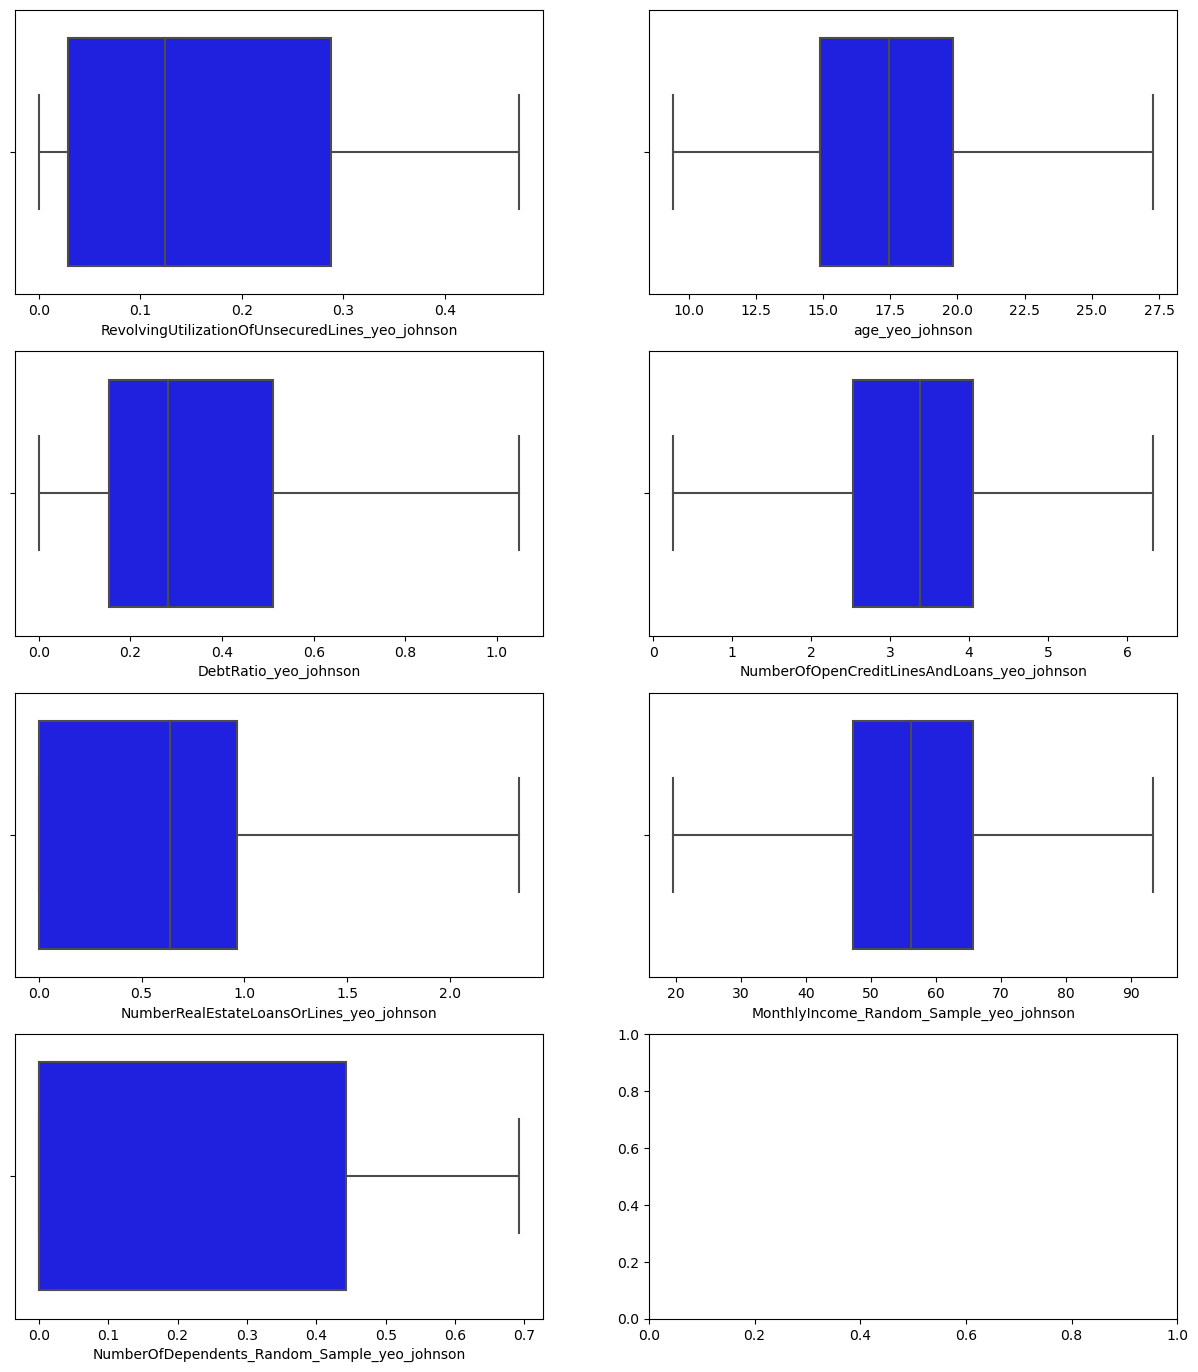

In [149]:
#visualize features after removing unique feature column
fig , ax = plt.subplots(4,2, figsize = (15,17))

for i , subplot in zip(Numeric_training_data_aro.columns, ax.flatten()):
    sns.boxplot(x = Numeric_training_data_aro[i] , ax = subplot , color = 'b')

In [150]:
Numeric_training_data_aro.shape   #checking shape of the data

(100500, 7)

Removed all outlier's in the training data

----working with Numeric_test data

In [151]:
Numeric_test_data.columns    #checking column names

Index(['NPA Status_yeo_johnson',
       'RevolvingUtilizationOfUnsecuredLines_yeo_johnson', 'age_yeo_johnson',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo_johnson',
       'DebtRatio_yeo_johnson', 'NumberOfOpenCreditLinesAndLoans_yeo_johnson',
       'NumberOfTimes90DaysLate_yeo_johnson',
       'NumberRealEstateLoansOrLines_yeo_johnson',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo_johnson',
       'MonthlyIncome_Random_Sample_yeo_johnson',
       'NumberOfDependents_random_replaced_yeo_johnson'],
      dtype='object')

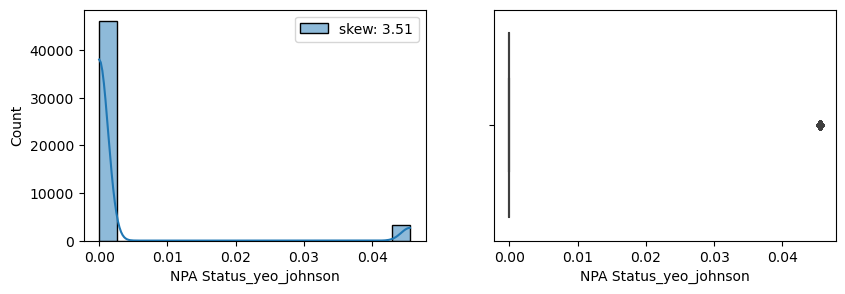

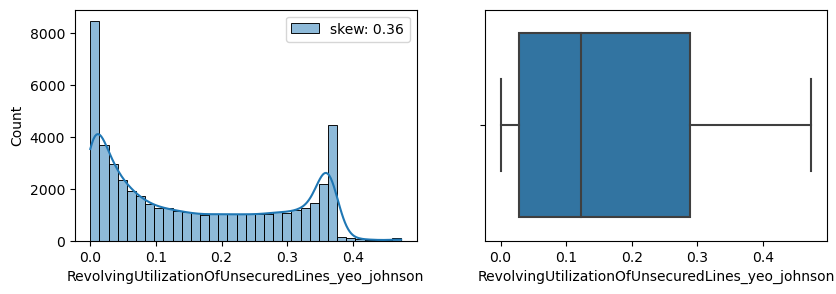

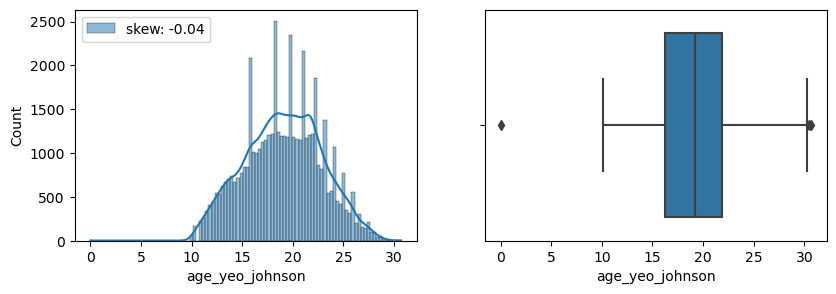

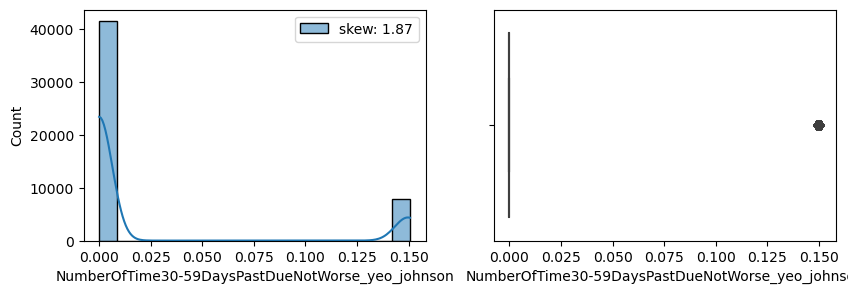

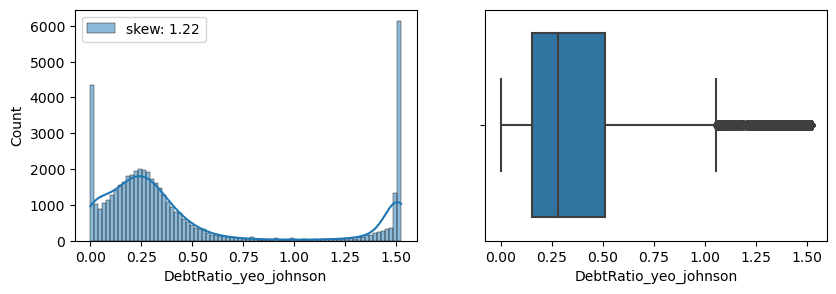

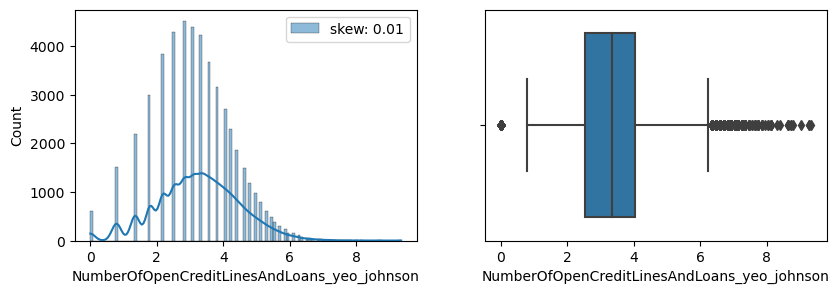

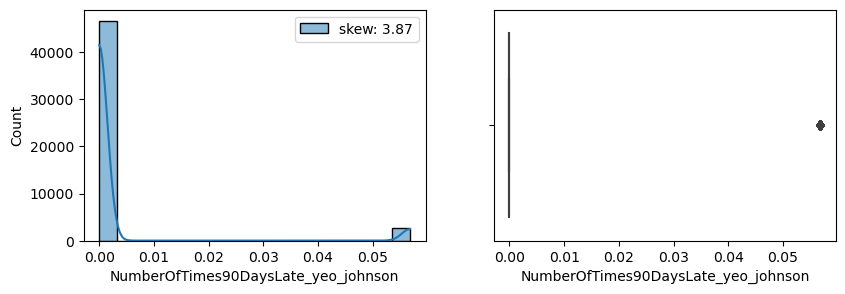

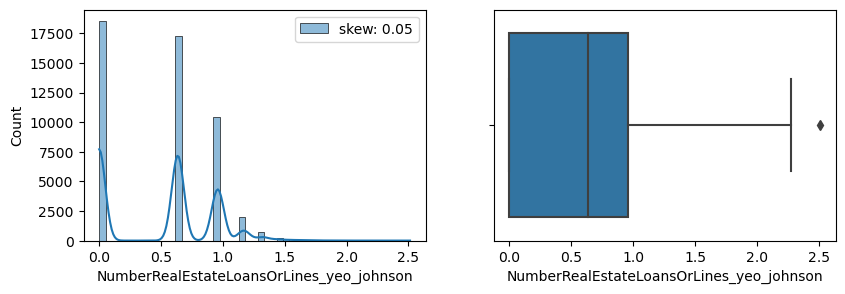

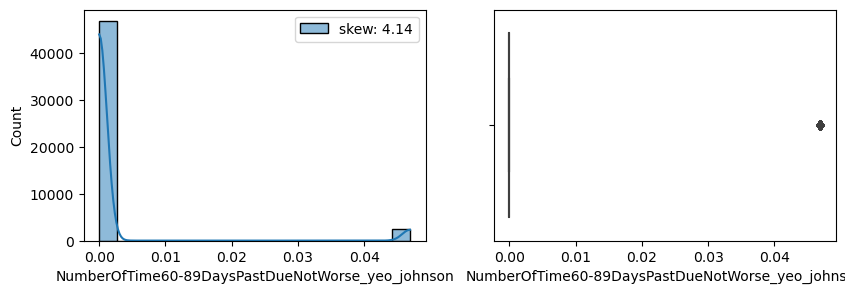

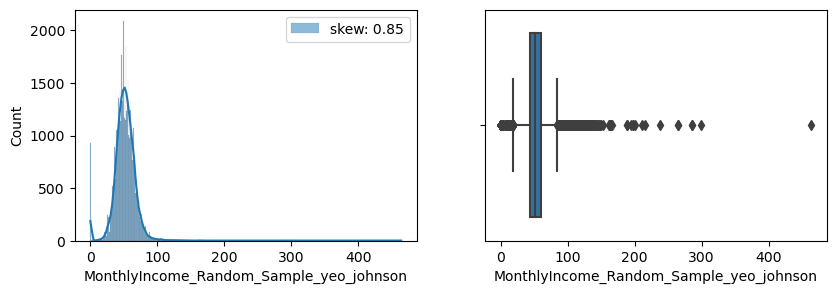

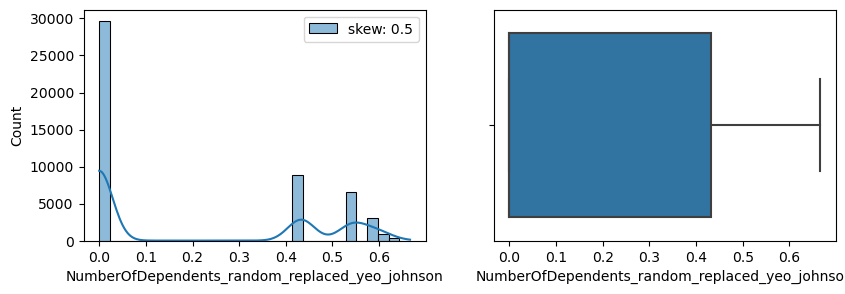

In [152]:
#creating a for loop for hist plot and box plot to see skewness and outlier's
for i in Numeric_test_data :
    
    plt.figure(figsize=(15,3))
    
    plt.subplot(131)
    sns.histplot(Numeric_test_data[i],kde=True, label="skew: " + str(np.round(Numeric_test_data[i].skew(),2)))
    plt.legend()
    
    plt.subplot(132)
    sns.boxplot(x=Numeric_test_data[i])
    plt.show
    

As per the graph, we clearly see that there are outlier present in the test data

In [153]:
#copy data into another variable
Numeric_test_data_aro=Numeric_test_data.copy()

In [154]:
Numeric_test_data_aro.columns

Index(['NPA Status_yeo_johnson',
       'RevolvingUtilizationOfUnsecuredLines_yeo_johnson', 'age_yeo_johnson',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo_johnson',
       'DebtRatio_yeo_johnson', 'NumberOfOpenCreditLinesAndLoans_yeo_johnson',
       'NumberOfTimes90DaysLate_yeo_johnson',
       'NumberRealEstateLoansOrLines_yeo_johnson',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo_johnson',
       'MonthlyIncome_Random_Sample_yeo_johnson',
       'NumberOfDependents_random_replaced_yeo_johnson'],
      dtype='object')

### ------- Using IQR and capping Method to remove outlier in train data

In [155]:
#creating a function for removing outlier
def iqr_capping1(df,cols):
    
    for i in cols:
        q1 = Numeric_test_data[i].quantile(0.25)          #finding q1(25percentile) value by using its formula
        q3 = Numeric_test_data[i].quantile(0.75)           #finding q3(75th percentile) value by using its formula
    
        iqr = q3 - q1                     #finding iqr
        
        upper_whisker = q3 + (1.5*iqr)          
        lower_whisker = q1 - (1.5*iqr)
        
#after finding the value of upper nd lower whisher we use capping to detect outliers
        df[i] = np.where(Numeric_test_data[i]>upper_whisker, upper_whisker,
                 np.where(Numeric_test_data[i]<lower_whisker, lower_whisker, Numeric_test_data[i]))

In [156]:
iqr_capping1(Numeric_test_data_aro,Numeric_test_data) #calling function
    

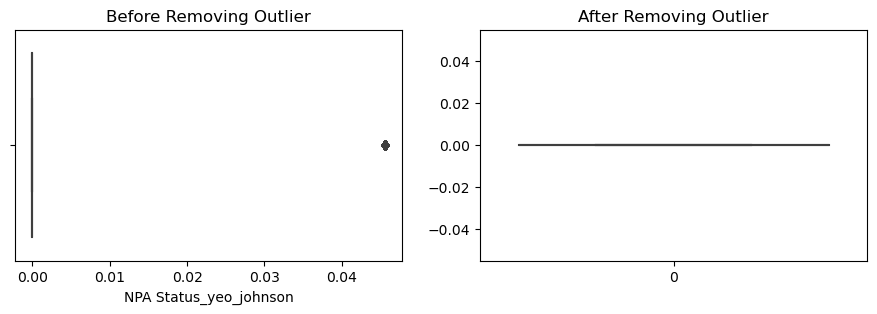

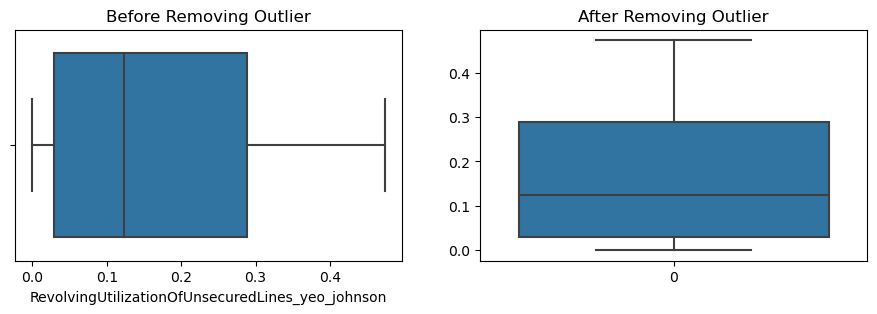

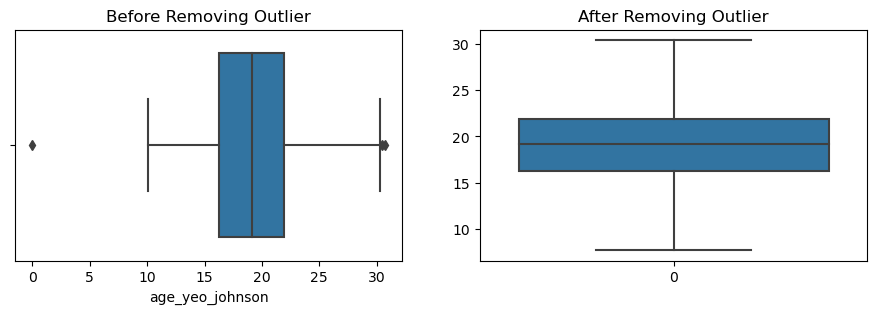

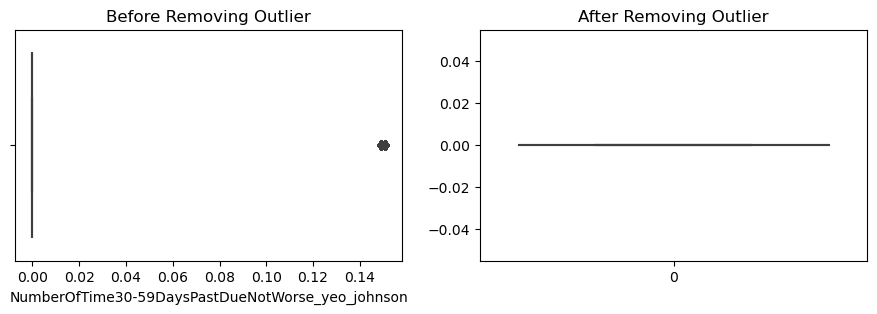

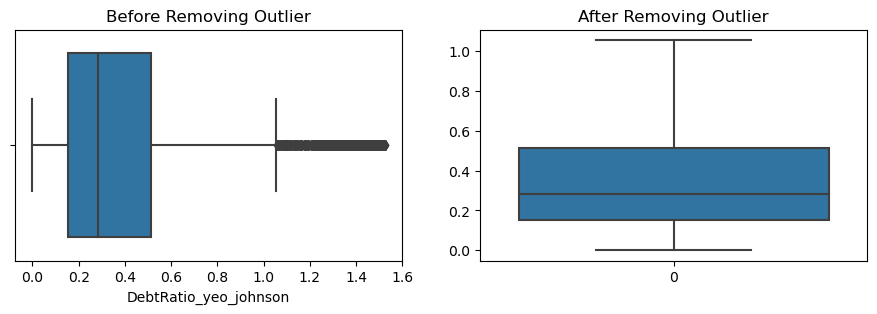

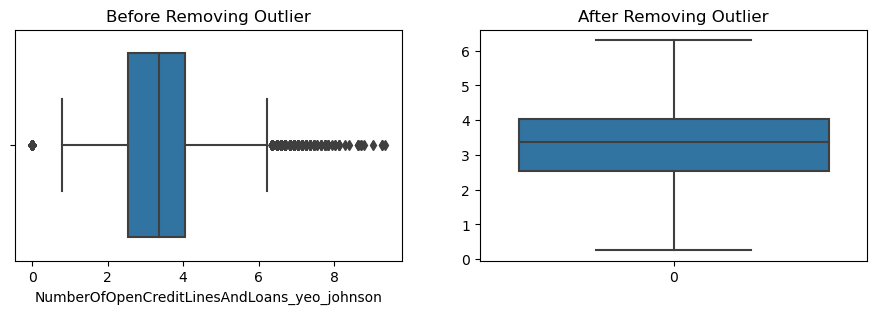

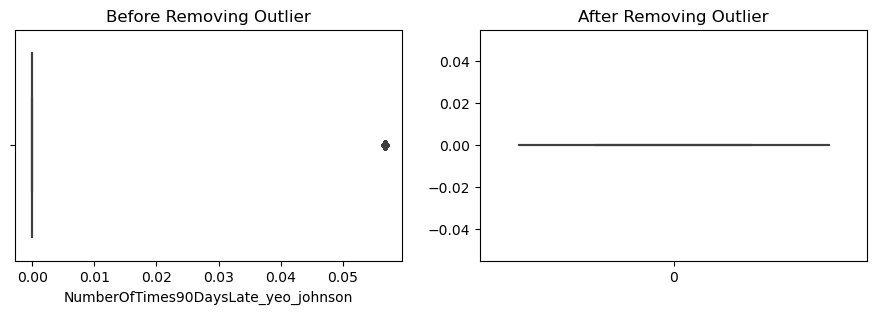

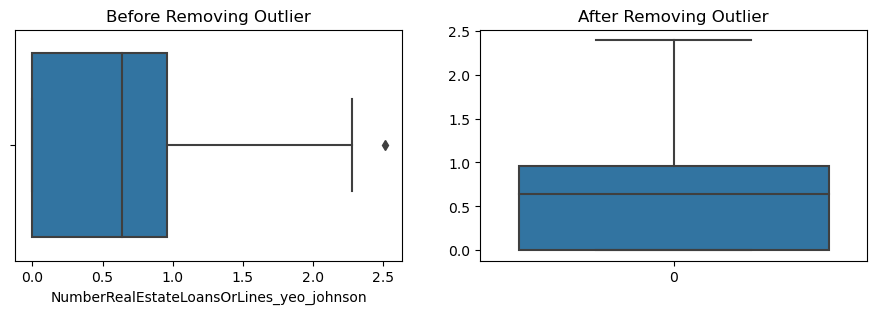

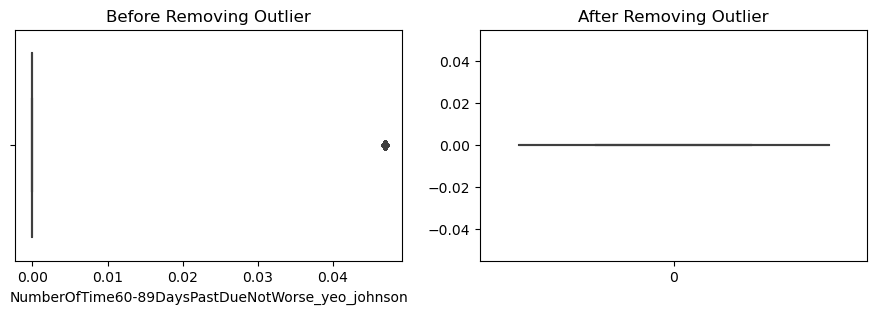

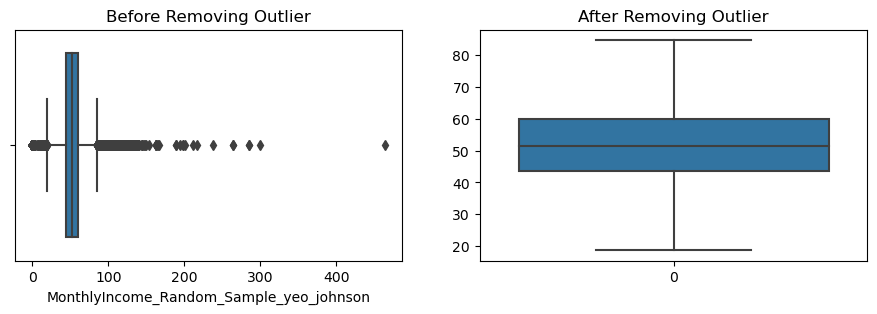

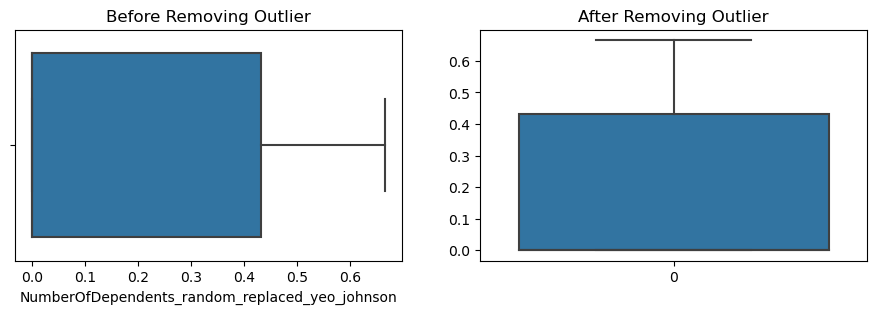

In [157]:
for i in Numeric_test_data :
    
    plt.figure(figsize=(17,3))
    
    plt.subplot(131)
    sns.boxplot(x=Numeric_test_data[i])
    plt.title("Before Removing Outlier")
               
    plt.subplot(132)
    sns.boxplot(Numeric_test_data_aro[i])
    plt.title("After Removing Outlier")
    plt.show
    

In [158]:
#removing unique feature column in the data, we did same in the training data
Numeric_test_data_aro.drop(['NPA Status_yeo_johnson','NumberOfTime30-59DaysPastDueNotWorse_yeo_johnson','NumberOfTimes90DaysLate_yeo_johnson',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo_johnson'], axis=1, inplace=True)
Numeric_test_data_aro.head(2)

RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
59770                                          0.364014        13.018911   
21362                                         -0.000000        20.427890   

       DebtRatio_yeo_johnson  NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
59770               1.055707                                     0.258870   
21362               0.127614                                     3.599695   

       NumberRealEstateLoansOrLines_yeo_johnson  \
59770                                 -0.000000   
21362                                  0.635467   

       MonthlyIncome_Random_Sample_yeo_johnson  \
59770                                53.431457   
21362                                58.682137   

       NumberOfDependents_random_replaced_yeo_johnson  
59770                                            -0.0  
21362                                            -0.0

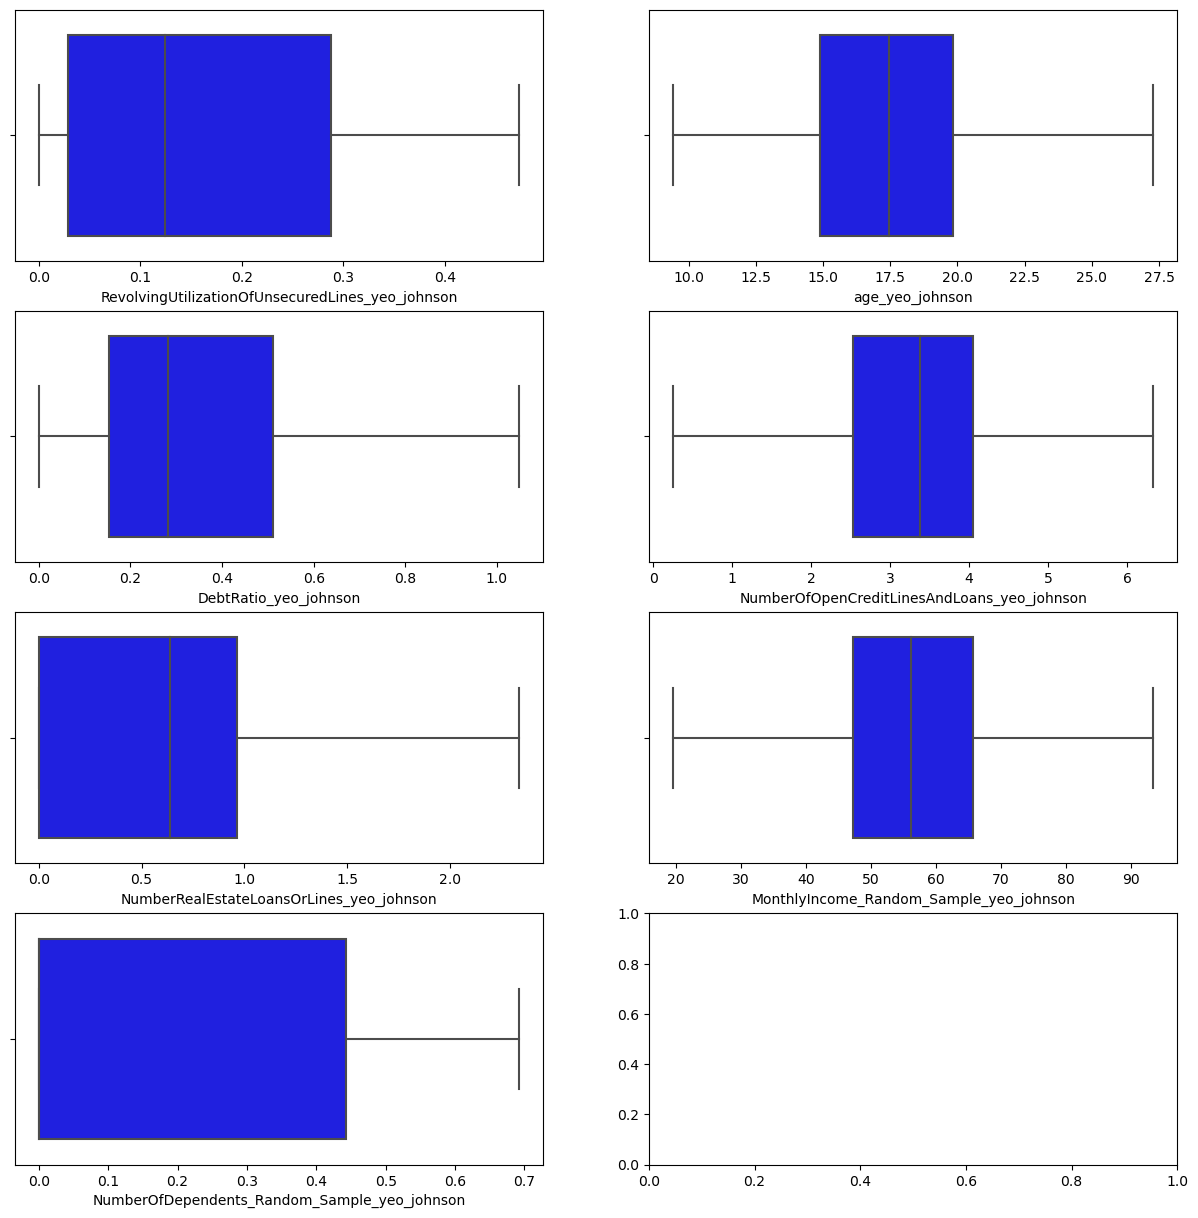

In [159]:
#visualize features after removing unique feature column
fig , ax = plt.subplots(4,2, figsize = (15,15))

for i , subplot in zip(Numeric_training_data_aro.columns, ax.flatten()):
    sns.boxplot(x = Numeric_training_data_aro[i] , ax = subplot , color = 'b')

In [160]:
Numeric_test_data_aro.shape          #checking shape

(49500, 7)

Removed all the outlier in test data

we filled null values and removed all the outlier in train and test Numeric data 

Now we perform same in categorical data

after that we concate both the numerical and categorical and perform feature scaling and feature selection


# Working with categorical column in train and test data

In [161]:
#checking null values in training data

In [162]:
training_data.columns         #checking columns name in training data

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'Good_Bad', 'MonthlyIncome_Random_Sample',
       'NumberOfDependents_Random_Sample'],
      dtype='object')

---working with train data categorical column

In [163]:
#selecting categorical column from the training data and store in a new variable
training_data_categorical=training_data.select_dtypes(include='object')
training_data_categorical.head(5)

Gender   Region Rented_OwnHouse   Occupation  Education Good_Bad
87935    Male  Central          Rented  Non-officer   Graduate     Good
3892   Female    South        Ownhouse     Self_Emp     Matric     Good
41404    Male    North        Ownhouse     Officer1  Post-Grad     Good
91124    Male  Central          Rented  Non-officer   Graduate     Good
67372    Male     West        Ownhouse     Self_Emp   Graduate      Bad

### checking null values in categorical column

In [164]:
training_data_categorical.isnull().sum()

Gender             0
Region             0
Rented_OwnHouse    0
Occupation         0
Education          0
Good_Bad           0
dtype: int64

there is no null values

### Converting categorical column to numerical

In [165]:
training_data_categorical.head()

Gender   Region Rented_OwnHouse   Occupation  Education Good_Bad
87935    Male  Central          Rented  Non-officer   Graduate     Good
3892   Female    South        Ownhouse     Self_Emp     Matric     Good
41404    Male    North        Ownhouse     Officer1  Post-Grad     Good
91124    Male  Central          Rented  Non-officer   Graduate     Good
67372    Male     West        Ownhouse     Self_Emp   Graduate      Bad

In [166]:
training_data_categorical['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [167]:
training_data_categorical['Region'].unique()

array(['Central', 'South', 'North', 'West', 'East'], dtype=object)

In [168]:
training_data_categorical['Rented_OwnHouse'].unique()

array(['Rented', 'Ownhouse'], dtype=object)

In [169]:
training_data_categorical['Occupation'].unique()

array(['Non-officer', 'Self_Emp', 'Officer1', 'Officer2', 'Officer3'],
      dtype=object)

In [170]:
training_data_categorical['Education'].unique()

array(['Graduate', 'Matric', 'Post-Grad', 'Professional', 'PhD'],
      dtype=object)

In [171]:
training_data_categorical['Good_Bad'].unique()

array(['Good', 'Bad'], dtype=object)

### -------perform One hot Encoding in Gender, Region and RentedHouse column in train data

In [172]:
#import libaray
from sklearn.preprocessing import OneHotEncoder

In [173]:
ohe=OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32)    #creating object
onehot=ohe.fit_transform(training_data_categorical[['Gender','Region','Rented_OwnHouse']])   #fit and transform the data , fit means it learn from the data
onehot         #OneHotEncoder give the result in the form of array

array([[1, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0],
       ...,
       [1, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 1]])

In [174]:
ohe.get_feature_names_out()          #extract feature name

array(['Gender_Male', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_OwnHouse_Rented'], dtype=object)

In [175]:
#converting array into dataframe and stored into new variable
onehotd=pd.DataFrame(onehot, index=training_data_categorical.index)
onehotd.head()

0  1  2  3  4  5
87935  1  0  0  0  0  1
3892   0  0  0  1  0  0
41404  1  0  1  0  0  0
91124  1  0  0  0  0  1
67372  1  0  0  0  1  0

In [176]:
onehotd.columns = ohe.get_feature_names_out()         #changing onehotd column name into chaned feature namee
onehotd.head()             #checking first 5 rows

Gender_Male  Region_East  Region_North  Region_South  Region_West  \
87935            1            0             0             0            0   
3892             0            0             0             1            0   
41404            1            0             1             0            0   
91124            1            0             0             0            0   
67372            1            0             0             0            1   

       Rented_OwnHouse_Rented  
87935                       1  
3892                        0  
41404                       0  
91124                       1  
67372                       0

In [177]:
#concat transform data into training_data_categorical
training_data_categorical=  pd.concat([training_data_categorical , onehotd],axis = 1)
training_data_categorical.head(2)

Gender   Region Rented_OwnHouse   Occupation Education Good_Bad  \
87935    Male  Central          Rented  Non-officer  Graduate     Good   
3892   Female    South        Ownhouse     Self_Emp    Matric     Good   

       Gender_Male  Region_East  Region_North  Region_South  Region_West  \
87935            1            0             0             0            0   
3892             0            0             0             1            0   

       Rented_OwnHouse_Rented  
87935                       1  
3892                        0

In [178]:
#droping previous categorical column
training_data_categorical.drop(['Gender','Region','Rented_OwnHouse'],axis=1,inplace=True)
training_data_categorical.head()      #checking first 5 rows

Occupation  Education Good_Bad  Gender_Male  Region_East  \
87935  Non-officer   Graduate     Good            1            0   
3892      Self_Emp     Matric     Good            0            0   
41404     Officer1  Post-Grad     Good            1            0   
91124  Non-officer   Graduate     Good            1            0   
67372     Self_Emp   Graduate      Bad            1            0   

       Region_North  Region_South  Region_West  Rented_OwnHouse_Rented  
87935             0             0            0                       1  
3892              0             1            0                       0  
41404             1             0            0                       0  
91124             0             0            0                       1  
67372             0             0            1                       0

### -----perform One hot Encoding in Gender, Region and RentedHouse column in test data

In [179]:
#checking columns in testing data
testing_data.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'Good_Bad', 'MonthlyIncome_Random_Sample',
       'NumberOfDependents_random_replaced'],
      dtype='object')

In [180]:
#extract categorical columns
testing_data_categorical=testing_data.select_dtypes(include='object')
testing_data_categorical.head(5)

Gender   Region Rented_OwnHouse   Occupation     Education Good_Bad
59770     Male  Central          Rented     Self_Emp  Professional     Good
21362   Female    North          Rented     Officer3     Post-Grad     Good
127324  Female     East          Rented     Officer1     Post-Grad     Good
140509    Male     West          Rented  Non-officer  Professional     Good
144297    Male     West          Rented     Officer2  Professional     Good

In [181]:
testing_data_categorical.isnull().sum()        #finding the sum of total null values

Gender             0
Region             0
Rented_OwnHouse    0
Occupation         0
Education          0
Good_Bad           0
dtype: int64

In [182]:
testing_data_categorical.shape             #finding the shape

(49500, 6)

In [183]:
#we already fit the data in training, so here we only fit the data
onehot1=ohe.transform(testing_data_categorical[['Gender','Region','Rented_OwnHouse']])
onehot1

array([[1, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 1, 1],
       [1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1]])

In [184]:
ohe.get_feature_names_out()          #extract feature name

array(['Gender_Male', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_OwnHouse_Rented'], dtype=object)

In [185]:
#converting array into dataframe and stored into new variable
onehotd1=pd.DataFrame(onehot1, index=testing_data_categorical.index)
onehotd1.columns = ohe.get_feature_names_out()         #changing onehotd column name into chaned feature name
onehotd1.head()

Gender_Male  Region_East  Region_North  Region_South  Region_West  \
59770             1            0             0             0            0   
21362             0            0             1             0            0   
127324            0            1             0             0            0   
140509            1            0             0             0            1   
144297            1            0             0             0            1   

        Rented_OwnHouse_Rented  
59770                        1  
21362                        1  
127324                       1  
140509                       1  
144297                       1

In [186]:
#concat transform data into testing_data_categorical
testing_data_categorical=  pd.concat([testing_data_categorical , onehotd1],axis = 1)
testing_data_categorical.head(2)

Gender   Region Rented_OwnHouse Occupation     Education Good_Bad  \
59770    Male  Central          Rented   Self_Emp  Professional     Good   
21362  Female    North          Rented   Officer3     Post-Grad     Good   

       Gender_Male  Region_East  Region_North  Region_South  Region_West  \
59770            1            0             0             0            0   
21362            0            0             1             0            0   

       Rented_OwnHouse_Rented  
59770                       1  
21362                       1

In [187]:
#droping categorical column
testing_data_categorical.drop(['Gender','Region','Rented_OwnHouse'],axis=1,inplace=True)
testing_data_categorical.head()       #check first 5 rows

Occupation     Education Good_Bad  Gender_Male  Region_East  \
59770      Self_Emp  Professional     Good            1            0   
21362      Officer3     Post-Grad     Good            0            0   
127324     Officer1     Post-Grad     Good            0            1   
140509  Non-officer  Professional     Good            1            0   
144297     Officer2  Professional     Good            1            0   

        Region_North  Region_South  Region_West  Rented_OwnHouse_Rented  
59770              0             0            0                       1  
21362              1             0            0                       1  
127324             0             0            0                       1  
140509             0             0            1                       1  
144297             0             0            1                       1

Conclusion
One hot encoding done both train and test

now we do ordinal encoding

### ----perform ordinal encoding in Education and occupation column in train data

In [188]:
#importing library
from sklearn.preprocessing import OrdinalEncoder

In [189]:
#creating object
Oe= OrdinalEncoder()
ord_en=Oe.fit_transform(training_data_categorical[['Occupation','Education']])  #fit and transform the data and save it in a new variable
ord_en   #it will give the result in array format

array([[0., 0.],
       [4., 1.],
       [1., 3.],
       ...,
       [1., 4.],
       [4., 4.],
       [4., 3.]])

In [190]:
Oe.get_feature_names_out()   #extract feature name

array(['Occupation', 'Education'], dtype=object)

In [191]:
#converting the array into dataframe
ord_en_d= pd.DataFrame(ord_en, index=training_data_categorical.index)
ord_en_d.head()

0    1
87935  0.0  0.0
3892   4.0  1.0
41404  1.0  3.0
91124  0.0  0.0
67372  4.0  0.0

In [192]:
#chnge column name
ord_en_d.columns= ['Occupation_new' , 'Education_new']
ord_en_d.head()

Occupation_new  Education_new
87935             0.0            0.0
3892              4.0            1.0
41404             1.0            3.0
91124             0.0            0.0
67372             4.0            0.0

In [193]:
#concate this to training_data_categorical
training_data_categorical= pd.concat([training_data_categorical,ord_en_d ],axis=1)
training_data_categorical.head()

Occupation  Education Good_Bad  Gender_Male  Region_East  \
87935  Non-officer   Graduate     Good            1            0   
3892      Self_Emp     Matric     Good            0            0   
41404     Officer1  Post-Grad     Good            1            0   
91124  Non-officer   Graduate     Good            1            0   
67372     Self_Emp   Graduate      Bad            1            0   

       Region_North  Region_South  Region_West  Rented_OwnHouse_Rented  \
87935             0             0            0                       1   
3892              0             1            0                       0   
41404             1             0            0                       0   
91124             0             0            0                       1   
67372             0             0            1                       0   

       Occupation_new  Education_new  
87935             0.0            0.0  
3892              4.0            1.0  
41404             1.0            3.0  
91124             0.0            0.0  
67372             4.0            0.0

In [194]:
#remove old column
training_data_categorical.drop(["Occupation","Education"],axis=1,inplace=True)
training_data_categorical.head()

Good_Bad  Gender_Male  Region_East  Region_North  Region_South  \
87935     Good            1            0             0             0   
3892      Good            0            0             0             1   
41404     Good            1            0             1             0   
91124     Good            1            0             0             0   
67372      Bad            1            0             0             0   

       Region_West  Rented_OwnHouse_Rented  Occupation_new  Education_new  
87935            0                       1             0.0            0.0  
3892             0                       0             4.0            1.0  
41404            0                       0             1.0            3.0  
91124            0                       1             0.0            0.0  
67372            1                       0             4.0            0.0

### ----perform ordinal encoding in Education and occupation column in test data

In [195]:
testing_data_categorical.head(2)   #see data

Occupation     Education Good_Bad  Gender_Male  Region_East  \
59770   Self_Emp  Professional     Good            1            0   
21362   Officer3     Post-Grad     Good            0            0   

       Region_North  Region_South  Region_West  Rented_OwnHouse_Rented  
59770             0             0            0                       1  
21362             1             0            0                       1

In [196]:
#fit and transform the data and save it in a new variable
ord_en2=Oe.transform(testing_data_categorical[['Occupation','Education']]) 
ord_en2

array([[4., 4.],
       [3., 3.],
       [1., 3.],
       ...,
       [0., 0.],
       [4., 4.],
       [4., 4.]])

In [197]:
Oe.get_feature_names_out()    #extract features name

array(['Occupation', 'Education'], dtype=object)

In [198]:
#converting the array into dataframe
ord_en_d2= pd.DataFrame(ord_en2, index=testing_data_categorical.index)
ord_en_d2.head()

0    1
59770   4.0  4.0
21362   3.0  3.0
127324  1.0  3.0
140509  0.0  4.0
144297  2.0  4.0

In [199]:
#chnge column name
ord_en_d2.columns= ['Occupation_new' , 'Education_new']

In [200]:
#concate this to training_data_categorical
testing_data_categorical= pd.concat([testing_data_categorical,ord_en_d2 ],axis=1)
testing_data_categorical.head()

Occupation     Education Good_Bad  Gender_Male  Region_East  \
59770      Self_Emp  Professional     Good            1            0   
21362      Officer3     Post-Grad     Good            0            0   
127324     Officer1     Post-Grad     Good            0            1   
140509  Non-officer  Professional     Good            1            0   
144297     Officer2  Professional     Good            1            0   

        Region_North  Region_South  Region_West  Rented_OwnHouse_Rented  \
59770              0             0            0                       1   
21362              1             0            0                       1   
127324             0             0            0                       1   
140509             0             0            1                       1   
144297             0             0            1                       1   

        Occupation_new  Education_new  
59770              4.0            4.0  
21362              3.0            3.0  
127324             1.0            3.0  
140509             0.0            4.0  
144297             2.0            4.0

In [201]:
#remove old column
testing_data_categorical.drop(["Occupation","Education"],axis=1,inplace=True)
testing_data_categorical.head()

Good_Bad  Gender_Male  Region_East  Region_North  Region_South  \
59770      Good            1            0             0             0   
21362      Good            0            0             1             0   
127324     Good            0            1             0             0   
140509     Good            1            0             0             0   
144297     Good            1            0             0             0   

        Region_West  Rented_OwnHouse_Rented  Occupation_new  Education_new  
59770             0                       1             4.0            4.0  
21362             0                       1             3.0            3.0  
127324            0                       1             1.0            3.0  
140509            1                       1             0.0            4.0  
144297            1                       1             2.0            4.0

we did onehotencoder and ordinal encoding in both train and test data

### ----perform label encoding in Good bad column in train data

In [202]:
training_data_categorical.head(2)      #see data

Good_Bad  Gender_Male  Region_East  Region_North  Region_South  \
87935     Good            1            0             0             0   
3892      Good            0            0             0             1   

       Region_West  Rented_OwnHouse_Rented  Occupation_new  Education_new  
87935            0                       1             0.0            0.0  
3892             0                       0             4.0            1.0

In [203]:
from sklearn.preprocessing import LabelEncoder

In [204]:
le=LabelEncoder() #creating object
Goodbadlr= le.fit_transform(training_data_categorical['Good_Bad'])   #it will give the result in the form of array
Goodbadlr2=pd.DataFrame(Goodbadlr, index=training_data_categorical.index)   #converting the array into dataframe
Goodbadlr2.head(2)

0
87935  1
3892   1

In [205]:
#change column name
Goodbadlr2.columns= ['Good_Bad_new']
Goodbadlr2.head(2)

Good_Bad_new
87935             1
3892              1

In [206]:
#add transform data into training data using concat function
training_data_categorical= pd.concat([training_data_categorical,Goodbadlr2 ],axis=1)
training_data_categorical.head()

Good_Bad  Gender_Male  Region_East  Region_North  Region_South  \
87935     Good            1            0             0             0   
3892      Good            0            0             0             1   
41404     Good            1            0             1             0   
91124     Good            1            0             0             0   
67372      Bad            1            0             0             0   

       Region_West  Rented_OwnHouse_Rented  Occupation_new  Education_new  \
87935            0                       1             0.0            0.0   
3892             0                       0             4.0            1.0   
41404            0                       0             1.0            3.0   
91124            0                       1             0.0            0.0   
67372            1                       0             4.0            0.0   

       Good_Bad_new  
87935             1  
3892              1  
41404             1  
91124             1  
67372             0

In [207]:
#dropping Good_Bad column and keep transform column
training_data_categorical.drop(['Good_Bad'],axis=1,inplace=True)

In [208]:
training_data_categorical.head(2)

Gender_Male  Region_East  Region_North  Region_South  Region_West  \
87935            1            0             0             0            0   
3892             0            0             0             1            0   

       Rented_OwnHouse_Rented  Occupation_new  Education_new  Good_Bad_new  
87935                       1             0.0            0.0             1  
3892                        0             4.0            1.0             1

### ----perform label encoding in Good bad column in test data

In [209]:
testing_data_categorical.head(2)   #see data

Good_Bad  Gender_Male  Region_East  Region_North  Region_South  \
59770     Good            1            0             0             0   
21362     Good            0            0             1             0   

       Region_West  Rented_OwnHouse_Rented  Occupation_new  Education_new  
59770            0                       1             4.0            4.0  
21362            0                       1             3.0            3.0

In [210]:
Goodbadlr1= le.transform(testing_data_categorical['Good_Bad'])   #it will give the result in the form of array
Goodbadlr3=pd.DataFrame(Goodbadlr1, index=testing_data_categorical.index) #converting the array into dataframe
Goodbadlr3.columns= ['Good_Bad_new']      #change column name
Goodbadlr3.head(2)

Good_Bad_new
59770             1
21362             1

In [211]:
#add transform data into training data using concat function
testing_data_categorical= pd.concat([testing_data_categorical,Goodbadlr3 ],axis=1)
testing_data_categorical.head()

Good_Bad  Gender_Male  Region_East  Region_North  Region_South  \
59770      Good            1            0             0             0   
21362      Good            0            0             1             0   
127324     Good            0            1             0             0   
140509     Good            1            0             0             0   
144297     Good            1            0             0             0   

        Region_West  Rented_OwnHouse_Rented  Occupation_new  Education_new  \
59770             0                       1             4.0            4.0   
21362             0                       1             3.0            3.0   
127324            0                       1             1.0            3.0   
140509            1                       1             0.0            4.0   
144297            1                       1             2.0            4.0   

        Good_Bad_new  
59770              1  
21362              1  
127324             1  
140509             1  
144297             1

In [212]:
#remove old column
testing_data_categorical.drop(["Good_Bad"],axis=1,inplace=True)
testing_data_categorical.head()

Gender_Male  Region_East  Region_North  Region_South  Region_West  \
59770             1            0             0             0            0   
21362             0            0             1             0            0   
127324            0            1             0             0            0   
140509            1            0             0             0            1   
144297            1            0             0             0            1   

        Rented_OwnHouse_Rented  Occupation_new  Education_new  Good_Bad_new  
59770                        1             4.0            4.0             1  
21362                        1             3.0            3.0             1  
127324                       1             1.0            3.0             1  
140509                       1             0.0            4.0             1  
144297                       1             2.0            4.0             1

### ----converting all categorical column to numerical

In [213]:
training_data_categorical.shape         #checking the shape

(100500, 9)

In [214]:
testing_data_categorical.shape

(49500, 9)

# Concat numeric and categorical data

----concat train data

In [215]:
#concat Numeric_training_data_aro into training_data_categorical and stored in a new variable 

In [216]:
Numeric_training_data_aro.head(2)      #see training numeric data

RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
87935                                          0.350057        19.218351   
3892                                           0.363958        13.121298   

       DebtRatio_yeo_johnson  NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
87935               1.048779                                     2.531923   
3892                0.056204                                     1.352347   

       NumberRealEstateLoansOrLines_yeo_johnson  \
87935                                      -0.0   
3892                                       -0.0   

       MonthlyIncome_Random_Sample_yeo_johnson  \
87935                                58.331105   
3892                                 51.690615   

       NumberOfDependents_Random_Sample_yeo_johnson  
87935                                          -0.0  
3892                                           -0.0

In [217]:
Numeric_training_data_aro.shape        #see numerical data shape

(100500, 7)

In [218]:
training_data_categorical.head(2)          #see training categorical data

Gender_Male  Region_East  Region_North  Region_South  Region_West  \
87935            1            0             0             0            0   
3892             0            0             0             1            0   

       Rented_OwnHouse_Rented  Occupation_new  Education_new  Good_Bad_new  
87935                       1             0.0            0.0             1  
3892                        0             4.0            1.0             1

In [219]:
training_data_categorical.shape    #see shape

(100500, 9)

In [220]:
#concat both 
final_train_data= pd.concat([Numeric_training_data_aro,training_data_categorical],axis=1)
final_train_data.head(2)

RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
87935                                          0.350057        19.218351   
3892                                           0.363958        13.121298   

       DebtRatio_yeo_johnson  NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
87935               1.048779                                     2.531923   
3892                0.056204                                     1.352347   

       NumberRealEstateLoansOrLines_yeo_johnson  \
87935                                      -0.0   
3892                                       -0.0   

       MonthlyIncome_Random_Sample_yeo_johnson  \
87935                                58.331105   
3892                                 51.690615   

       NumberOfDependents_Random_Sample_yeo_johnson  Gender_Male  Region_East  \
87935                                          -0.0            1            0   
3892                                           -0.0            0            0   

       Region_North  Region_South  Region_West  Rented_OwnHouse_Rented  \
87935             0             0            0                       1   
3892              0             1            0                       0   

       Occupation_new  Education_new  Good_Bad_new  
87935             0.0            0.0             1  
3892              4.0            1.0             1

In [221]:
final_train_data.shape          #checking shape of final train daTa

(100500, 16)

In [222]:
final_train_data.isnull().sum()                #checking null values in final train data

RevolvingUtilizationOfUnsecuredLines_yeo_johnson    0
age_yeo_johnson                                     0
DebtRatio_yeo_johnson                               0
NumberOfOpenCreditLinesAndLoans_yeo_johnson         0
NumberRealEstateLoansOrLines_yeo_johnson            0
MonthlyIncome_Random_Sample_yeo_johnson             0
NumberOfDependents_Random_Sample_yeo_johnson        0
Gender_Male                                         0
Region_East                                         0
Region_North                                        0
Region_South                                        0
Region_West                                         0
Rented_OwnHouse_Rented                              0
Occupation_new                                      0
Education_new                                       0
Good_Bad_new                                        0
dtype: int64

---concat test data

In [223]:
#concat Numeric_test_data_aro into testing_data_categorical and stored in a new variable 

In [224]:
Numeric_test_data_aro.head(2)      #see the numeric data

RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
59770                                          0.364014        13.018911   
21362                                         -0.000000        20.427890   

       DebtRatio_yeo_johnson  NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
59770               1.055707                                     0.258870   
21362               0.127614                                     3.599695   

       NumberRealEstateLoansOrLines_yeo_johnson  \
59770                                 -0.000000   
21362                                  0.635467   

       MonthlyIncome_Random_Sample_yeo_johnson  \
59770                                53.431457   
21362                                58.682137   

       NumberOfDependents_random_replaced_yeo_johnson  
59770                                            -0.0  
21362                                            -0.0

In [225]:
Numeric_test_data_aro.shape      #checking shape

(49500, 7)

In [226]:
testing_data_categorical.head(2)          #see categorical the data

Gender_Male  Region_East  Region_North  Region_South  Region_West  \
59770            1            0             0             0            0   
21362            0            0             1             0            0   

       Rented_OwnHouse_Rented  Occupation_new  Education_new  Good_Bad_new  
59770                       1             4.0            4.0             1  
21362                       1             3.0            3.0             1

In [227]:
testing_data_categorical.shape

(49500, 9)

In [228]:
final_test_data= pd.concat([Numeric_test_data_aro,testing_data_categorical],axis=1)  #concate both data
final_test_data.head(2)

RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
59770                                          0.364014        13.018911   
21362                                         -0.000000        20.427890   

       DebtRatio_yeo_johnson  NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
59770               1.055707                                     0.258870   
21362               0.127614                                     3.599695   

       NumberRealEstateLoansOrLines_yeo_johnson  \
59770                                 -0.000000   
21362                                  0.635467   

       MonthlyIncome_Random_Sample_yeo_johnson  \
59770                                53.431457   
21362                                58.682137   

       NumberOfDependents_random_replaced_yeo_johnson  Gender_Male  \
59770                                            -0.0            1   
21362                                            -0.0            0   

       Region_East  Region_North  Region_South  Region_West  \
59770            0             0             0            0   
21362            0             1             0            0   

       Rented_OwnHouse_Rented  Occupation_new  Education_new  Good_Bad_new  
59770                       1             4.0            4.0             1  
21362                       1             3.0            3.0             1

In [229]:
final_test_data.shape        #checking shape of data

(49500, 16)

In [230]:
final_test_data.isnull().sum()   #checking null values

RevolvingUtilizationOfUnsecuredLines_yeo_johnson    0
age_yeo_johnson                                     0
DebtRatio_yeo_johnson                               0
NumberOfOpenCreditLinesAndLoans_yeo_johnson         0
NumberRealEstateLoansOrLines_yeo_johnson            0
MonthlyIncome_Random_Sample_yeo_johnson             0
NumberOfDependents_random_replaced_yeo_johnson      0
Gender_Male                                         0
Region_East                                         0
Region_North                                        0
Region_South                                        0
Region_West                                         0
Rented_OwnHouse_Rented                              0
Occupation_new                                      0
Education_new                                       0
Good_Bad_new                                        0
dtype: int64

# Feature Scaling

---use standarization in train data

### -- Standar Scaler in train data

In [231]:
#before doing standarization we split the data into x and y train

In [232]:
final_train_data.head(2)   #seeing two rows

RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
87935                                          0.350057        19.218351   
3892                                           0.363958        13.121298   

       DebtRatio_yeo_johnson  NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
87935               1.048779                                     2.531923   
3892                0.056204                                     1.352347   

       NumberRealEstateLoansOrLines_yeo_johnson  \
87935                                      -0.0   
3892                                       -0.0   

       MonthlyIncome_Random_Sample_yeo_johnson  \
87935                                58.331105   
3892                                 51.690615   

       NumberOfDependents_Random_Sample_yeo_johnson  Gender_Male  Region_East  \
87935                                          -0.0            1            0   
3892                                           -0.0            0            0   

       Region_North  Region_South  Region_West  Rented_OwnHouse_Rented  \
87935             0             0            0                       1   
3892              0             1            0                       0   

       Occupation_new  Education_new  Good_Bad_new  
87935             0.0            0.0             1  
3892              4.0            1.0             1

In [233]:
#we split the data because we do not perform scaing on dependent variable
x_train = final_train_data.drop(['Good_Bad_new'],axis=1)  #(independent column)
y_train = final_train_data['Good_Bad_new']   #(dependent column)

In [234]:
len(x_train), len(y_train)     #checking length

(100500, 100500)

-----perform standarization scaling in train test

In [235]:
#importing library for standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  #creating object
sc.fit(x_train)        #fit the scaler to the train test, it will learn parameter

StandardScaler()

In [236]:
x_train_scaled= sc.transform(x_train)            #transform train datta
x_train_scaled            #it will return the value so we create a data frame to see the data

array([[ 1.44137253,  0.55620955,  1.81374791, ...,  1.15825977,
        -1.35856924, -1.4016309 ],
       [ 1.54521641, -1.26940736, -0.97716512, ..., -0.86336418,
         0.98524912, -0.79085479],
       [ 1.54521641, -2.01549273, -0.75185535, ..., -0.86336418,
        -0.77261465,  0.43069744],
       ...,
       [-0.71005598, -0.17097729,  0.09183983, ...,  1.15825977,
        -0.77261465,  1.04147355],
       [ 0.03782308, -1.11392302, -1.06547735, ...,  1.15825977,
         0.98524912,  1.04147355],
       [-0.00950685,  0.68292317, -0.86306362, ...,  1.15825977,
         0.98524912,  0.43069744]])

In [237]:
x_train_final= pd.DataFrame(x_train_scaled,columns=x_train.columns)     #creating a data frame
x_train_final.head()

RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
0                                          1.441373         0.556210   
1                                          1.545216        -1.269407   
2                                          1.545216        -2.015493   
3                                          0.397967         0.492267   
4                                          1.545216         0.166326   

   DebtRatio_yeo_johnson  NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
0               1.813748                                    -0.608777   
1              -0.977165                                    -1.578707   
2              -0.751855                                    -1.578707   
3              -0.284080                                    -0.128132   
4               1.813748                                    -0.608777   

   NumberRealEstateLoansOrLines_yeo_johnson  \
0                                 -1.181621   
1                                 -1.181621   
2                                 -1.181621   
3                                  1.051431   
4                                  0.297295   

   MonthlyIncome_Random_Sample_yeo_johnson  \
0                                 0.130019   
1                                -0.329039   
2                                -1.074735   
3                                -0.226631   
4                                -1.014545   

   NumberOfDependents_Random_Sample_yeo_johnson  Gender_Male  Region_East  \
0                                     -0.815964     0.793017    -0.399564   
1                                     -0.815964    -1.261007    -0.399564   
2                                     -0.815964     0.793017    -0.399564   
3                                     -0.815964     0.793017    -0.399564   
4                                      1.331220     0.793017    -0.399564   

   Region_North  Region_South  Region_West  Rented_OwnHouse_Rented  \
0     -0.541068     -0.431514    -0.478929                1.158260   
1     -0.541068      2.317420    -0.478929               -0.863364   
2      1.848198     -0.431514    -0.478929               -0.863364   
3     -0.541068     -0.431514    -0.478929                1.158260   
4     -0.541068     -0.431514     2.087993               -0.863364   

   Occupation_new  Education_new  
0       -1.358569      -1.401631  
1        0.985249      -0.790855  
2       -0.772615       0.430697  
3       -1.358569      -1.401631  
4        0.985249      -1.401631

In [238]:
#after scaling mean of all column become 0 and std become 1
#let's check
x_train_final.describe().T

count          mean  \
RevolvingUtilizationOfUnsecuredLines_yeo_johnson  100500.0 -1.310792e-16   
age_yeo_johnson                                   100500.0  6.199043e-16   
DebtRatio_yeo_johnson                             100500.0  1.708131e-16   
NumberOfOpenCreditLinesAndLoans_yeo_johnson       100500.0 -1.371595e-17   
NumberRealEstateLoansOrLines_yeo_johnson          100500.0 -2.481597e-17   
MonthlyIncome_Random_Sample_yeo_johnson           100500.0  1.276149e-16   
NumberOfDependents_Random_Sample_yeo_johnson      100500.0  2.220004e-17   
Gender_Male                                       100500.0  2.621231e-17   
Region_East                                       100500.0  8.201289e-18   
Region_North                                      100500.0  7.649823e-17   
Region_South                                      100500.0  1.018091e-17   
Region_West                                       100500.0 -1.409773e-16   
Rented_OwnHouse_Rented                            100500.0 -8.392181e-17   
Occupation_new                                    100500.0 -3.252235e-17   
Education_new                                     100500.0  8.491162e-17   

                                                       std       min  \
RevolvingUtilizationOfUnsecuredLines_yeo_johnson  1.000005 -1.173696   
age_yeo_johnson                                   1.000005 -2.377915   
DebtRatio_yeo_johnson                             1.000005 -1.135198   
NumberOfOpenCreditLinesAndLoans_yeo_johnson       1.000005 -2.483853   
NumberRealEstateLoansOrLines_yeo_johnson          1.000005 -1.181621   
MonthlyIncome_Random_Sample_yeo_johnson           1.000005 -2.550023   
NumberOfDependents_Random_Sample_yeo_johnson      1.000005 -0.815964   
Gender_Male                                       1.000005 -1.261007   
Region_East                                       1.000005 -0.399564   
Region_North                                      1.000005 -0.541068   
Region_South                                      1.000005 -0.431514   
Region_West                                       1.000005 -0.478929   
Rented_OwnHouse_Rented                            1.000005 -0.863364   
Occupation_new                                    1.000005 -1.358569   
Education_new                                     1.000005 -1.401631   

                                                       25%       50%  \
RevolvingUtilizationOfUnsecuredLines_yeo_johnson -0.961432 -0.247590   
age_yeo_johnson                                  -0.738445  0.032850   
DebtRatio_yeo_johnson                            -0.704009 -0.341923   
NumberOfOpenCreditLinesAndLoans_yeo_johnson      -0.608777  0.083730   
NumberRealEstateLoansOrLines_yeo_johnson         -1.181621  0.297295   
MonthlyIncome_Random_Sample_yeo_johnson          -0.636177 -0.021578   
NumberOfDependents_Random_Sample_yeo_johnson     -0.815964 -0.815964   
Gender_Male                                      -1.261007  0.793017   
Region_East                                      -0.399564 -0.399564   
Region_North                                     -0.541068 -0.541068   
Region_South                                     -0.431514 -0.431514   
Region_West                                      -0.478929 -0.478929   
Rented_OwnHouse_Rented                           -0.863364 -0.863364   
Occupation_new                                   -1.358569  0.399295   
Education_new                                    -1.401631  0.430697   

                                                       75%       max  
RevolvingUtilizationOfUnsecuredLines_yeo_johnson  0.978990  2.363469  
age_yeo_johnson                                   0.745711  2.971946  
DebtRatio_yeo_johnson                             0.303094  1.813748  
NumberOfOpenCreditLinesAndLoans_yeo_johnson       0.641274  2.516351  
NumberRealEstateLoansOrLines_yeo_johnson          1.051431  4.245243  
MonthlyIncome_Random_Sample_yeo_johnson           0.639720  2.553566  
NumberOfDependents_Random_Sample_

### ---Min Max Scaler in train data

In [239]:
#importing library
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()     #creating object
mmc.fit(x_train)       #fit the data

MinMaxScaler()

In [240]:
x_train_mmc=mmc.transform(x_train) #transform the data
x_train_mmsdata=pd.DataFrame(x_train_mmc,columns=x_train.columns)   #create a data frame bcz it will return an array
x_train_mmsdata.head()

RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
0                                          0.739312         0.548449   
1                                          0.768670         0.207203   
2                                          0.768670         0.067744   
3                                          0.444329         0.536497   
4                                          0.768670         0.475571   

   DebtRatio_yeo_johnson  NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
0               1.000000                                     0.375000   
1               0.053590                                     0.181022   
2               0.129993                                     0.181022   
3               0.288618                                     0.471125   
4               1.000000                                     0.375000   

   NumberRealEstateLoansOrLines_yeo_johnson  \
0                                  0.000000   
1                                  0.000000   
2                                  0.000000   
3                                  0.411481   
4                                  0.272518   

   MonthlyIncome_Random_Sample_yeo_johnson  \
0                                 0.525129   
1                                 0.435181   
2                                 0.289069   
3                                 0.455247   
4                                 0.300862   

   NumberOfDependents_Random_Sample_yeo_johnson  Gender_Male  Region_East  \
0                                      0.000000          1.0          0.0   
1                                      0.000000          0.0          0.0   
2                                      0.000000          1.0          0.0   
3                                      0.000000          1.0          0.0   
4                                      0.806889          1.0          0.0   

   Region_North  Region_South  Region_West  Rented_OwnHouse_Rented  \
0           0.0           0.0          0.0                     1.0   
1           0.0           1.0          0.0                     0.0   
2           1.0           0.0          0.0                     0.0   
3           0.0           0.0          0.0                     1.0   
4           0.0           0.0          1.0                     0.0   

   Occupation_new  Education_new  
0            0.00           0.00  
1            1.00           0.25  
2            0.25           0.75  
3            0.00           0.00  
4            1.00           0.00

In [241]:
#in min max scaling minimum value of data become 0 and maximum value of data become 1
x_train_mmsdata.describe().T

count      mean  \
RevolvingUtilizationOfUnsecuredLines_yeo_johnson  100500.0  0.331818   
age_yeo_johnson                                   100500.0  0.444482   
DebtRatio_yeo_johnson                             100500.0  0.384950   
NumberOfOpenCreditLinesAndLoans_yeo_johnson       100500.0  0.496750   
NumberRealEstateLoansOrLines_yeo_johnson          100500.0  0.217735   
MonthlyIncome_Random_Sample_yeo_johnson           100500.0  0.499653   
NumberOfDependents_Random_Sample_yeo_johnson      100500.0  0.306631   
Gender_Male                                       100500.0  0.613920   
Region_East                                       100500.0  0.137672   
Region_North                                      100500.0  0.226458   
Region_South                                      100500.0  0.156975   
Region_West                                       100500.0  0.186577   
Rented_OwnHouse_Rented                            100500.0  0.427065   
Occupation_new                                    100500.0  0.579639   
Education_new                                     100500.0  0.573709   

                                                       std  min       25%  \
RevolvingUtilizationOfUnsecuredLines_yeo_johnson  0.282714  0.0  0.060010   
age_yeo_johnson                                   0.186922  0.0  0.306451   
DebtRatio_yeo_johnson                             0.339106  0.0  0.146218   
NumberOfOpenCreditLinesAndLoans_yeo_johnson       0.199993  0.0  0.375000   
NumberRealEstateLoansOrLines_yeo_johnson          0.184269  0.0  0.000000   
MonthlyIncome_Random_Sample_yeo_johnson           0.195942  0.0  0.375000   
NumberOfDependents_Random_Sample_yeo_johnson      0.375791  0.0  0.000000   
Gender_Male                                       0.486852  0.0  0.000000   
Region_East                                       0.344557  0.0  0.000000   
Region_North                                      0.418541  0.0  0.000000   
Region_South                                      0.363779  0.0  0.000000   
Region_West                                       0.389574  0.0  0.000000   
Rented_OwnHouse_Rented                            0.494654  0.0  0.000000   
Occupation_new                                    0.426656  0.0  0.000000   
Education_new                                     0.409317  0.0  0.000000   

                                                       50%       75%  max  
RevolvingUtilizationOfUnsecuredLines_yeo_johnson  0.261822  0.608591  1.0  
age_yeo_johnson                                   0.450622  0.583871  1.0  
DebtRatio_yeo_johnson                             0.269003  0.487731  1.0  
NumberOfOpenCreditLinesAndLoans_yeo_johnson       0.513496  0.625000  1.0  
NumberRealEstateLoansOrLines_yeo_johnson          0.272518  0.411481  1.0  
MonthlyIncome_Random_Sample_yeo_johnson           0.495425  0.625000  1.0  
NumberOfDependents_Random_Sample_yeo_johnson      0.000000  0.638922  1.0  
Gender_Male                                       1.000000  1.000000  1.0  
Region_East                                       0.000000  0.000000  1.0  
Region_North                                      0.000000  0.000000  1.0  
Region_South                                      0.000000  0.000000  1.0  
Region_West                                       0.000000  0.000000  1.0  
Rented_OwnHouse_Rented                            0.000000  1.000000  1.0  
Occupation_new                                    0.750000  1.000000  1.0  
Education_new                                     0.750000  1.000000  1.0

### ---- standar scaler in test data

In [242]:
final_test_data.head(2)

RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
59770                                          0.364014        13.018911   
21362                                         -0.000000        20.427890   

       DebtRatio_yeo_johnson  NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
59770               1.055707                                     0.258870   
21362               0.127614                                     3.599695   

       NumberRealEstateLoansOrLines_yeo_johnson  \
59770                                 -0.000000   
21362                                  0.635467   

       MonthlyIncome_Random_Sample_yeo_johnson  \
59770                                53.431457   
21362                                58.682137   

       NumberOfDependents_random_replaced_yeo_johnson  Gender_Male  \
59770                                            -0.0            1   
21362                                            -0.0            0   

       Region_East  Region_North  Region_South  Region_West  \
59770            0             0             0            0   
21362            0             1             0            0   

       Rented_OwnHouse_Rented  Occupation_new  Education_new  Good_Bad_new  
59770                       1             4.0            4.0             1  
21362                       1             3.0            3.0             1

In [243]:
#we split the data because we do not perform scaing on dependent variable
x_test = final_test_data.drop(['Good_Bad_new'],axis=1)  #(independent column)
y_test = final_test_data['Good_Bad_new']   #dependent column

In [244]:
len(x_test), len(y_test)

(49500, 49500)

In [245]:
x_test.columns= x_train.columns    #change xtest column name to x train
x_test.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo_johnson', 'age_yeo_johnson',
       'DebtRatio_yeo_johnson', 'NumberOfOpenCreditLinesAndLoans_yeo_johnson',
       'NumberRealEstateLoansOrLines_yeo_johnson',
       'MonthlyIncome_Random_Sample_yeo_johnson',
       'NumberOfDependents_Random_Sample_yeo_johnson', 'Gender_Male',
       'Region_East', 'Region_North', 'Region_South', 'Region_West',
       'Rented_OwnHouse_Rented', 'Occupation_new', 'Education_new'],
      dtype='object')

In [246]:
x_test_scaled= sc.transform(x_test)   #transform train datta
x_test_final= pd.DataFrame(x_test_scaled,columns=x_test.columns)     #converting the result into a data frame
x_test_final.head()

RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
0                                          1.545639        -1.300065   
1                                         -1.173696         0.918377   
2                                         -0.915307         0.228796   
3                                          1.561262        -0.338101   
4                                          1.553194         0.307441   

   DebtRatio_yeo_johnson  NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
0               1.833229                                    -2.477840   
1              -0.776376                                     0.269221   
2              -0.578403                                    -0.365298   
3              -0.730660                                    -0.893082   
4               1.833229                                     0.453151   

   NumberRealEstateLoansOrLines_yeo_johnson  \
0                                 -1.181621   
1                                  0.294318   
2                                  1.044436   
3                                 -1.181621   
4                                  0.294318   

   MonthlyIncome_Random_Sample_yeo_johnson  \
0                                -0.208694   
1                                 0.154286   
2                                -0.200278   
3                                -0.445207   
4                                -0.279170   

   NumberOfDependents_Random_Sample_yeo_johnson  Gender_Male  Region_East  \
0                                     -0.815964     0.793017    -0.399564   
1                                     -0.815964    -1.261007    -0.399564   
2                                      1.441678    -1.261007     2.502731   
3                                     -0.815964     0.793017    -0.399564   
4                                     -0.815964     0.793017    -0.399564   

   Region_North  Region_South  Region_West  Rented_OwnHouse_Rented  \
0     -0.541068     -0.431514    -0.478929                 1.15826   
1      1.848198     -0.431514    -0.478929                 1.15826   
2     -0.541068     -0.431514    -0.478929                 1.15826   
3     -0.541068     -0.431514     2.087993                 1.15826   
4     -0.541068     -0.431514     2.087993                 1.15826   

   Occupation_new  Education_new  
0        0.985249       1.041474  
1        0.399295       0.430697  
2       -0.772615       0.430697  
3       -1.358569       1.041474  
4       -0.186660       1.041474

In [247]:
x_test_final.describe().T

count      mean       std  \
RevolvingUtilizationOfUnsecuredLines_yeo_johnson  49500.0 -0.001436  1.000093   
age_yeo_johnson                                   49500.0  0.506396  1.140000   
DebtRatio_yeo_johnson                             49500.0  0.006727  1.009294   
NumberOfOpenCreditLinesAndLoans_yeo_johnson       49500.0 -0.015310  0.994822   
NumberRealEstateLoansOrLines_yeo_johnson          49500.0 -0.007942  0.994389   
MonthlyIncome_Random_Sample_yeo_johnson           49500.0 -0.329093  0.895691   
NumberOfDependents_Random_Sample_yeo_johnson      49500.0 -0.040776  0.964426   
Gender_Male                                       49500.0  0.008961  0.997871   
Region_East                                       49500.0 -0.005848  0.993824   
Region_North                                      49500.0  0.006291  1.004094   
Region_South                                      49500.0 -0.002847  0.997318   
Region_West                                       49500.0 -0.004541  0.996340   
Rented_OwnHouse_Rented                            49500.0 -0.000519  0.999933   
Occupation_new                                    49500.0 -0.007902  1.002322   
Education_new                                     49500.0 -0.006063  1.003306   

                                                       min       25%  \
RevolvingUtilizationOfUnsecuredLines_yeo_johnson -1.173696 -0.958717   
age_yeo_johnson                                  -2.881852 -0.338101   
DebtRatio_yeo_johnson                            -1.135198 -0.706695   
NumberOfOpenCreditLinesAndLoans_yeo_johnson      -2.477840 -0.615107   
NumberRealEstateLoansOrLines_yeo_johnson         -1.181621 -1.181621   
MonthlyIncome_Random_Sample_yeo_johnson          -2.607711 -0.896210   
NumberOfDependents_Random_Sample_yeo_johnson     -0.815964 -0.815964   
Gender_Male                                      -1.261007 -1.261007   
Region_East                                      -0.399564 -0.399564   
Region_North                                     -0.541068 -0.541068   
Region_South                                     -0.431514 -0.431514   
Region_West                                      -0.478929 -0.478929   
Rented_OwnHouse_Rented                           -0.863364 -0.863364   
Occupation_new                                   -1.358569 -1.358569   
Education_new                                    -1.401631 -1.401631   

                                                       50%       75%       max  
RevolvingUtilizationOfUnsecuredLines_yeo_johnson -0.253217  0.978144  2.364452  
age_yeo_johnson                                   0.540210  1.357733  3.901485  
DebtRatio_yeo_johnson                            -0.341149  0.309275  1.833229  
NumberOfOpenCreditLinesAndLoans_yeo_johnson       0.073164  0.626714  2.489447  
NumberRealEstateLoansOrLines_yeo_johnson          0.294318  1.044436  4.383520  
MonthlyIncome_Random_Sample_yeo_johnson          -0.338112  0.244791  1.956292  
NumberOfDependents_Random_Sample_yeo_johnson     -0.815964  0.847346  1.743941  
Gender_Male                                       0.793017  0.793017  0.793017  
Region_East                                      -0.399564 -0.399564  2.502731  
Region_North                                     -0.541068 -0.541068  1.848198  
Region_South                                     -0.431514 -0.431514  2.317420  
Region_West                                      -0.478929 -0.478929  2.087993  
Rented_OwnHouse_Rented                           -0.863364  1.158260  1.158260  
Occupation_new                                    0.399295  0.985249  0.985249  
Education_new                                     0.430697  1.041474  1.041474

### ----min max scaling in test data

In [248]:
x_test_mmc=mmc.transform(x_test) #transform the data
x_test_mmsdata=pd.DataFrame(x_test_mmc,columns=x_test.columns)  #create a data frame bcz when w transform the data it will return an array
x_test_mmsdata.head(2)

RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
0                                           0.76879         0.201473   
1                                           0.00000         0.616145   

   DebtRatio_yeo_johnson  NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
0               1.006606                                     0.001203   
1               0.121678                                     0.550592   

   NumberRealEstateLoansOrLines_yeo_johnson  \
0                                  0.000000   
1                                  0.271969   

   MonthlyIncome_Random_Sample_yeo_johnson  \
0                                 0.458761   
1                                 0.529884   

   NumberOfDependents_Random_Sample_yeo_johnson  Gender_Male  Region_East  \
0                                           0.0          1.0          0.0   
1                                           0.0          0.0          0.0   

   Region_North  Region_South  Region_West  Rented_OwnHouse_Rented  \
0           0.0           0.0          0.0                     1.0   
1           1.0           0.0          0.0                     1.0   

   Occupation_new  Education_new  
0            1.00           1.00  
1            0.75           0.75

In [249]:
x_test_mmsdata.describe().T

count      mean       std  \
RevolvingUtilizationOfUnsecuredLines_yeo_johnson  49500.0  0.331412  0.282739   
age_yeo_johnson                                   49500.0  0.539138  0.213090   
DebtRatio_yeo_johnson                             49500.0  0.387232  0.342256   
NumberOfOpenCreditLinesAndLoans_yeo_johnson       49500.0  0.493688  0.198956   
NumberRealEstateLoansOrLines_yeo_johnson          49500.0  0.216272  0.183235   
MonthlyIncome_Random_Sample_yeo_johnson           49500.0  0.435170  0.175502   
NumberOfDependents_Random_Sample_yeo_johnson      49500.0  0.291308  0.362421   
Gender_Male                                       49500.0  0.618283  0.485813   
Region_East                                       49500.0  0.135657  0.342427   
Region_North                                      49500.0  0.229091  0.420252   
Region_South                                      49500.0  0.155939  0.362802   
Region_West                                       49500.0  0.184808  0.388146   
Rented_OwnHouse_Rented                            49500.0  0.426808  0.494619   
Occupation_new                                    49500.0  0.576268  0.427645   
Education_new                                     49500.0  0.571227  0.410668   

                                                       min       25%  \
RevolvingUtilizationOfUnsecuredLines_yeo_johnson  0.000000  0.060777   
age_yeo_johnson                                  -0.094196  0.381284   
DebtRatio_yeo_johnson                             0.000000  0.145307   
NumberOfOpenCreditLinesAndLoans_yeo_johnson       0.001203  0.373734   
NumberRealEstateLoansOrLines_yeo_johnson          0.000000  0.000000   
MonthlyIncome_Random_Sample_yeo_johnson          -0.011304  0.324049   
NumberOfDependents_Random_Sample_yeo_johnson      0.000000  0.000000   
Gender_Male                                       0.000000  0.000000   
Region_East                                       0.000000  0.000000   
Region_North                                      0.000000  0.000000   
Region_South                                      0.000000  0.000000   
Region_West                                       0.000000  0.000000   
Rented_OwnHouse_Rented                            0.000000  0.000000   
Occupation_new                                    0.000000  0.000000   
Education_new                                     0.000000  0.000000   

                                                       50%       75%       max  
RevolvingUtilizationOfUnsecuredLines_yeo_johnson  0.260231  0.608352  1.000278  
age_yeo_johnson                                   0.545458  0.698270  1.173750  
DebtRatio_yeo_johnson                             0.269265  0.489827  1.006606  
NumberOfOpenCreditLinesAndLoans_yeo_johnson       0.511383  0.622088  0.994619  
NumberRealEstateLoansOrLines_yeo_johnson          0.271969  0.410192  1.025480  
MonthlyIncome_Random_Sample_yeo_johnson           0.433403  0.547617  0.882970  
NumberOfDependents_Random_Sample_yeo_johnson      0.000000  0.625054  0.961985  
Gender_Male                                       1.000000  1.000000  1.000000  
Region_East                                       0.000000  0.000000  1.000000  
Region_North                                      0.000000  0.000000  1.000000  
Region_South                                      0.000000  0.000000  1.000000  
Region_West                                       0.000000  0.000000  1.000000  
Rented_OwnHouse_Rented                            0.000000  1.000000  1.000000  
Occupation_new                                    0.750000  1.000000  1.000000  
Education_new                                     0.750000  1.000000  1.000000

performed standard scaler and min max scaler in both train and test data. but we used standard scaler result for feature selection

# Feature selection

### ---Hypothesis testing in Numerical column in train data and tranform it on test data

In [250]:
x_train_final.head()        #see independent train data

RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
0                                          1.441373         0.556210   
1                                          1.545216        -1.269407   
2                                          1.545216        -2.015493   
3                                          0.397967         0.492267   
4                                          1.545216         0.166326   

   DebtRatio_yeo_johnson  NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
0               1.813748                                    -0.608777   
1              -0.977165                                    -1.578707   
2              -0.751855                                    -1.578707   
3              -0.284080                                    -0.128132   
4               1.813748                                    -0.608777   

   NumberRealEstateLoansOrLines_yeo_johnson  \
0                                 -1.181621   
1                                 -1.181621   
2                                 -1.181621   
3                                  1.051431   
4                                  0.297295   

   MonthlyIncome_Random_Sample_yeo_johnson  \
0                                 0.130019   
1                                -0.329039   
2                                -1.074735   
3                                -0.226631   
4                                -1.014545   

   NumberOfDependents_Random_Sample_yeo_johnson  Gender_Male  Region_East  \
0                                     -0.815964     0.793017    -0.399564   
1                                     -0.815964    -1.261007    -0.399564   
2                                     -0.815964     0.793017    -0.399564   
3                                     -0.815964     0.793017    -0.399564   
4                                      1.331220     0.793017    -0.399564   

   Region_North  Region_South  Region_West  Rented_OwnHouse_Rented  \
0     -0.541068     -0.431514    -0.478929                1.158260   
1     -0.541068      2.317420    -0.478929               -0.863364   
2      1.848198     -0.431514    -0.478929               -0.863364   
3     -0.541068     -0.431514    -0.478929                1.158260   
4     -0.541068     -0.431514     2.087993               -0.863364   

   Occupation_new  Education_new  
0       -1.358569      -1.401631  
1        0.985249      -0.790855  
2       -0.772615       0.430697  
3       -1.358569      -1.401631  
4        0.985249      -1.401631

In [251]:
y_train.head(2) #see dependent train data

87935    1
3892     1
Name: Good_Bad_new, dtype: int32

In [252]:
#only perform hypothesis testing on numerical data, so I saved my numerical column into another variable
num_col_train= x_train_final.iloc[:, 0:6]         #selecting numerical feature using iloc function
num_col_train.columns #checking column name

Index(['RevolvingUtilizationOfUnsecuredLines_yeo_johnson', 'age_yeo_johnson',
       'DebtRatio_yeo_johnson', 'NumberOfOpenCreditLinesAndLoans_yeo_johnson',
       'NumberRealEstateLoansOrLines_yeo_johnson',
       'MonthlyIncome_Random_Sample_yeo_johnson'],
      dtype='object')

In [253]:
import scipy                                                         # importing library to do hypothesis testing 
from scipy.stats import pearsonr

In [254]:
result= []        #creating a blank list

for i in num_col_train.columns:                #iterate numerical column one by one
    new= pearsonr(x_train_final[i], y_train)       #find corr and p value of each column with respect to dependent variable and store the result in a new variable
    
    result.append(new)      #add the result in a list
    
result=np.array(result)        

print(result)

[[-2.53260349e-001  0.00000000e+000]
 [ 1.17641447e-001  1.59544573e-306]
 [-3.36392697e-003  2.86237003e-001]
 [ 4.75115377e-002  2.53938914e-051]
 [ 3.15683527e-002  1.37633284e-023]
 [ 4.70702229e-002  2.09740399e-050]]


In [255]:
p_values_traindata = pd.Series(result[: , 1],index=num_col_train.columns)       #selecting p value from the result
p_values_traindata

RevolvingUtilizationOfUnsecuredLines_yeo_johnson     0.000000e+00
age_yeo_johnson                                     1.595446e-306
DebtRatio_yeo_johnson                                2.862370e-01
NumberOfOpenCreditLinesAndLoans_yeo_johnson          2.539389e-51
NumberRealEstateLoansOrLines_yeo_johnson             1.376333e-23
MonthlyIncome_Random_Sample_yeo_johnson              2.097404e-50
dtype: float64

<Axes: >

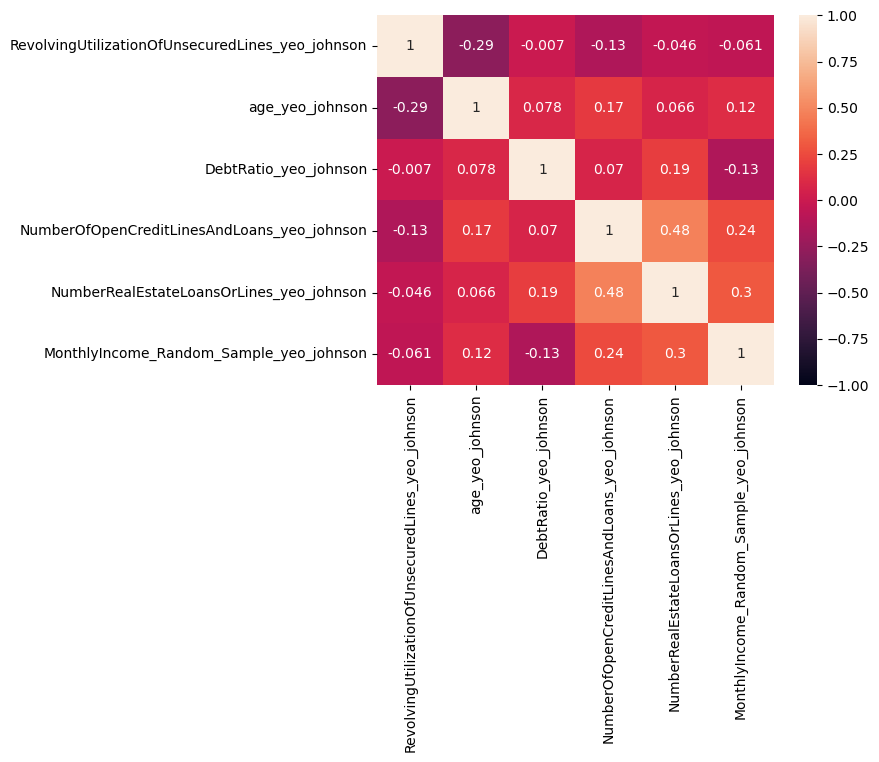

In [256]:
corr = num_col_train.corr()            #some corr are nan, so checking it by making a heatmap
sns.heatmap(corr,annot=True,vmax=1,vmin=-1)

<Axes: >

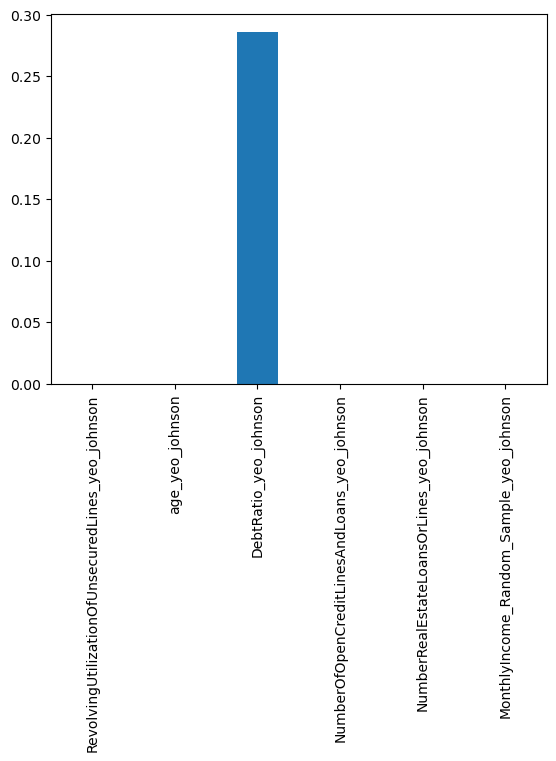

In [257]:
p_values_traindata.plot.bar()        #visualize the p value, so it's easy to remove the column

Conclusion

only DebtRatio_yeo_Johnson column p value is greater than 0.05 , so removed this column in both train and test data


In [258]:
#dropping the feature from train and test data
x_train_final.drop(['DebtRatio_yeo_johnson'], axis=1, inplace=True)

x_test_final.drop(['DebtRatio_yeo_johnson'], axis=1, inplace=True)

In [259]:
#checking column name
(x_train_final.columns)

Index(['RevolvingUtilizationOfUnsecuredLines_yeo_johnson', 'age_yeo_johnson',
       'NumberOfOpenCreditLinesAndLoans_yeo_johnson',
       'NumberRealEstateLoansOrLines_yeo_johnson',
       'MonthlyIncome_Random_Sample_yeo_johnson',
       'NumberOfDependents_Random_Sample_yeo_johnson', 'Gender_Male',
       'Region_East', 'Region_North', 'Region_South', 'Region_West',
       'Rented_OwnHouse_Rented', 'Occupation_new', 'Education_new'],
      dtype='object')

In [260]:
(x_test_final.columns)

Index(['RevolvingUtilizationOfUnsecuredLines_yeo_johnson', 'age_yeo_johnson',
       'NumberOfOpenCreditLinesAndLoans_yeo_johnson',
       'NumberRealEstateLoansOrLines_yeo_johnson',
       'MonthlyIncome_Random_Sample_yeo_johnson',
       'NumberOfDependents_Random_Sample_yeo_johnson', 'Gender_Male',
       'Region_East', 'Region_North', 'Region_South', 'Region_West',
       'Rented_OwnHouse_Rented', 'Occupation_new', 'Education_new'],
      dtype='object')

### ----chi2 test in Categorical column

In [261]:
x_train_final.head()

RevolvingUtilizationOfUnsecuredLines_yeo_johnson  age_yeo_johnson  \
0                                          1.441373         0.556210   
1                                          1.545216        -1.269407   
2                                          1.545216        -2.015493   
3                                          0.397967         0.492267   
4                                          1.545216         0.166326   

   NumberOfOpenCreditLinesAndLoans_yeo_johnson  \
0                                    -0.608777   
1                                    -1.578707   
2                                    -1.578707   
3                                    -0.128132   
4                                    -0.608777   

   NumberRealEstateLoansOrLines_yeo_johnson  \
0                                 -1.181621   
1                                 -1.181621   
2                                 -1.181621   
3                                  1.051431   
4                                  0.297295   

   MonthlyIncome_Random_Sample_yeo_johnson  \
0                                 0.130019   
1                                -0.329039   
2                                -1.074735   
3                                -0.226631   
4                                -1.014545   

   NumberOfDependents_Random_Sample_yeo_johnson  Gender_Male  Region_East  \
0                                     -0.815964     0.793017    -0.399564   
1                                     -0.815964    -1.261007    -0.399564   
2                                     -0.815964     0.793017    -0.399564   
3                                     -0.815964     0.793017    -0.399564   
4                                      1.331220     0.793017    -0.399564   

   Region_North  Region_South  Region_West  Rented_OwnHouse_Rented  \
0     -0.541068     -0.431514    -0.478929                1.158260   
1     -0.541068      2.317420    -0.478929               -0.863364   
2      1.848198     -0.431514    -0.478929               -0.863364   
3     -0.541068     -0.431514    -0.478929                1.158260   
4     -0.541068     -0.431514     2.087993               -0.863364   

   Occupation_new  Education_new  
0       -1.358569      -1.401631  
1        0.985249      -0.790855  
2       -0.772615       0.430697  
3       -1.358569      -1.401631  
4        0.985249      -1.401631

In [262]:
#did not perform chi2 test on categorical column bcz our data have negative values too

### -----using spearman method check corelated column

In [263]:
from feature_engine.selection import DropCorrelatedFeatures

In [264]:
reg = DropCorrelatedFeatures(threshold=0.8 , method='spearman')

In [265]:
x_train_final.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo_johnson', 'age_yeo_johnson',
       'NumberOfOpenCreditLinesAndLoans_yeo_johnson',
       'NumberRealEstateLoansOrLines_yeo_johnson',
       'MonthlyIncome_Random_Sample_yeo_johnson',
       'NumberOfDependents_Random_Sample_yeo_johnson', 'Gender_Male',
       'Region_East', 'Region_North', 'Region_South', 'Region_West',
       'Rented_OwnHouse_Rented', 'Occupation_new', 'Education_new'],
      dtype='object')

In [266]:
spear= x_train_final.iloc[:, 0:5]  #selectiong numerical column
reg.fit(spear)           #fit numerical column

DropCorrelatedFeatures(method='spearman')

In [267]:
len(reg.correlated_feature_sets_) #no corelated feature left

0

In [268]:
reg.correlated_feature_sets_

[]

Conclusion

Using spearman method to see is there any co related feature left but there is no feature left.

### Dropping constant features

In this we will removing the features which have constant feature which are actually not important to solving the problem

In [269]:
#importing library

from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)           #creating object and set threshold to 0
vt.fit(x_train_final)

VarianceThreshold(threshold=0)

In [270]:
vt.get_support()          #there is no constact feature

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [271]:
vt=VarianceThreshold(threshold=0.1)        #set threshold(quasi constant) to 0.1
vt.fit(x_train_final)
vt.get_support() 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [272]:
vt=VarianceThreshold(threshold=0.2)       #set threshold(quasi constant) to 0.2
vt.fit(x_train_final)
vt.get_support() 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [273]:
#there is no constant feature to remove

# check for data balancing

In [308]:
x_train_final.shape   #check dependent train data shape

(100500, 14)

In [275]:
y_train.shape    #check independent train daata shape

(100500,)

In [276]:
y_train.value_counts()                 #checking number of 0 and 1 in train data

1    93727
0     6773
Name: Good_Bad_new, dtype: int64

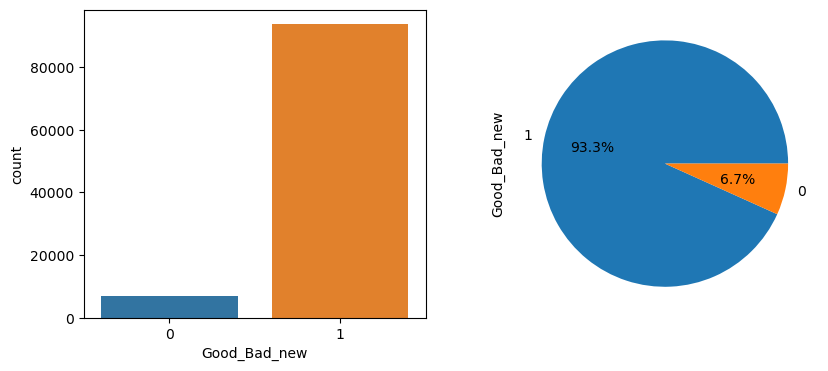

In [277]:
#let's visualize

plt.figure(figsize=(15,4))
    
plt.subplot(131)
sns.countplot(x=y_train)
    
plt.subplot(132)
y_train.value_counts().plot(kind='pie',autopct='%1.1f%%')
    
plt.show()

Conclusion

here we clearly see that number of 1 is 93.3% in this data

Our data is imbalanced

we are using over sampling and try to balance the data bcz in this we are not loosing the data. if we perform under sampling, we loose large amount of data that's why we are not performing it.

### ----Over sampling

In [278]:
final_train_data.shape

(100500, 16)

In [279]:
#importing library
#using final_train_data to extract the value of 0 and 1 in a new variable bcz y_train daata is series

number_of_zero= final_train_data[final_train_data['Good_Bad_new']== 0]
number_of_one= final_train_data[final_train_data['Good_Bad_new']== 1]

In [280]:
number_of_zero.shape,number_of_one.shape, 

((6773, 16), (93727, 16))

In [281]:
#importing library
from imblearn.over_sampling import SMOTE#(Synthetic minority oversampling technique)
sm = SMOTE(random_state=2)
X_train1 , y_train1 = sm.fit_resample(x_train_final, y_train)
sum(y_train1==1)   ,sum(y_train1==0)

(93727, 93727)

In [282]:
y_train1.shape, X_train1.shape

((187454,), (187454, 14))

# Model Development

In [284]:
from sklearn.neighbors import KNeighborsClassifier # importing algorithm 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [285]:
#K-Neighbors Classifier Algorithm

def knn_algo(X_train1, y_train1, x_test_final, y_test):

    kn= KNeighborsClassifier(n_neighbors=5)
    kn.fit(X_train1,y_train1)
    y_train_pred1 = kn.predict(X_train1)
    
    print("\nAccuracy For Train Data")
    print(f'\nThe training accuracy for k:5 = {accuracy_score(y_train1,y_train_pred1)}')
    
    print("\nConfusion Matrix For Train Data")
    print(confusion_matrix(y_train1,y_train_pred1))
    
    print("\nClassification Report For Train Data")
    print(classification_report(y_train1,y_train_pred1))


    y_test_pred = kn.predict(x_test_final)
    
    print("\nAccuracy For Test Data")
    print(f'accuracy for test with k:5 = {accuracy_score(y_test,y_test_pred)}')
    
    print("\nConfusion Matrix For Test Data")
    print(confusion_matrix(y_test,y_test_pred))
    
    print("\nClassification Report  For Test Data")
    print(classification_report(y_test,y_test_pred))

In [286]:
knn_algo(X_train1, y_train1, x_test_final, y_test)         #calling the function


Accuracy For Train Data

The training accuracy for k:5 = 0.9456079891600072

Confusion Matrix For Train Data
[[93440   287]
 [ 9909 83818]]

Classification Report For Train Data
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     93727
           1       1.00      0.89      0.94     93727

    accuracy                           0.95    187454
   macro avg       0.95      0.95      0.95    187454
weighted avg       0.95      0.95      0.95    187454


Accuracy For Test Data
accuracy for test with k:5 = 0.8505454545454545

Confusion Matrix For Test Data
[[ 1978  1275]
 [ 6123 40124]]

Classification Report  For Test Data
              precision    recall  f1-score   support

           0       0.24      0.61      0.35      3253
           1       0.97      0.87      0.92     46247

    accuracy                           0.85     49500
   macro avg       0.61      0.74      0.63     49500
weighted avg       0.92      0.85      0.88     4

In [287]:
#Navie Byse Algorithm

def navie_byse(X_train1, y_train1, x_test_final, y_test):
    nb = GaussianNB()
    nb.fit(X_train1,y_train1)
    y_train_pred1 = nb.predict(X_train1)
    
    print("\nAccuracy For Train Data")
    print(f'\nTraining accuracy= {accuracy_score(y_train1,y_train_pred1)}')
    
    print("\nConfusion Matrix For Train Data")
    print(confusion_matrix(y_train1,y_train_pred1))
    
    print("\nClassification Report For Train Data")
    print(classification_report(y_train1,y_train_pred1))


    y_test_pred = nb.predict(x_test_final)
    
    print("\nAccuracy For Test Data")
    print(f'Test Accuracy= {accuracy_score(y_test,y_test_pred)}')
    
    print("\nConfusion Matrix For Test Data")
    print(confusion_matrix(y_test,y_test_pred))
    
    print("\nClassification Report  For Test Data")
    print(classification_report(y_test,y_test_pred))
    

In [288]:
navie_byse(X_train1, y_train1, x_test_final, y_test)   #calling the function


Accuracy For Train Data

Training accuracy= 0.7473620194821129

Confusion Matrix For Train Data
[[72624 21103]
 [26255 67472]]

Classification Report For Train Data
              precision    recall  f1-score   support

           0       0.73      0.77      0.75     93727
           1       0.76      0.72      0.74     93727

    accuracy                           0.75    187454
   macro avg       0.75      0.75      0.75    187454
weighted avg       0.75      0.75      0.75    187454


Accuracy For Test Data
Test Accuracy= 0.7529494949494949

Confusion Matrix For Test Data
[[ 2408   845]
 [11384 34863]]

Classification Report  For Test Data
              precision    recall  f1-score   support

           0       0.17      0.74      0.28      3253
           1       0.98      0.75      0.85     46247

    accuracy                           0.75     49500
   macro avg       0.58      0.75      0.57     49500
weighted avg       0.92      0.75      0.81     49500



In [289]:
#Logistic Regression Algorithm

def logistic_reg(X_train1, y_train1, x_test_final, y_test):

    lr=LogisticRegression() 
    lr.fit(X_train1,y_train1)
    y_train_pred1 = lr.predict(X_train1)
    
    print("\nAccuracy For Train Data")
    print(f'\nTraining accuracy= {accuracy_score(y_train1,y_train_pred1)}')
    
    print("\nConfusion Matrix For Train Data")
    print(confusion_matrix(y_train1,y_train_pred1))
    
    print("\nClassification Report For Train Data")
    print(classification_report(y_train1,y_train_pred1))


    y_test_pred = lr.predict(x_test_final)
    
    print("\nAccuracy For Test Data")
    print(f'Test Accuracy= {accuracy_score(y_test,y_test_pred)}')
    
    print("\nConfusion Matrix For Test Data")
    print(confusion_matrix(y_test,y_test_pred))
    
    print("\nClassification Report  For Test Data")
    print(classification_report(y_test,y_test_pred))
    

In [290]:
logistic_reg(X_train1, y_train1, x_test_final, y_test)  #calling the function


Accuracy For Train Data

Training accuracy= 0.7881613622542064

Confusion Matrix For Train Data
[[76941 16786]
 [22924 70803]]

Classification Report For Train Data
              precision    recall  f1-score   support

           0       0.77      0.82      0.79     93727
           1       0.81      0.76      0.78     93727

    accuracy                           0.79    187454
   macro avg       0.79      0.79      0.79    187454
weighted avg       0.79      0.79      0.79    187454


Accuracy For Test Data
Test Accuracy= 0.7738383838383839

Confusion Matrix For Test Data
[[ 2599   654]
 [10541 35706]]

Classification Report  For Test Data
              precision    recall  f1-score   support

           0       0.20      0.80      0.32      3253
           1       0.98      0.77      0.86     46247

    accuracy                           0.77     49500
   macro avg       0.59      0.79      0.59     49500
weighted avg       0.93      0.77      0.83     49500



In [293]:
#Decision Tree Algorithm

def dt(X_train1, y_train1, x_test_final, y_test):

    dt= DecisionTreeClassifier() 
    dt.fit(X_train1,y_train1)
    y_train_pred1 = dt.predict(X_train1)
    
    print("\nAccuracy For Train Data")
    print(f'\nTraining accuracy= {accuracy_score(y_train1,y_train_pred1)}')
    
    print("\nConfusion Matrix For Train Data")
    print(confusion_matrix(y_train1,y_train_pred1))
    
    print("\nClassification Report For Train Data")
    print(classification_report(y_train1,y_train_pred1))


    y_test_pred = dt.predict(x_test_final)
    
    print("\nAccuracy For Test Data")
    print(f'Test Accuracy= {accuracy_score(y_test,y_test_pred)}')
    
    print("\nConfusion Matrix For Test Data")
    print(confusion_matrix(y_test,y_test_pred))
    
    print("\nClassification Report  For Test Data")
    print(classification_report(y_test,y_test_pred))
    

In [294]:
dt(X_train1, y_train1, x_test_final, y_test)    #calling the function


Accuracy For Train Data

Training accuracy= 0.9999946653579012

Confusion Matrix For Train Data
[[93727     0]
 [    1 93726]]

Classification Report For Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93727
           1       1.00      1.00      1.00     93727

    accuracy                           1.00    187454
   macro avg       1.00      1.00      1.00    187454
weighted avg       1.00      1.00      1.00    187454


Accuracy For Test Data
Test Accuracy= 0.7639393939393939

Confusion Matrix For Test Data
[[ 2188  1065]
 [10620 35627]]

Classification Report  For Test Data
              precision    recall  f1-score   support

           0       0.17      0.67      0.27      3253
           1       0.97      0.77      0.86     46247

    accuracy                           0.76     49500
   macro avg       0.57      0.72      0.57     49500
weighted avg       0.92      0.76      0.82     49500



In [297]:
#Random Forest Algorithm

def random_forest(X_train1, y_train1, x_test_final, y_test):

    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train1,y_train1)
    y_train_pred1 = rf.predict(X_train1)
    
    print("\nAccuracy For Train Data")
    print(f'\nTraining accuracy= {accuracy_score(y_train1,y_train_pred1)}')
    
    print("\nConfusion Matrix For Train Data")
    print(confusion_matrix(y_train1,y_train_pred1))
    
    print("\nClassification Report For Train Data")
    print(classification_report(y_train1,y_train_pred1))


    y_test_pred = rf.predict(x_test_final)
    
    print("\nAccuracy For Test Data")
    print(f'Test Accuracy= {accuracy_score(y_test,y_test_pred)}')
    
    print("\nConfusion Matrix For Test Data")
    print(confusion_matrix(y_test,y_test_pred))
    
    print("\nClassification Report  For Test Data")
    print(classification_report(y_test,y_test_pred))
    

In [298]:
random_forest(X_train1, y_train1, x_test_final, y_test)  #calling the fuction


Accuracy For Train Data

Training accuracy= 0.9999946653579012

Confusion Matrix For Train Data
[[93727     0]
 [    1 93726]]

Classification Report For Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93727
           1       1.00      1.00      1.00     93727

    accuracy                           1.00    187454
   macro avg       1.00      1.00      1.00    187454
weighted avg       1.00      1.00      1.00    187454


Accuracy For Test Data
Test Accuracy= 0.800949494949495

Confusion Matrix For Test Data
[[ 2344   909]
 [ 8944 37303]]

Classification Report  For Test Data
              precision    recall  f1-score   support

           0       0.21      0.72      0.32      3253
           1       0.98      0.81      0.88     46247

    accuracy                           0.80     49500
   macro avg       0.59      0.76      0.60     49500
weighted avg       0.93      0.80      0.85     49500



In [299]:
#Ada Boost Algorithm
#finding value for n_estimator

def adda_boost(X_train1, y_train1, x_test_final, y_test):
    
    lr= LogisticRegression()
    a = list(range(1,100,3))   

    for i in a:
        ada = AdaBoostClassifier(estimator=lr,n_estimators=i,learning_rate=1.0)    
        ada.fit(X_train1,y_train1)
    
        print("n-estimator value: ", i)
        print("Training Accuracy score: {0:.3f}".format(ada.score(X_train1, y_train1)))
        print("Test Accuracy score: {0:.3f}".format(ada.score(x_test_final, y_test)))
        print()
    


In [300]:
adda_boost(X_train1, y_train1, x_test_final, y_test)

n-estimator value:  1
Training Accuracy score: 0.760
Test Accuracy score: 0.773

n-estimator value:  4
Training Accuracy score: 0.770
Test Accuracy score: 0.778

n-estimator value:  7
Training Accuracy score: 0.776
Test Accuracy score: 0.781

n-estimator value:  10
Training Accuracy score: 0.781
Test Accuracy score: 0.785

n-estimator value:  13
Training Accuracy score: 0.784
Test Accuracy score: 0.786

n-estimator value:  16
Training Accuracy score: 0.787
Test Accuracy score: 0.788

n-estimator value:  19
Training Accuracy score: 0.788
Test Accuracy score: 0.788

n-estimator value:  22
Training Accuracy score: 0.789
Test Accuracy score: 0.788

n-estimator value:  25
Training Accuracy score: 0.789
Test Accuracy score: 0.788

n-estimator value:  28
Training Accuracy score: 0.789
Test Accuracy score: 0.787

n-estimator value:  31
Training Accuracy score: 0.789
Test Accuracy score: 0.786

n-estimator value:  34
Training Accuracy score: 0.789
Test Accuracy score: 0.785

n-estimator value: 

In [301]:
#after selecting n_estimator value
def adda_boost(X_train1, y_train1, x_test_final, y_test):
    
    lr= LogisticRegression()
    
    ada = AdaBoostClassifier(estimator=lr,n_estimators=31,learning_rate=1.0)
    ada.fit(X_train1,y_train1)
    y_train_pred1 = ada.predict(X_train1)
    
    print("\nAccuracy For Train Data")
    print(f'\nTraining accuracy= {accuracy_score(y_train1,y_train_pred1)}')
    
    print("\nConfusion Matrix For Train Data")
    print(confusion_matrix(y_train1,y_train_pred1))
    
    print("\nClassification Report For Train Data")
    print(classification_report(y_train1,y_train_pred1))


    y_test_pred = ada.predict(x_test_final)
    
    print("\nAccuracy For Test Data")
    print(f'Test Accuracy= {accuracy_score(y_test,y_test_pred)}')
     
    print("\nConfusion Matrix For Test Data")
    print(confusion_matrix(y_test,y_test_pred))
    
    print("\nClassification Report  For Test Data")
    print(classification_report(y_test,y_test_pred))
        
    

In [302]:
adda_boost(X_train1, y_train1, x_test_final, y_test)   #calling the function


Accuracy For Train Data

Training accuracy= 0.7892176213897809

Confusion Matrix For Train Data
[[75806 17921]
 [21591 72136]]

Classification Report For Train Data
              precision    recall  f1-score   support

           0       0.78      0.81      0.79     93727
           1       0.80      0.77      0.79     93727

    accuracy                           0.79    187454
   macro avg       0.79      0.79      0.79    187454
weighted avg       0.79      0.79      0.79    187454


Accuracy For Test Data
Test Accuracy= 0.7864242424242425

Confusion Matrix For Test Data
[[ 2554   699]
 [ 9873 36374]]

Classification Report  For Test Data
              precision    recall  f1-score   support

           0       0.21      0.79      0.33      3253
           1       0.98      0.79      0.87     46247

    accuracy                           0.79     49500
   macro avg       0.59      0.79      0.60     49500
weighted avg       0.93      0.79      0.84     49500



In [303]:
#Gradient Boost Algorithm
#selecting best learning rate

def gradient_boost(X_train1, y_train1, x_test_final, y_test):
    
    learning_rates = [0.05,0.1,0.02,0.001,0.01,0.25]
    for i in learning_rates:
        gb = GradientBoostingClassifier(learning_rate=i,n_estimators=100,random_state=100)
        gb.fit(X_train1,y_train1)
        print("Learning rate: ", i)
        print("Training Accuracy score: {0:.3f}".format(gb.score(X_train1, y_train1)))
        print("Test Accuracy score: {0:.3f}".format(gb.score(x_test_final, y_test)))
        print()

In [304]:
gradient_boost(X_train1, y_train1, x_test_final, y_test)    #calling the function

Learning rate:  0.05
Training Accuracy score: 0.860
Test Accuracy score: 0.718

Learning rate:  0.1
Training Accuracy score: 0.898
Test Accuracy score: 0.568

Learning rate:  0.02
Training Accuracy score: 0.821
Test Accuracy score: 0.800

Learning rate:  0.001
Training Accuracy score: 0.802
Test Accuracy score: 0.761

Learning rate:  0.01
Training Accuracy score: 0.803
Test Accuracy score: 0.770

Learning rate:  0.25
Training Accuracy score: 0.944
Test Accuracy score: 0.314



In [305]:
#After selecting learning rate

def gradient_boost(X_train1, y_train1, x_test_final, y_test):
    
    gb = GradientBoostingClassifier(learning_rate=0.02,n_estimators=100,random_state=100)
    gb.fit(X_train1,y_train1)
        
    y_train_pred1 = gb.predict(X_train1)
    
    print("\nAccuracy For Train Data")
    print(f'\nTraining accuracy= {accuracy_score(y_train1,y_train_pred1)}')
    
    print("\nConfusion Matrix For Train Data")
    print(confusion_matrix(y_train1,y_train_pred1))
    
    print("\nClassification Report For Train Data")
    print(classification_report(y_train1,y_train_pred1))


    y_test_pred = gb.predict(x_test_final)
    
    print("\nAccuracy For Test Data")
    print(f'Test Accuracy= {accuracy_score(y_test,y_test_pred)}')
     
    print("\nConfusion Matrix For Test Data")
    print(confusion_matrix(y_test,y_test_pred))
    
    print("\nClassification Report  For Test Data")
    print(classification_report(y_test,y_test_pred))
        
    

In [306]:
gradient_boost(X_train1, y_train1, x_test_final, y_test)  #calling the function


Accuracy For Train Data

Training accuracy= 0.8207666947624483

Confusion Matrix For Train Data
[[77429 16298]
 [17300 76427]]

Classification Report For Train Data
              precision    recall  f1-score   support

           0       0.82      0.83      0.82     93727
           1       0.82      0.82      0.82     93727

    accuracy                           0.82    187454
   macro avg       0.82      0.82      0.82    187454
weighted avg       0.82      0.82      0.82    187454


Accuracy For Test Data
Test Accuracy= 0.800060606060606

Confusion Matrix For Test Data
[[ 2567   686]
 [ 9211 37036]]

Classification Report  For Test Data
              precision    recall  f1-score   support

           0       0.22      0.79      0.34      3253
           1       0.98      0.80      0.88     46247

    accuracy                           0.80     49500
   macro avg       0.60      0.79      0.61     49500
weighted avg       0.93      0.80      0.85     49500



# AUC-ROC Curve

In [309]:
from sklearn.metrics import roc_auc_score,roc_curve

In [314]:
# importing model
k = KNeighborsClassifier()
l = LogisticRegression()
n = GaussianNB()
d= DecisionTreeClassifier()
r = RandomForestClassifier()
a=AdaBoostClassifier()
gb1 = GradientBoostingClassifier()

#fit the data into algorithm
k.fit(X_train1 , y_train1)
l.fit(X_train1 , y_train1)
n.fit(X_train1 , y_train1)
d.fit(X_train1 , y_train1)
r.fit(X_train1 , y_train1)
a.fit(X_train1 , y_train1)
gb1.fit(X_train1 , y_train1)


#predict probability for each model
Knn_pro = k.predict_proba(x_test_final)[:,1]
log_pro = l.predict_proba(x_test_final)[:,1]
navie_pro = n.predict_proba(x_test_final)[:,1]
decision_pro = d.predict_proba(x_test_final)[:,1]
random_pro = r.predict_proba(x_test_final)[:,1]
ada_pro=a.predict_proba(x_test_final)[:,1]
gb1_pro=gb1.predict_proba(x_test_final)[:,1]

# finding FPR and TPR 
fprknn, tprknn, threshold = roc_curve(y_test, Knn_pro)  
fprLog, tprLog, threshold = roc_curve(y_test, log_pro) 
fprNavie, tprNavie, threshold = roc_curve(y_test, navie_pro)  
fprDecision, tprDecision, threshold = roc_curve(y_test, decision_pro)  
fprRandom, tprRandom, threshold = roc_curve(y_test, random_pro) 
fprada, tprada, threshold = roc_curve(y_test, ada_pro) 
fprgradient, tprgradient, threshold = roc_curve(y_test, gb1_pro) 

C:\Users\DELL\AppData\Local\Temp\ipykernel_240\3792529847.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


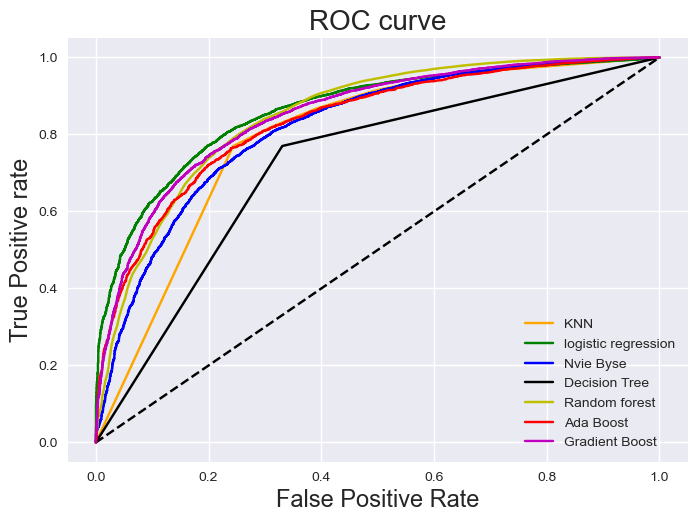

In [318]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot([0, 1], [0, 1], "k--")
# plot roc curves
plt.plot(fprknn, tprknn,color='orange', label='KNN')
plt.plot(fprLog, tprLog,color='green', label='logistic regression')
plt.plot(fprNavie, tprNavie, color='blue',label="Nvie Byse")
plt.plot(fprDecision, tprDecision, color='black',label="Decision Tree")
plt.plot(fprRandom, tprRandom, color='y',label="Random forest")
plt.plot(fprada, tprada, color='r',label="Ada Boost")
plt.plot(fprgradient, tprgradient,color='m',label="Gradient Boost")

plt.title('ROC curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=17)
plt.ylabel('True Positive rate',fontsize=17)

plt.legend(loc=0)
plt.show()

In [319]:
#After checking AUC-ROC curve logistic perform better